# Optimización

Consiste en encontrar en mínimo o máximo de una función. Para todos los ejemplos vamos a suponer que buscamos el mínimo de una función.

Dada una función $f(X)$ donde $X$ puede ser una constante, un vector o una matriz, el objetivo es encontrar un valor de X tal que se garantice 

\\[
x^* = {argmin} _{x\in \mathbb {R} } \left\{ f(x) \right\}
\\]

Por ejemplo para $f(x)=x^2+3$:

\\[
x^* = {argmin} _{x\in \mathbb {R} } \left\{ x^2 \right\} = 0
\\]

\\[
f(x^*) = f(0) = 0^2+3 = 3
\\]


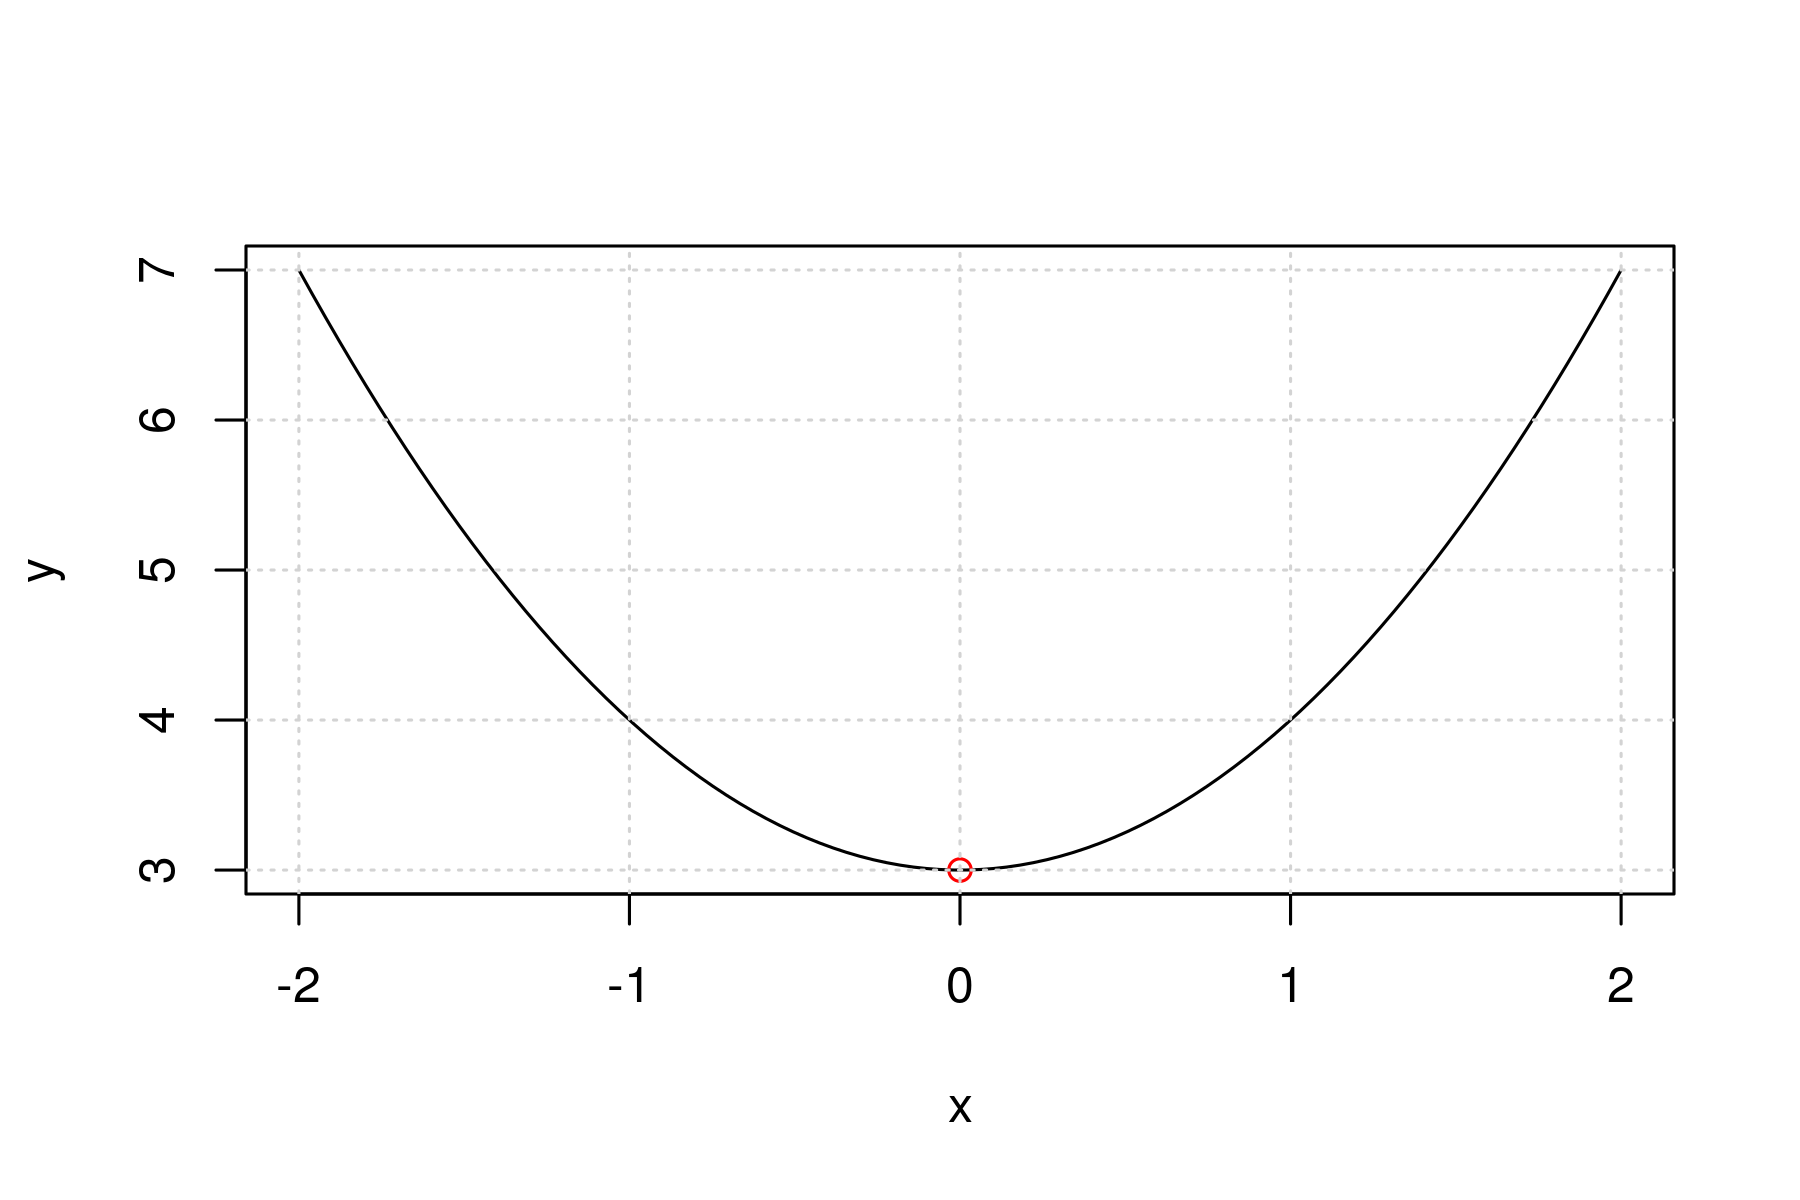

In [1]:
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)

myfunc<-function(x){ x^2+3 }

x<-seq(-2,2,length.out = 100)
y<-myfunc(x)

plot(x,y,t="l")
points(0,3,col="red")
grid()

### ¿Qué queremos optimizar?

Todos los algoritmos que usemos van a tener una *función de error* que va a medir como se ajusta nuestra curva de *predicción* a la curva *real*.

Es lo que en inglés se conoce como [curve-fitting].(https://en.wikipedia.org/wiki/Curve_fitting)

![](./img/CajaNegra.png)

El objetivo de esa función de error es saber cuanto se equivoca el algoritmo en su decisión. 

Siempre vamos a tratar de minimizar el valor de esa función de error cambiando los parámetros necesarios.

Ejemplo: 

Regresión lineal:
\\[
y= a·x +b    
\\]

Dados unos valores de ($x_{real}$,$y_{real}$) conocidos tenemos que que ver que valores de (a,b) miniminzan:
\\[
f_{mse}(a,b)=\sqrt{ \sum{(a·x_{real} +b-y_{real} )^2}}
\\]

Todos los problemas *aprendizaje* son formas más o menos avanzadas de ajuste de curvas:

https://diginomica.com/ai-curve-fitting-not-intelligence


*As much as I look into what’s being done with deep learning, I see they’re all stuck there on the level of associations. Curve fitting. That sounds like sacrilege, to say that all the impressive achievements of deep learning amount to just fitting a curve to data. From the point of view of the mathematical hierarchy, no matter how skillfully you manipulate the data and what you read into the data when you manipulate it, it’s still a curve-fitting exercise, albeit complex and nontrivial.* [Judea Pearl]

## ¿Cómo encontramos el mínimo de una función?

Podemos calcularlo de forma **iterativa**. Es decir, inyectando en nuestro modelo un valor distinto para ver que valor tenemos a la salida. En función de los datos que metemos en la entrada vemos cual es la salida que tiene un valor más bajo.

Al ser un proceso iterativo tenemos que garantizar convergencia, es decir, dado un número suficientemente grande de iteraciones nuestro proceso encontrará el mínimo.

En algunos casos muy contados podemos saltar diréctamente al mínimo, pero por lo general este no será el caso.

### Ejemplo 1:

```
1. x_0 <- Asignamos un valor x al azar
2. x_new <- Elegimos otro valor de x próximo a x_0  al azar
3. Si f(x_new)<f(x_0) entonces x_0 <- x_new
4. Repetimos desde 2 un número N de veces
```

In [2]:
x_0 <- runif(1,-2,2)
hiperparametro <- 2

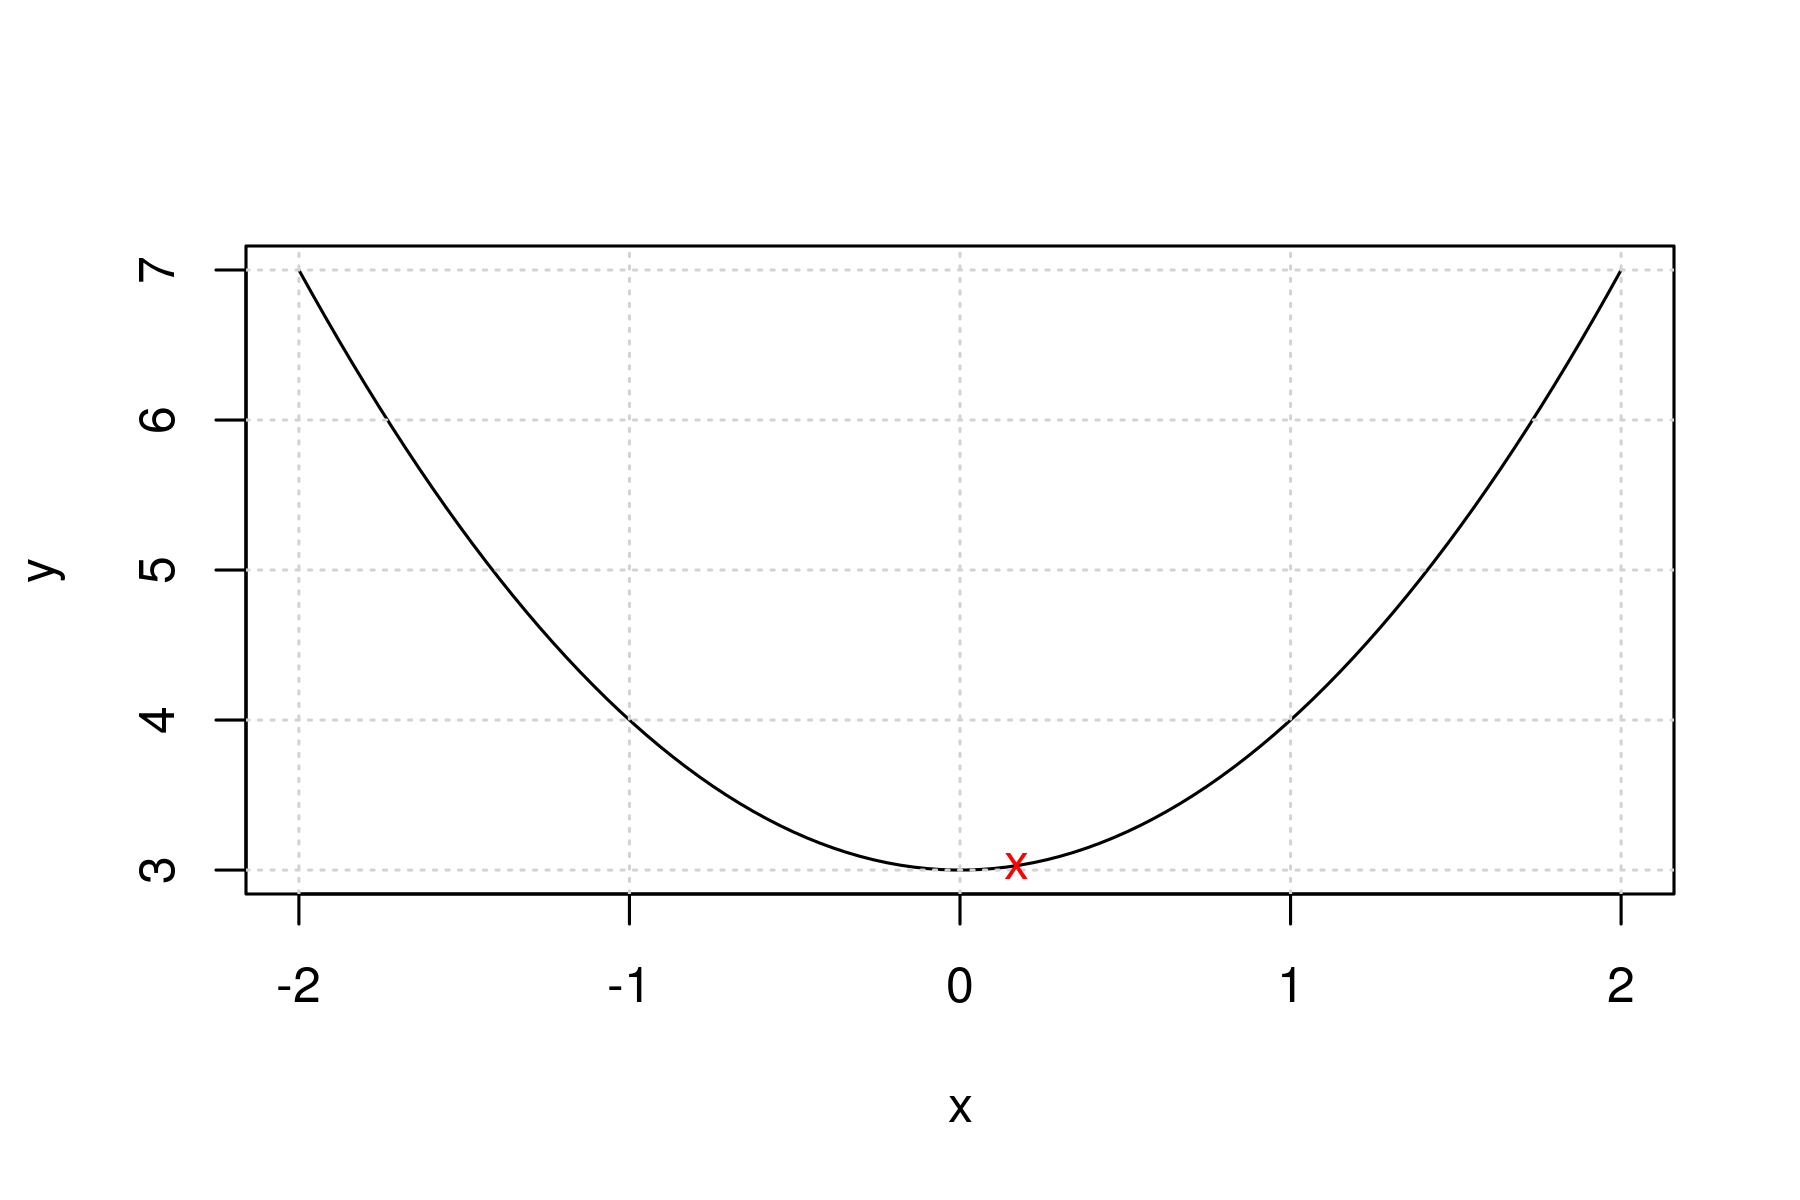

In [12]:
plot(x,y,t="l")
grid()

x_new <- rnorm(1,mean=x_0,sd= hiperparametro )
if (myfunc(x_new) < myfunc(x_0)){
    x_0 <- x_new
}
points(x_new,myfunc(x_new),col="blue")
points(x_0,myfunc(x_0),col="red",pch='x')

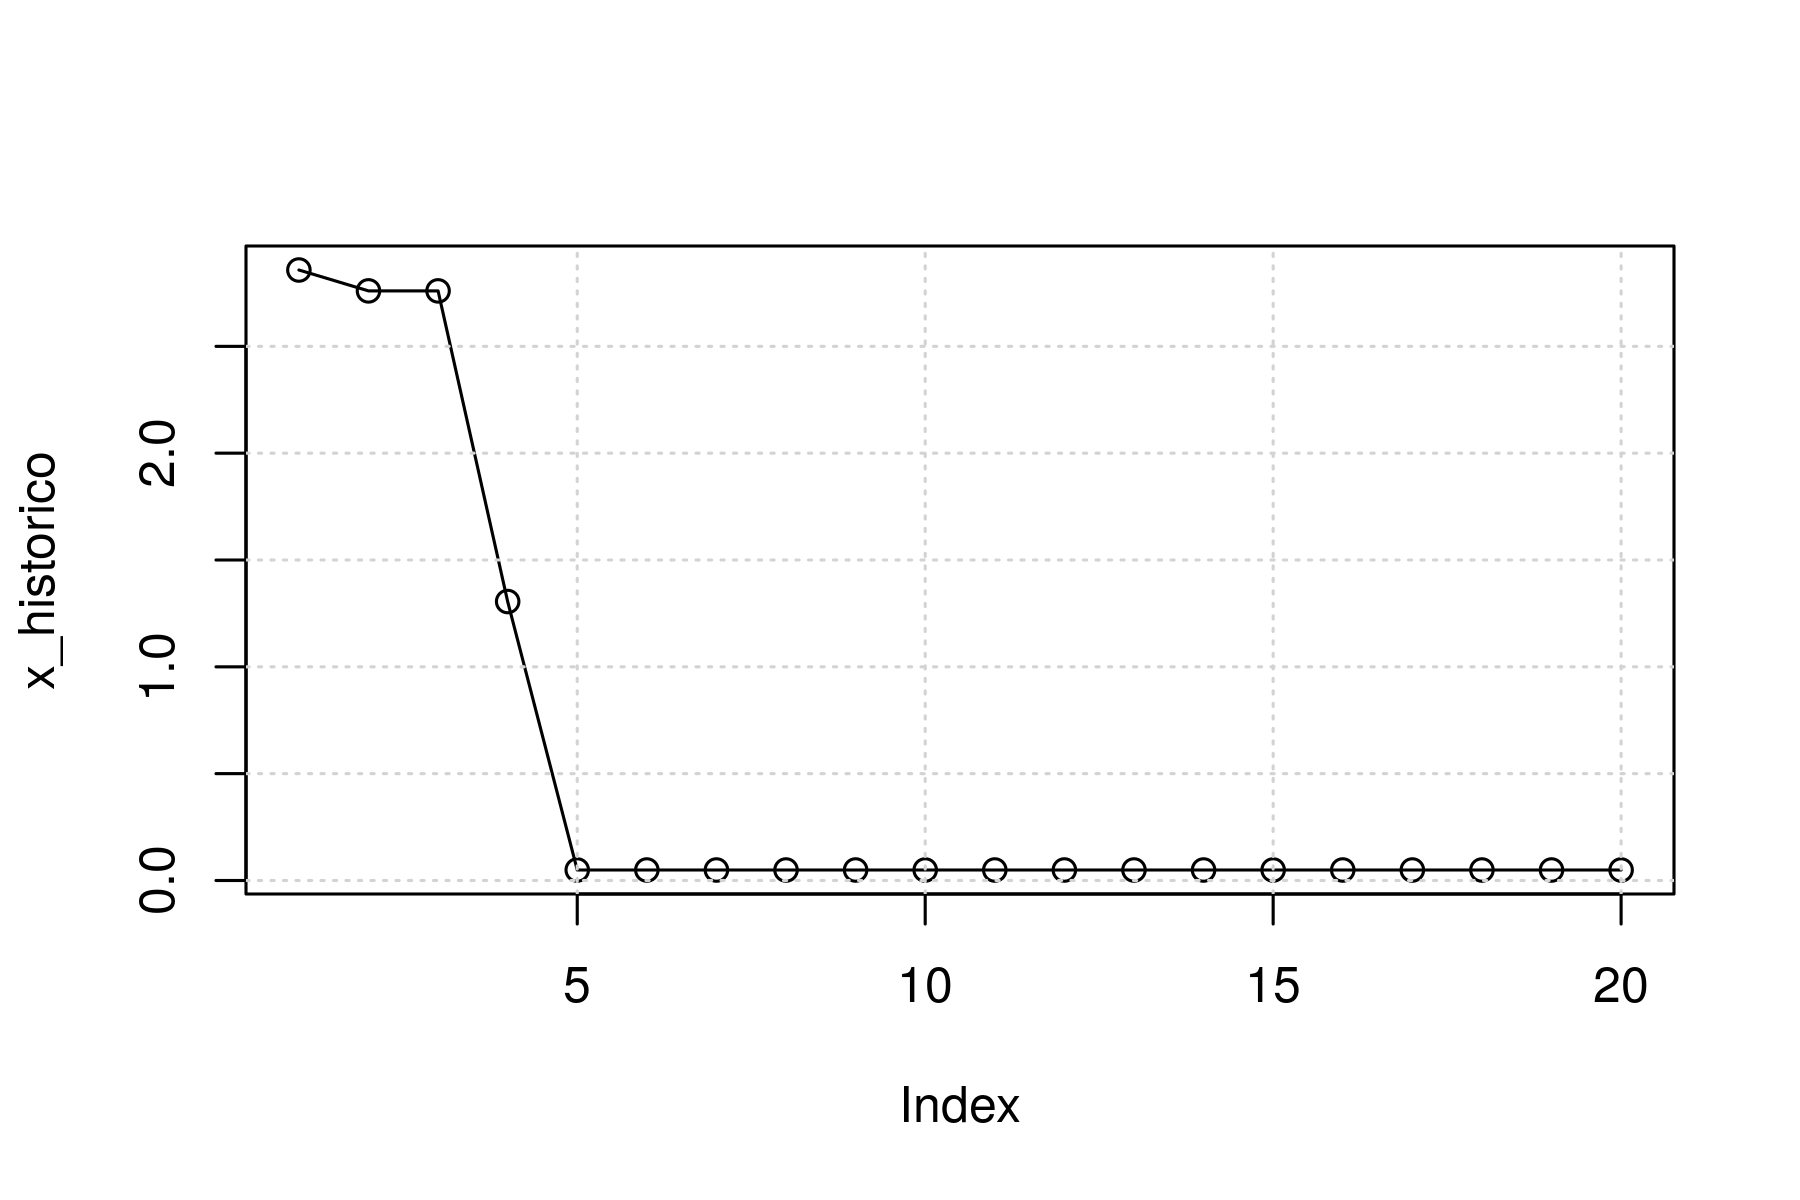

In [13]:
x_0 <- runif(1,-10,10)
hiperparametro <- 2

x_historico <- c()
for (i in 1:20){
    x_new <- rnorm(1,mean=x_0,sd= hiperparametro )
    if (myfunc(x_new) < myfunc(x_0)){
        x_0 <- x_new
    }
    x_historico<-c(x_historico,x_0)
}
plot(x_historico,t="o")
grid()

### Ejemplo 2:

```
1. x_0 <- Asignamos un valor x al azar
2. x_new1 <- x_0 + delta
3. x_new2 <- x_0 - delta
4. Si f(x_new1)<f(x_0) entonces x_0 <- x_new1 
      sino  si f(x_new2)<f(x_0) entonces x_0 <- x_new2
      sino FIN, el minimo esta cerca de x_0
5. Repetimos desde 2 un número N de veces
```

In [14]:
x_0 <- runif(1,-3,3)
delta <- 0.3

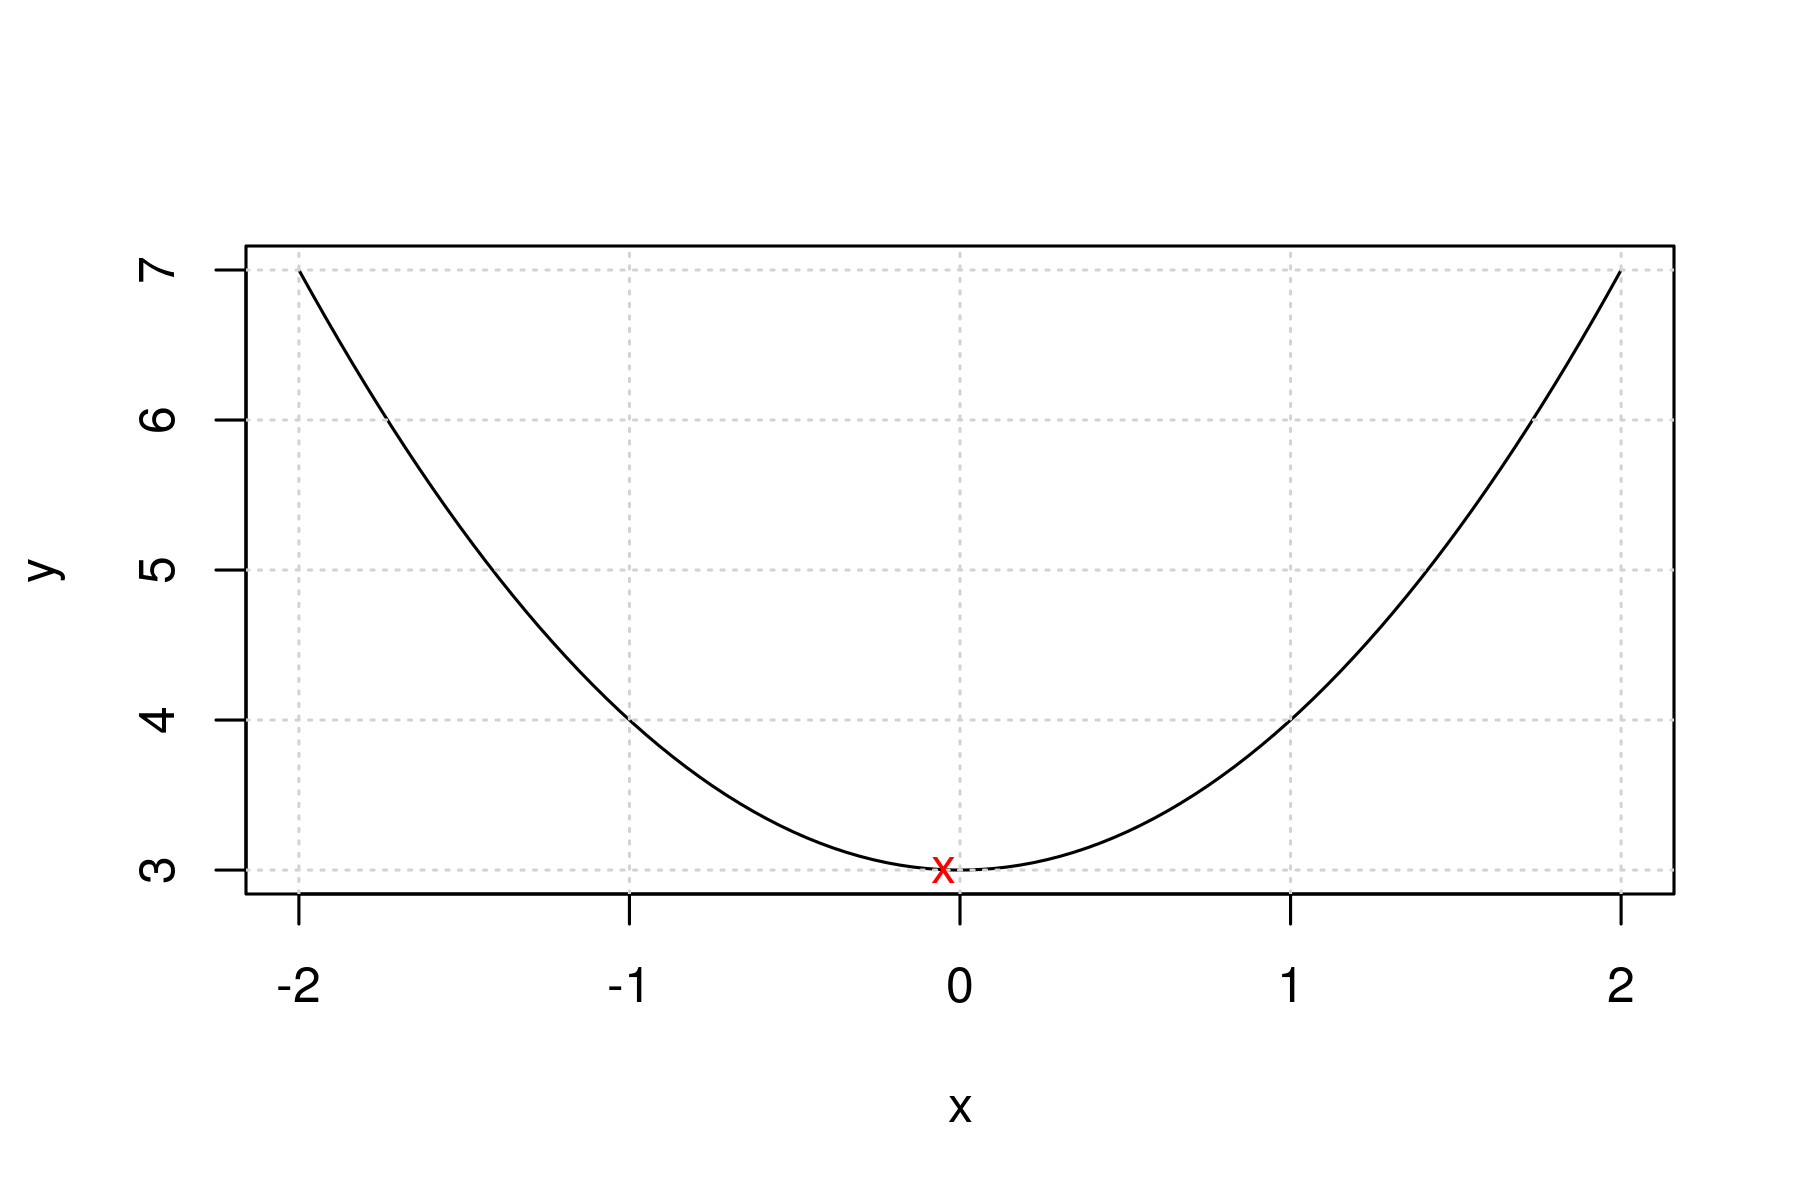

In [23]:
plot(x,y,t="l")
grid()

x_new1 <- x_0 + delta
x_new2 <- x_0 - delta

if (myfunc(x_new1) < myfunc(x_0)){
    x_0 <- x_new1
}else if (myfunc(x_new2) < myfunc(x_0)){
    x_0 <- x_new2
}

points(x_0,myfunc(x_0),col="red",pch='x')

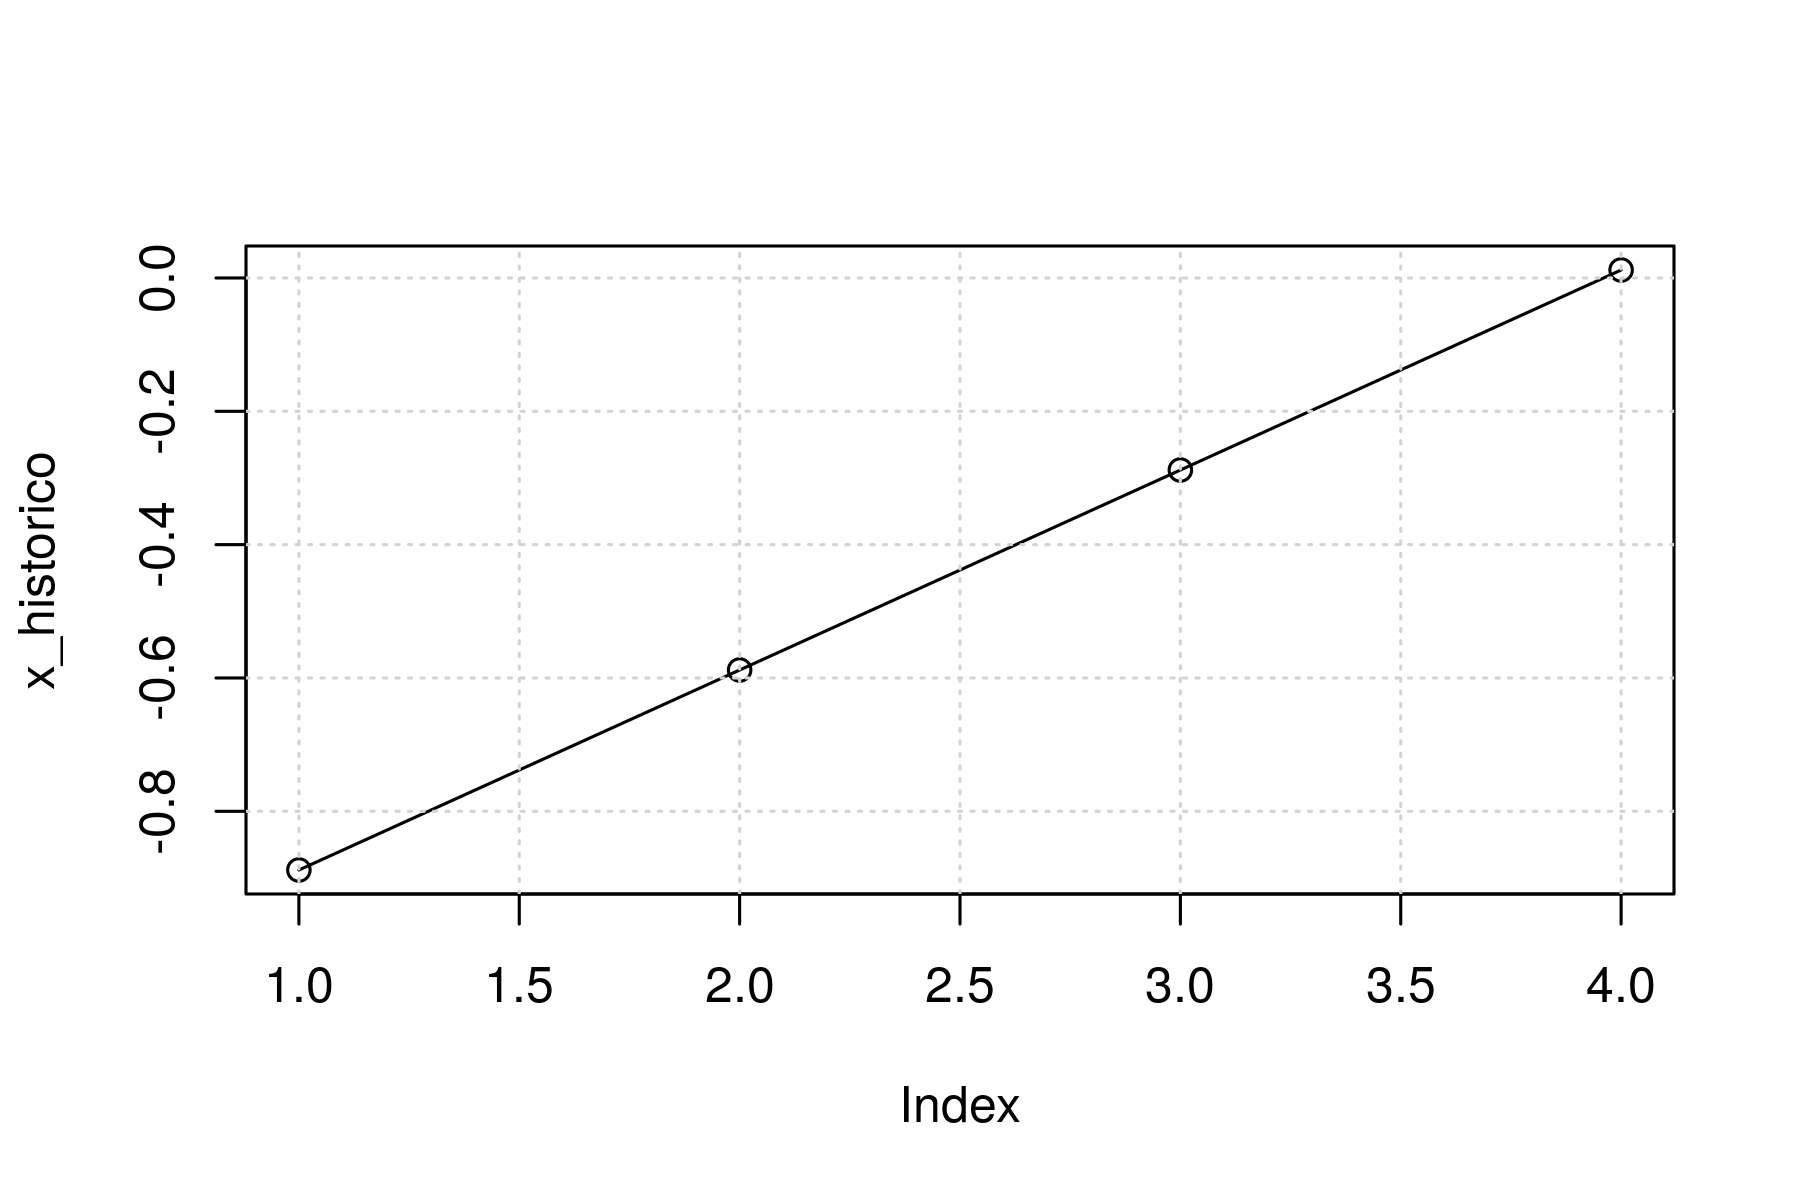

In [24]:
x_0 <- runif(1,-10,10)
delta <- 0.3
x_historico <- c()
for (i in 1:100){
    x_new1 <- x_0 + delta
    x_new2 <- x_0 - delta
    
    if (myfunc(x_new1) < myfunc(x_0)){
        x_0 <- x_new1
    }else if (myfunc(x_new2) < myfunc(x_0)){
        x_0 <- x_new2
    }else{
        break;
    }
    x_historico<-c(x_historico,x_0)
}
plot(x_historico,t="o")
grid()

## Derivada

La derivada de una función es su pendiente:
\\[
    f'(x)=\frac{\partial f(x)}{\partial x} = \lim\limits_{h \to 0}\frac{f(x+h)-f(x)}{h}
\\]
En nuestra función $f(x)=x^2+3$ la derivada sería:

\\[
    f'(x) = \lim\limits_{h \to 0}\frac{(x+h)^2 + 3 - x^2 - 3}{h}
\\]

\\[
    f'(x) = \lim\limits_{h \to 0}\frac{ x^2 + h^2 + 2xh - x^2}{h}
\\]

\\[
    f'(x) = \lim\limits_{h \to 0}\frac{  h^2 + 2xh}{h} = 2x
\\]

In [25]:
# ¿Cómo de pequeño tiene que ser h?
x <- 5
for (h in c(1,0.5,0.1,0.01,1e-3,1e-4,1e-5)){
    print((myfunc(x+h)-myfunc(x))/h)
}

[1] 11
[1] 10.5
[1] 10.1
[1] 10.01
[1] 10.001
[1] 10.0001
[1] 10.00001


Podemos pintar la derivada junto con la función

La derivada es $f'(x)=2x$, lo que hacemos es pintar una recta $y = a·x+b$.
Sabemos que la pendiente es $f'(x)=a=2x$. Lo centramos en $f(x)$, así que $b=f(x)$ y dibujamos la recta desde $[x-delta,x+delta]$ para:
* $x = -7$ : $f'(x)=-14$ y   $f(x)=52$
* $x = 0$ : $f'(x)=0$ y   $f(x)=3$
* $x = 5$ : $f'(x)=5$ y   $f(x)=28$

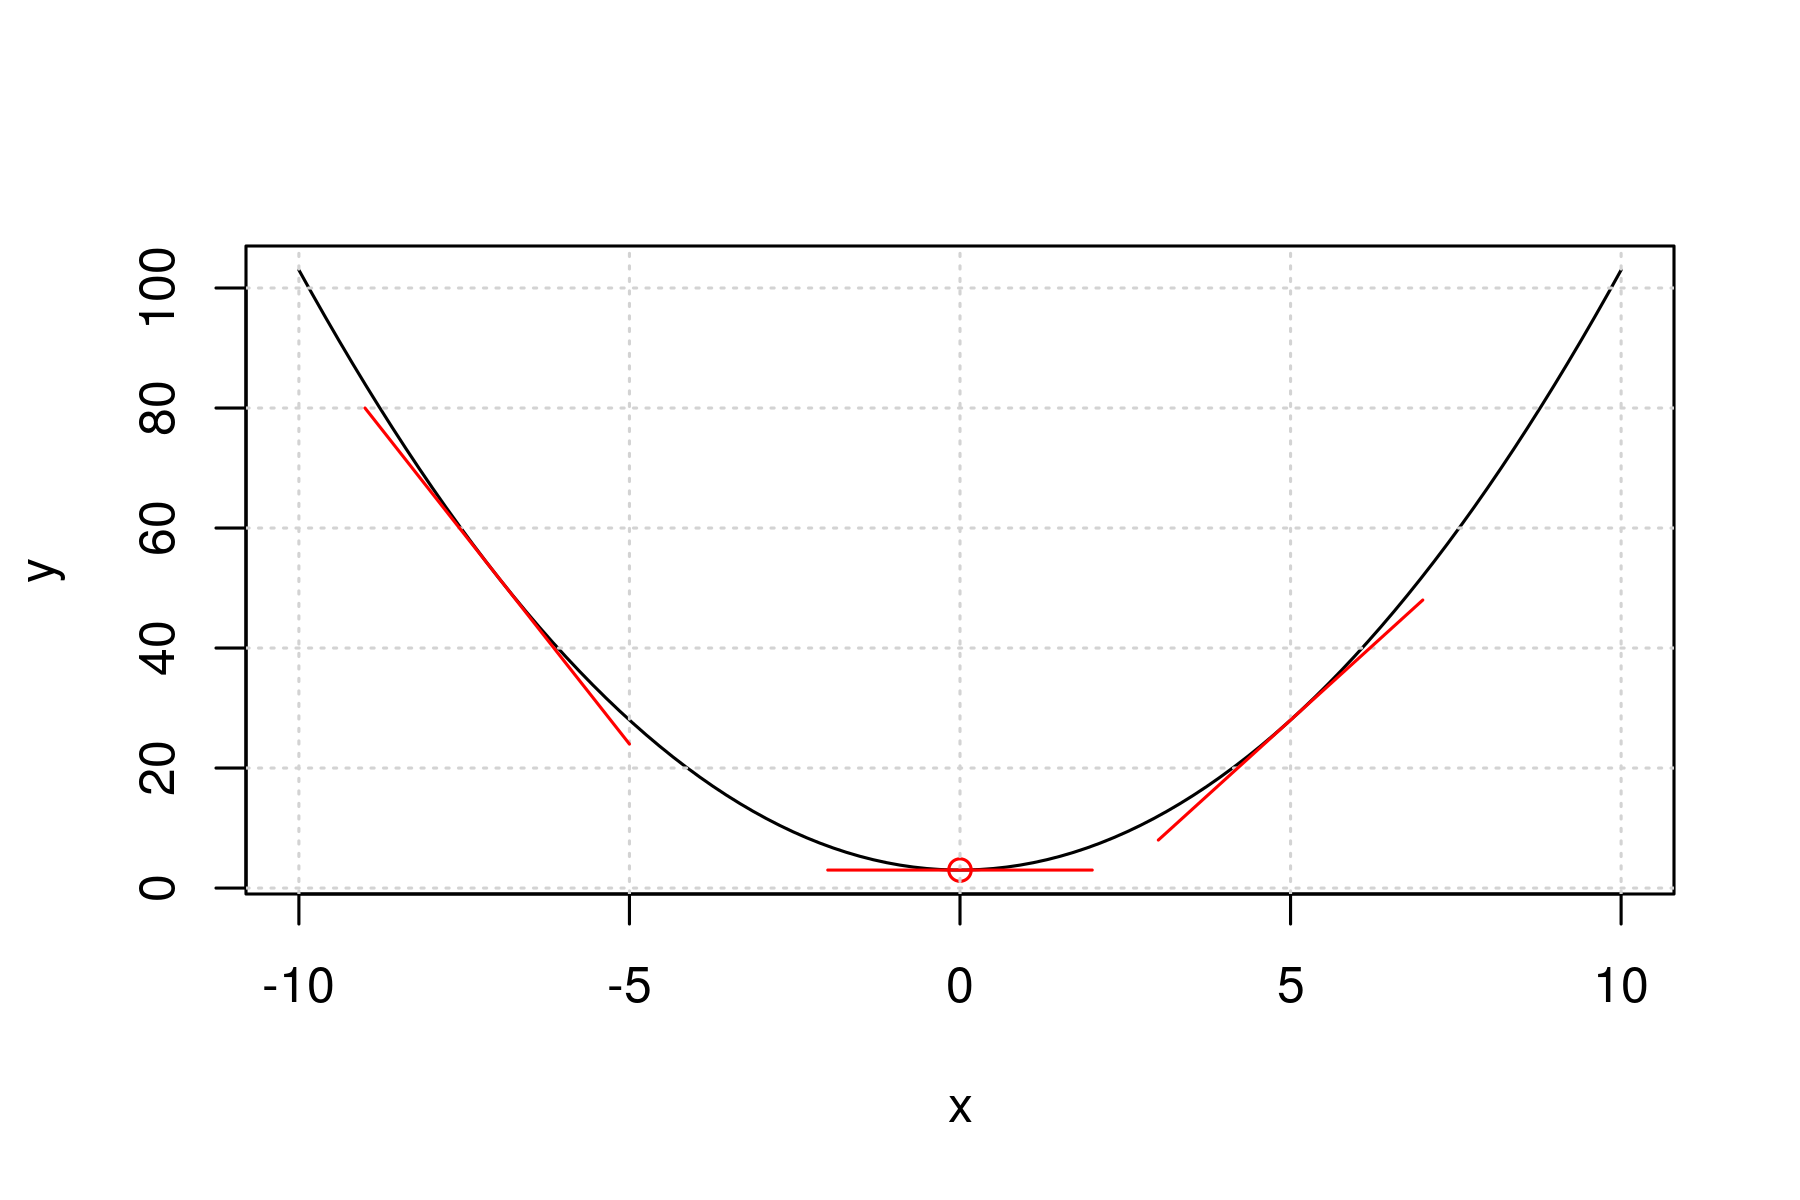

In [83]:
x<-seq(-10,10,length.out = 100)
y<-myfunc(x)

plot(x,y,t="l")
points(0,3,col="red")
grid()

plotDerivada<-function(x){
    delta <- 2  
    lines(c(x-delta,x+delta),
          c(myfunc(x)-delta*2*x,myfunc(x)+delta*2*x),
          col="red")
}

plotDerivada(5)
plotDerivada(-7)
plotDerivada(0)

La derivada tiene un valor:
* $f'(x)<0$: **negativo** cuando la función disminuye a medida que aumenta x
* $f'(x)>0$: **positivo** cuando la función aumenta a medida que aumenta x
* $f'(x)=0$: cuando estamos en un máximo, **mínimo** o punto de inflexión

Cuanto mayor es el **valor absoluto** de la derivada, mayor es la pendiente de la función, más rápidamente cambia la función.

**¿Como podemos diferenciar entre máximo, mínimo y punto de inflexión?**

La **segunda derivada**, es decir, la derivada de la derivada nos da información de cómo cambia la derivada. 
\\[
f'' \left(x \right) = \frac{\partial }{\partial x}f' \left(x \right) =\frac{\partial }{\partial x \partial x}f \left(x \right) 
\\]

* $f''(x) > 0$ : Indica que $f'(x)$ va a aumentar al incrementar $x$.  Si $f'(x)=0$ nos encontramos en un mínimo.
* $f''(x) < 0$ : Indica que $f'(x)$ va a disminuir al incrementar $x$. Si $f'(x)=0$ nos encontramos en un máximo.
* $f''(x) = 0$ : Indica que $f'(x)$ va a seguir igual al incrementar $x$. Si $f'(x)=0$ nos encontramos en un punto de inflexión.

La segunda derivada es un elemento que podemos usar para saber si estamos en un máximo, un mínimo o un punto de inflexión.



Ahora podemos modificar el ejemplo 2 utilizando lo que hemos aprendido de derivadas:
```
1. x_0 <- Asignamos un valor x al azar
2. x_new <- x_0 - f'(x_0)*delta
3. Repetimos desde 2 un número N de veces
```

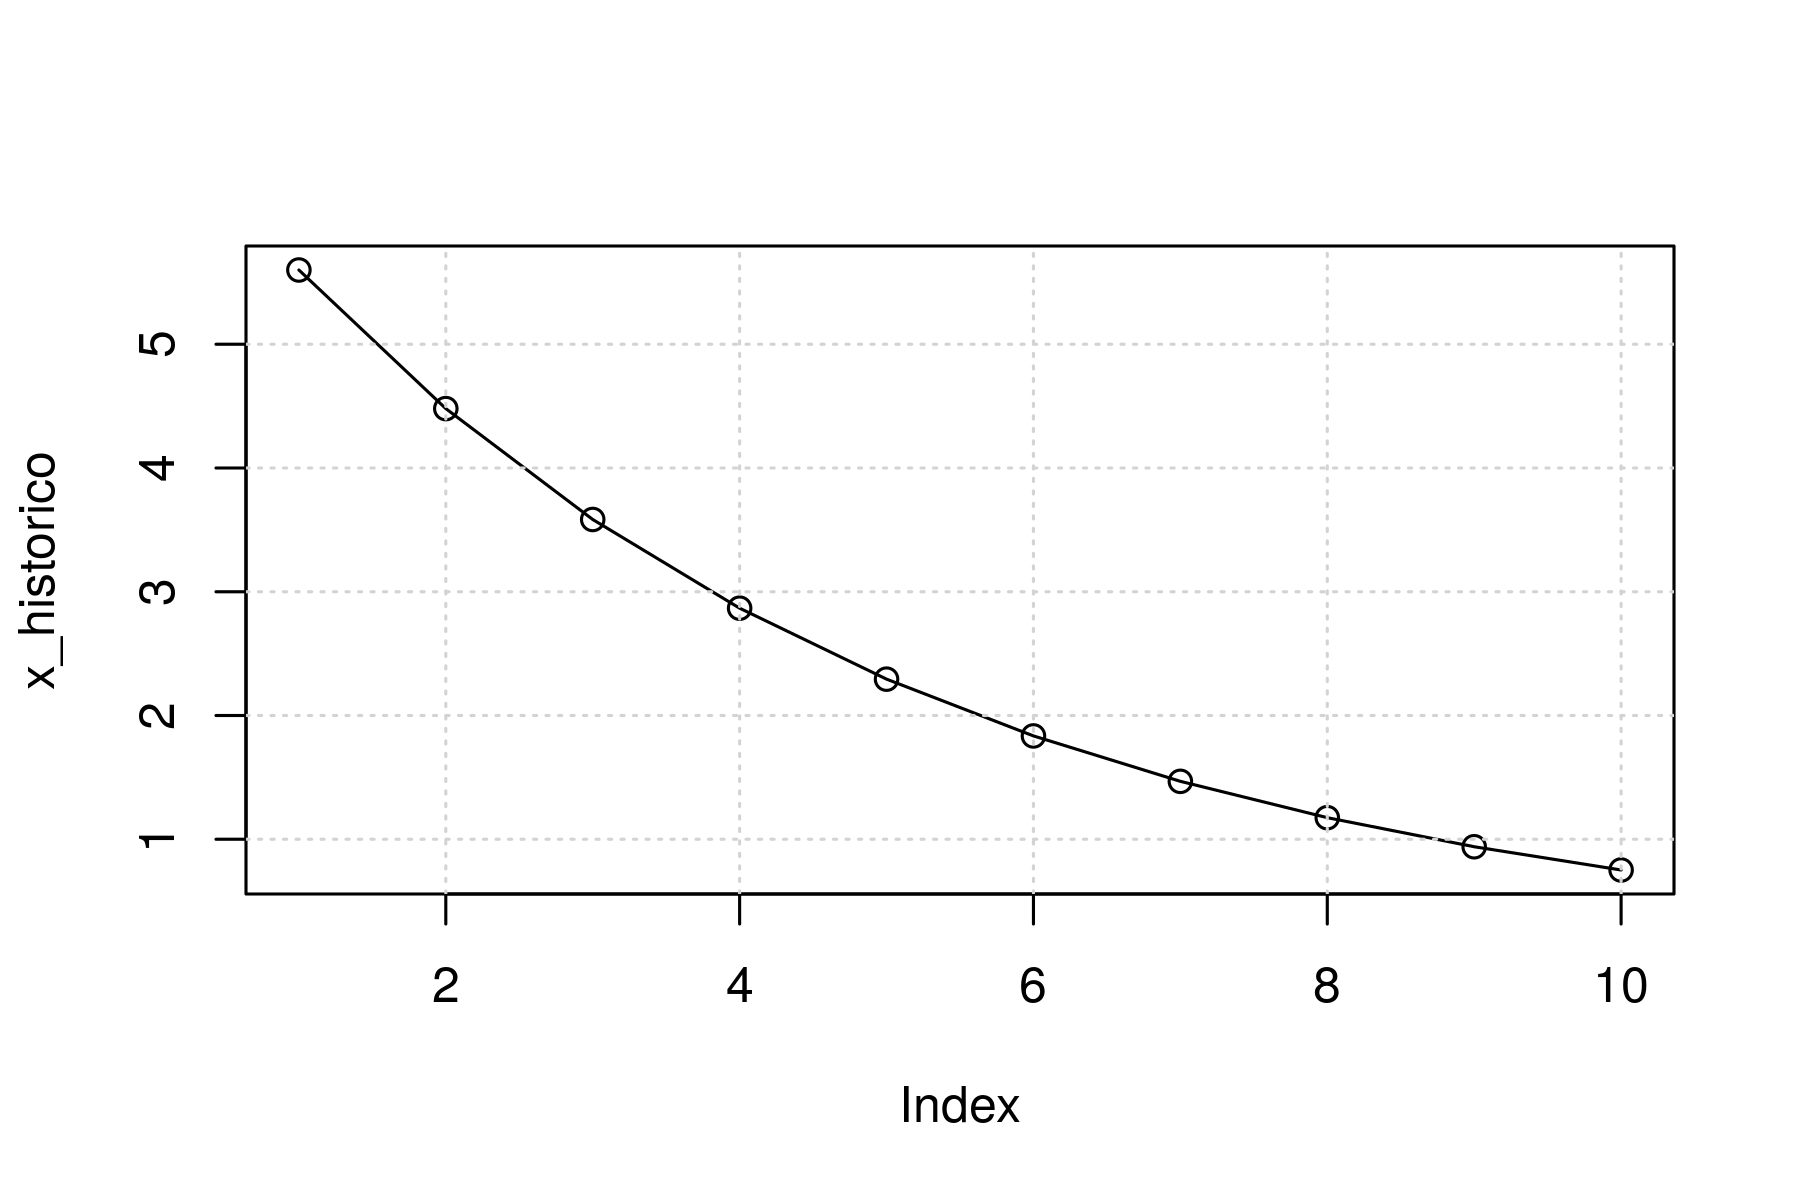

In [28]:
derivada_myfunc<-function(x){ 2*x }

x_0 <- 7
delta <- 0.1
x_historico<-c()
for (i in 1:10){
    x_new <- x_0 - derivada_myfunc(x_0)*delta
    x_0 <- x_new
    x_historico<-c(x_historico,x_0)
}
plot(x_historico,t="o")
grid()

**Problema: **

Muchas veces no tenemos una función conocida, solo una *caja negra*. ¿Cómo podemos calcular su derivada?


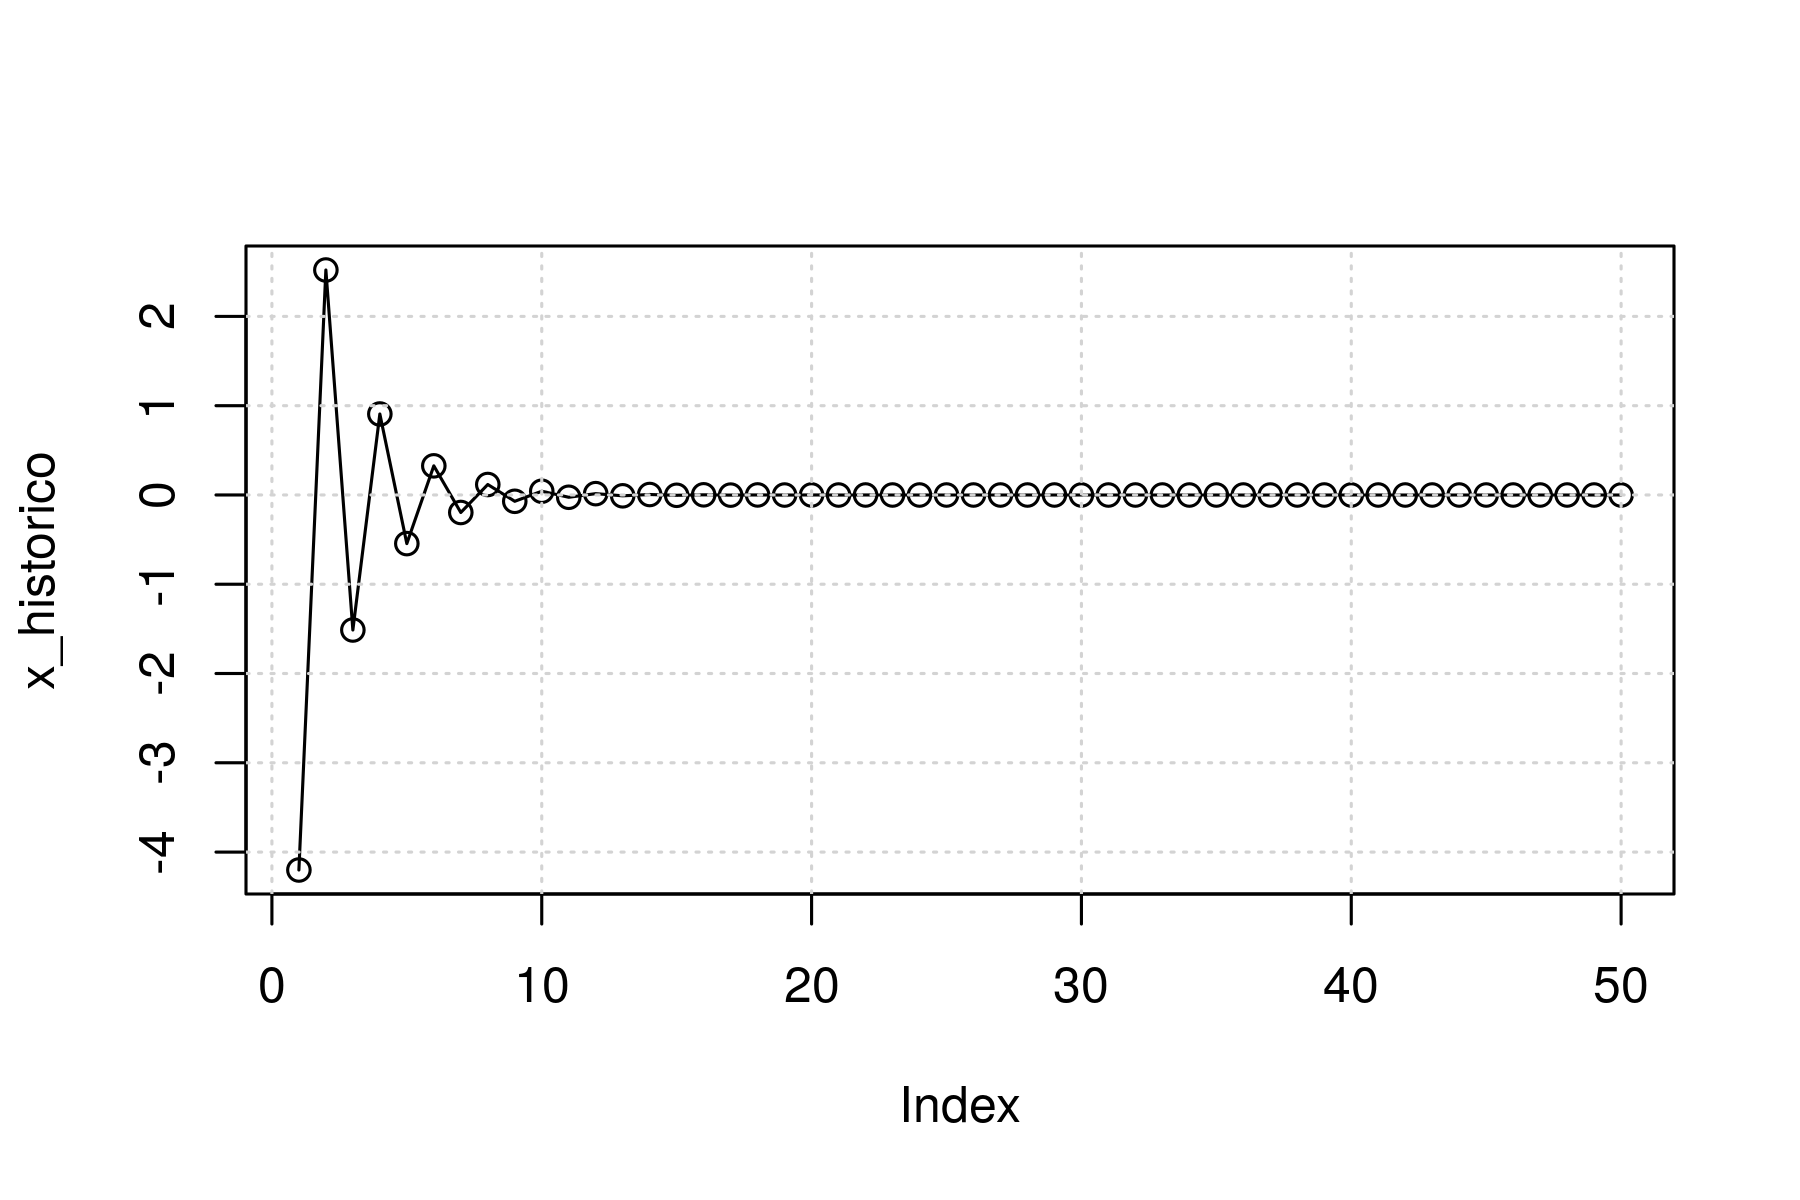

In [29]:
derivada_myfunc<-function(x,h,func){ (func(x+h)-func(x))/h }

x_0 <- 7
delta <- 0.8
h <- 0.001
x_historico<-c()
for (i in 1:50){
    x_new <- x_0 - derivada_myfunc(x_0,h,myfunc)*delta    
    x_0 <- x_new    
    x_historico<-c(x_historico,x_0)
}
plot(x_historico,t="o")
grid()


### Criterio de convergencia

Hasta ahora habíamos ejecutado nuestro algoritmo un número N de iteraciones pero deberíamos parar cuando la función converge al mínimo. A la hora de definir el criterio de convergencia hay que tener en cuenta:
* Si es demasiado restrictivo es posible que nunca se llegue.
* Si es demasiado laxo no conseguiremos optimizar todo lo posible.

Existen varias formas de definirlo:
* Si tras M iteraciones no se consigue disminuir el valor de la función a optimizar.
* Si la derivada es practicamente 0.

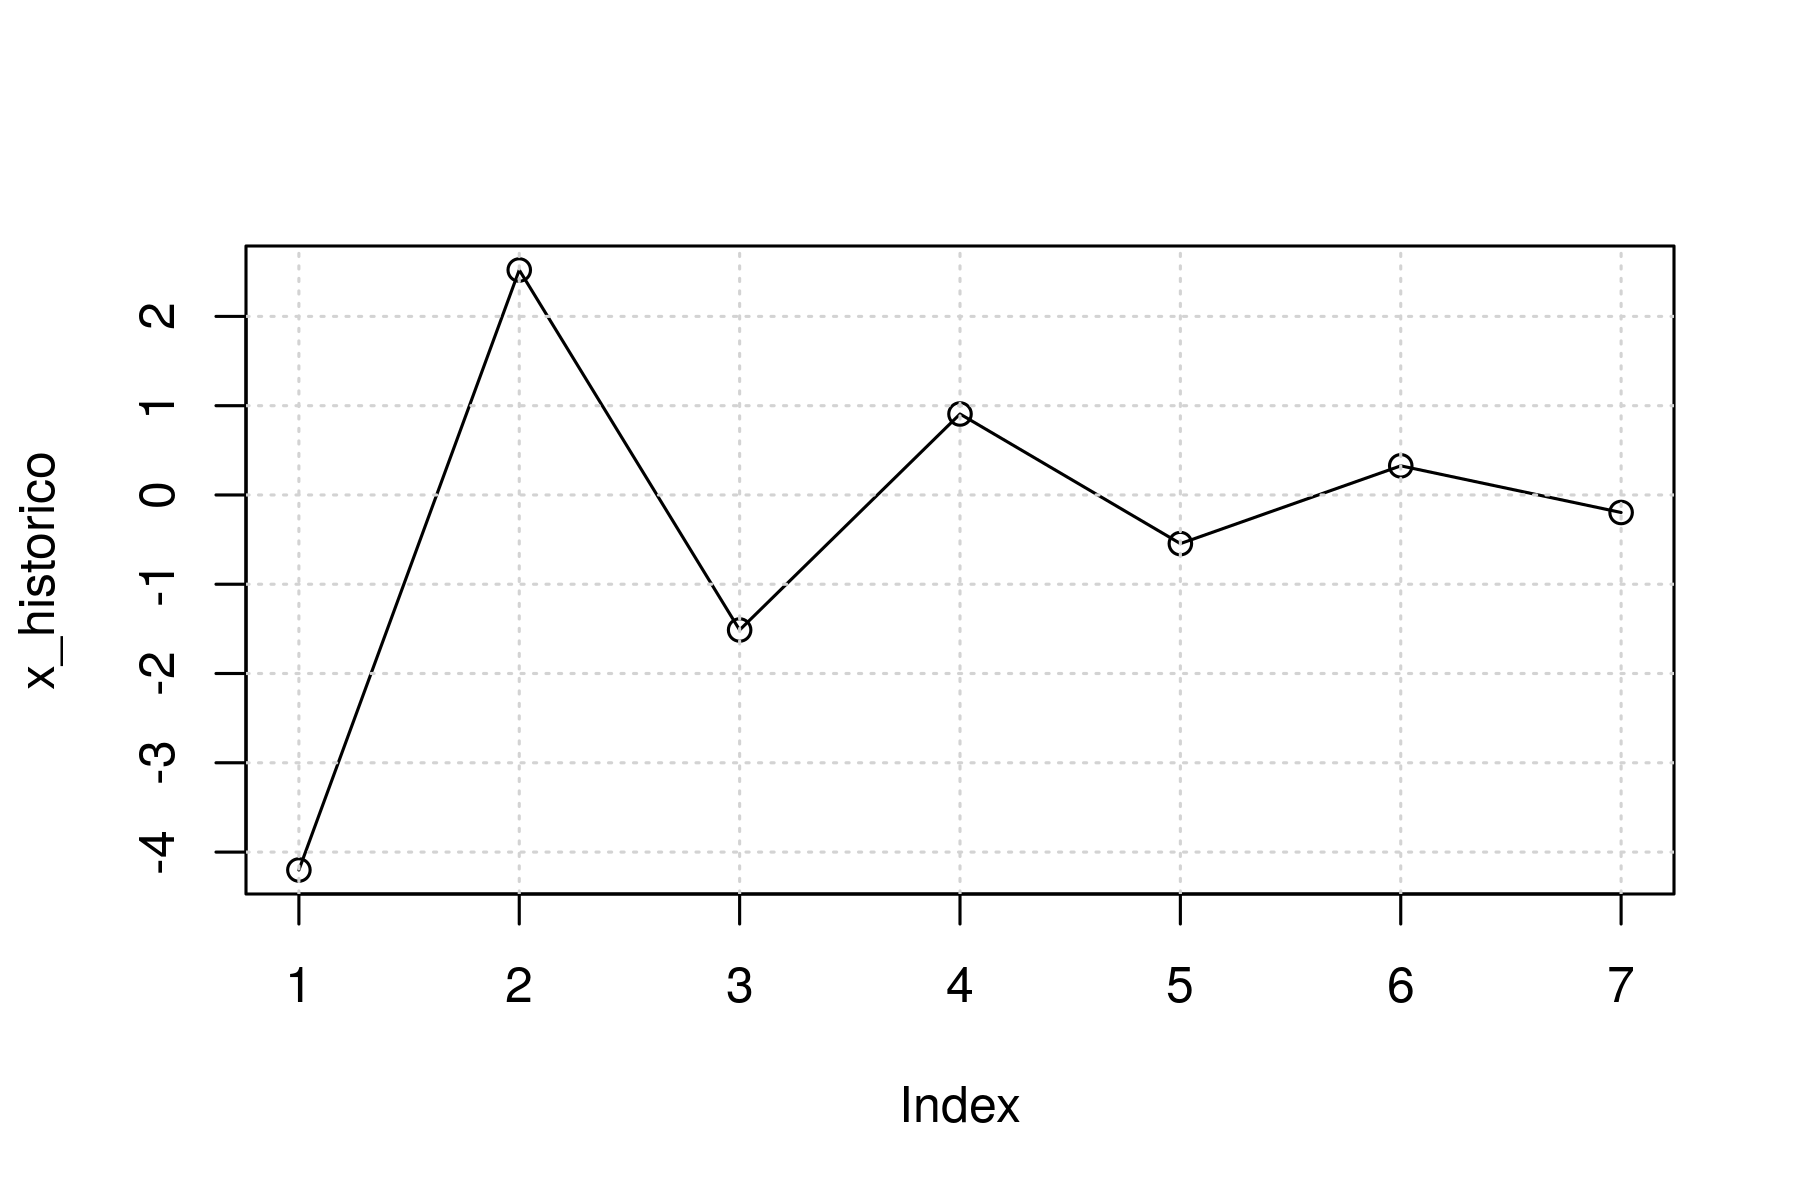

In [30]:
x_0 <- 7
delta <- 0.8
h <- 0.001
criterio_convergencia<-0.05
x_historico<-c()

for (i in 1:50){
    x_new <- x_0 - derivada_myfunc(x_0,h,myfunc)*delta    
    if (abs(myfunc(x_new)-myfunc(x_0))<criterio_convergencia){
        x<-ifelse(myfunc(x_new) < myfunc(x_0),myfunc(x_new),myfunc(x_0))
        break;
    }
    x_0 <- x_new
    x_historico<-c(x_historico,x_0)
}
plot(x_historico,t="o")
grid()


### Mínimo local vs Minimo global

Las funciones que trataremos de minimizar muchas vecse no serán funciones convexas como la que hemos visto,  podrán tener varios mínimos locales. 

Es imposible garantizar que nuestro algoritmo de optimización acabará en un mínimo global, pero por lo menos nos tenemos que asegurar que cae en un mínimo local con un valor lo suficientemente cercano al del mínimo global.


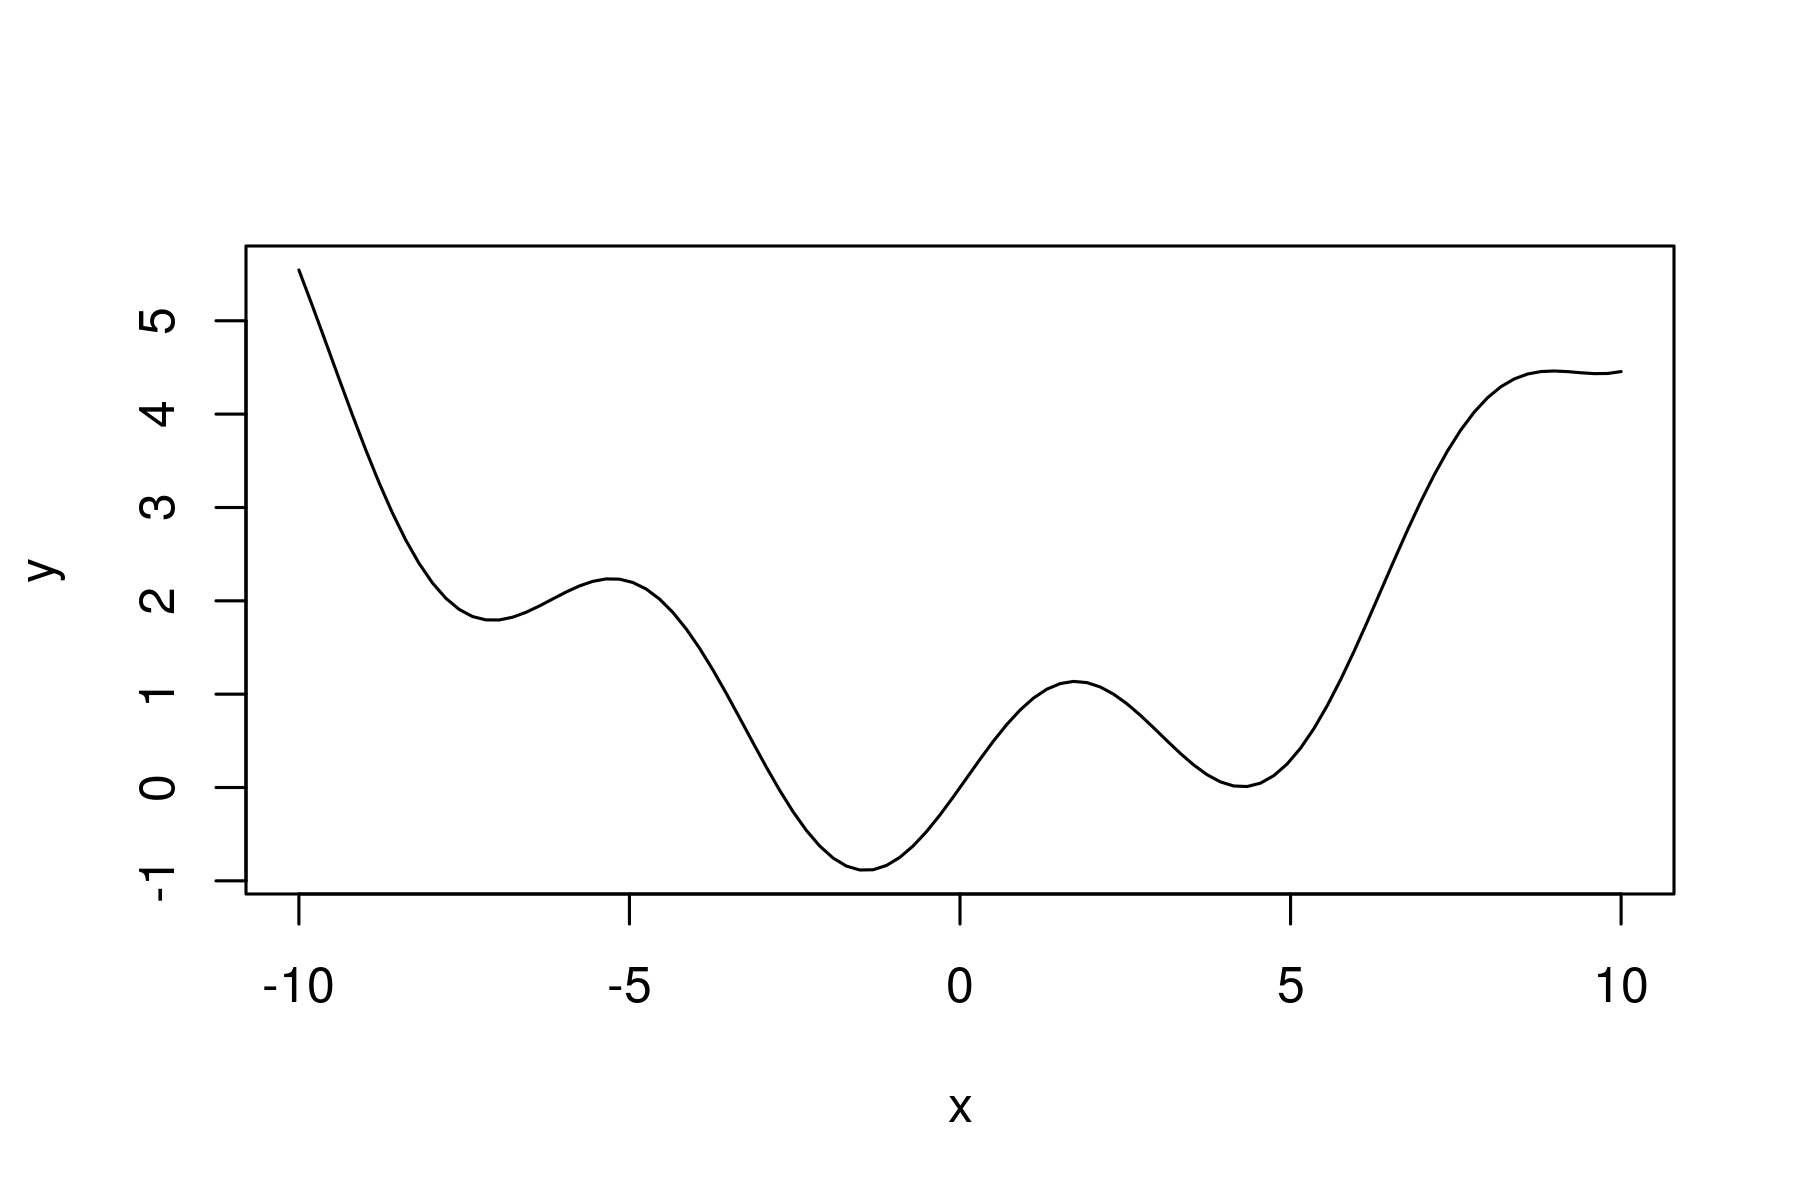

In [31]:
myfunc2<-function(x){0.05*x^2+sin(x)}
x<-seq(-10,10,length.out = 100)
y<-myfunc2(x)
plot(x,y,t="l")

In [51]:
library(plotrix)
derivada_myfunc<-function(x,h,func){ (func(x+h)-func(x))/h }


x_0 <- -20
delta <- 1
delta <- 3 #Cambiar delta
h <- 0.001
criterio_convergencia<-0.5
x_historico<-c()

[1] 0.846235

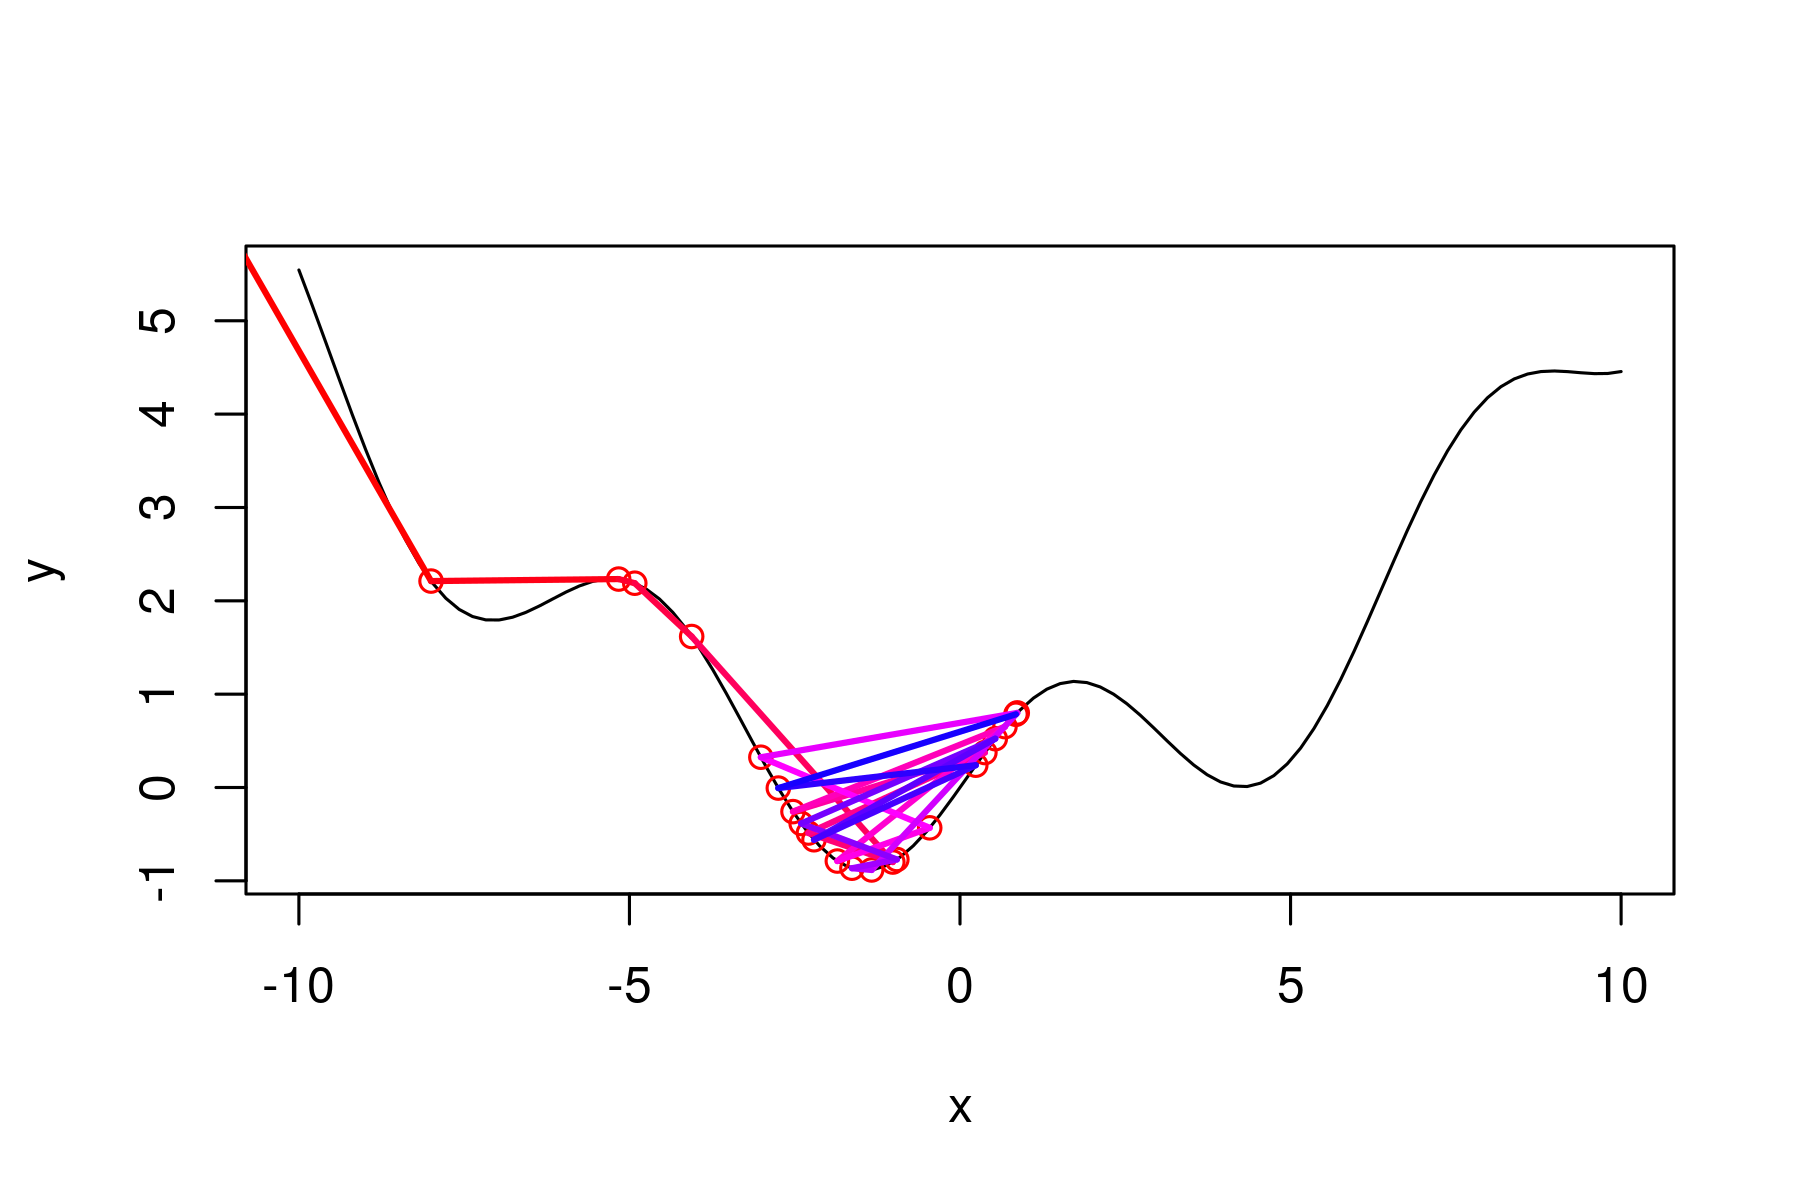

In [74]:
x_new <- x_0 - derivada_myfunc(x_0,h,myfunc2)*delta    
x_0 <- x_new
x_0
x_historico<-c(x_historico,x_0)


plot(x,y,t="l")
points(x_historico,myfunc2(x_historico),col="red")
color.scale.lines(x_historico,myfunc2(x_historico),c(1,1,0),0,c(0,1,1),colvar=1:length(x_historico),lwd=2)


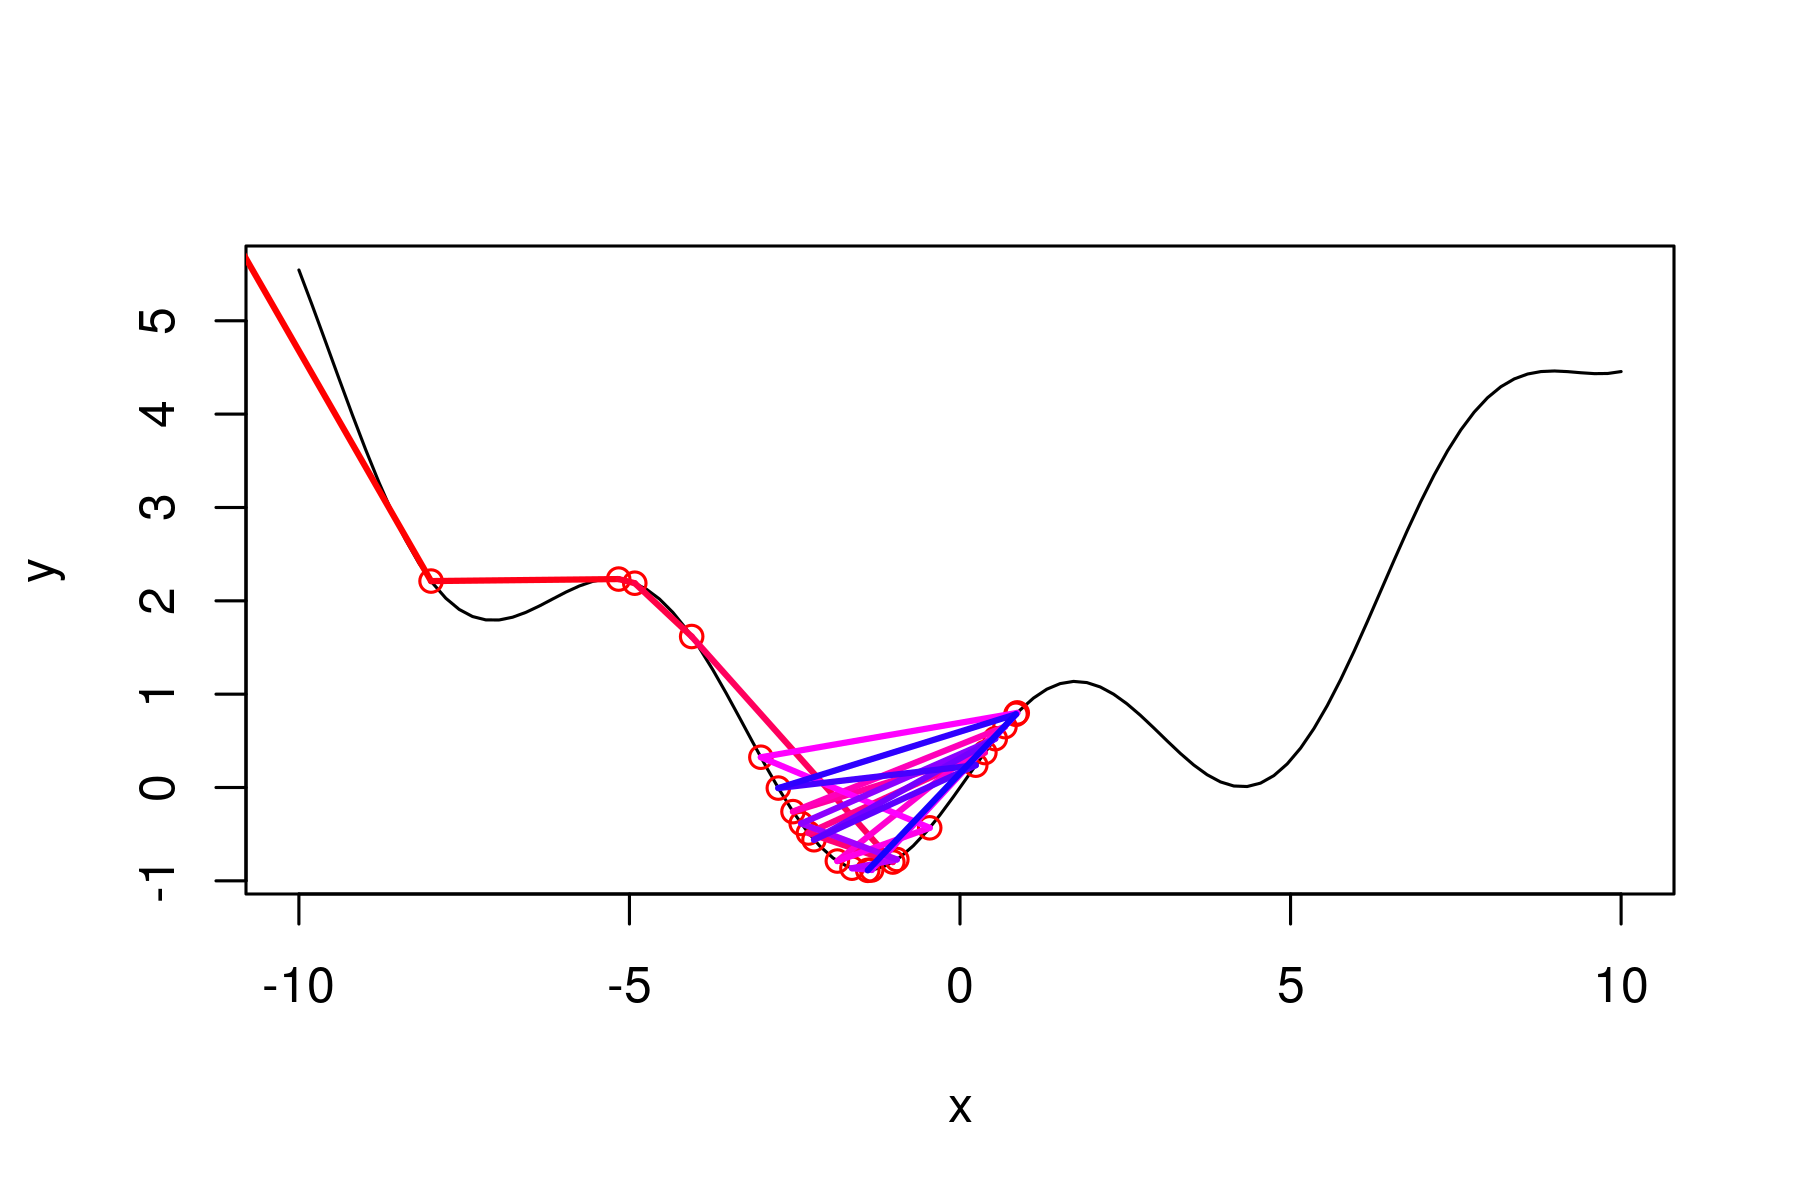

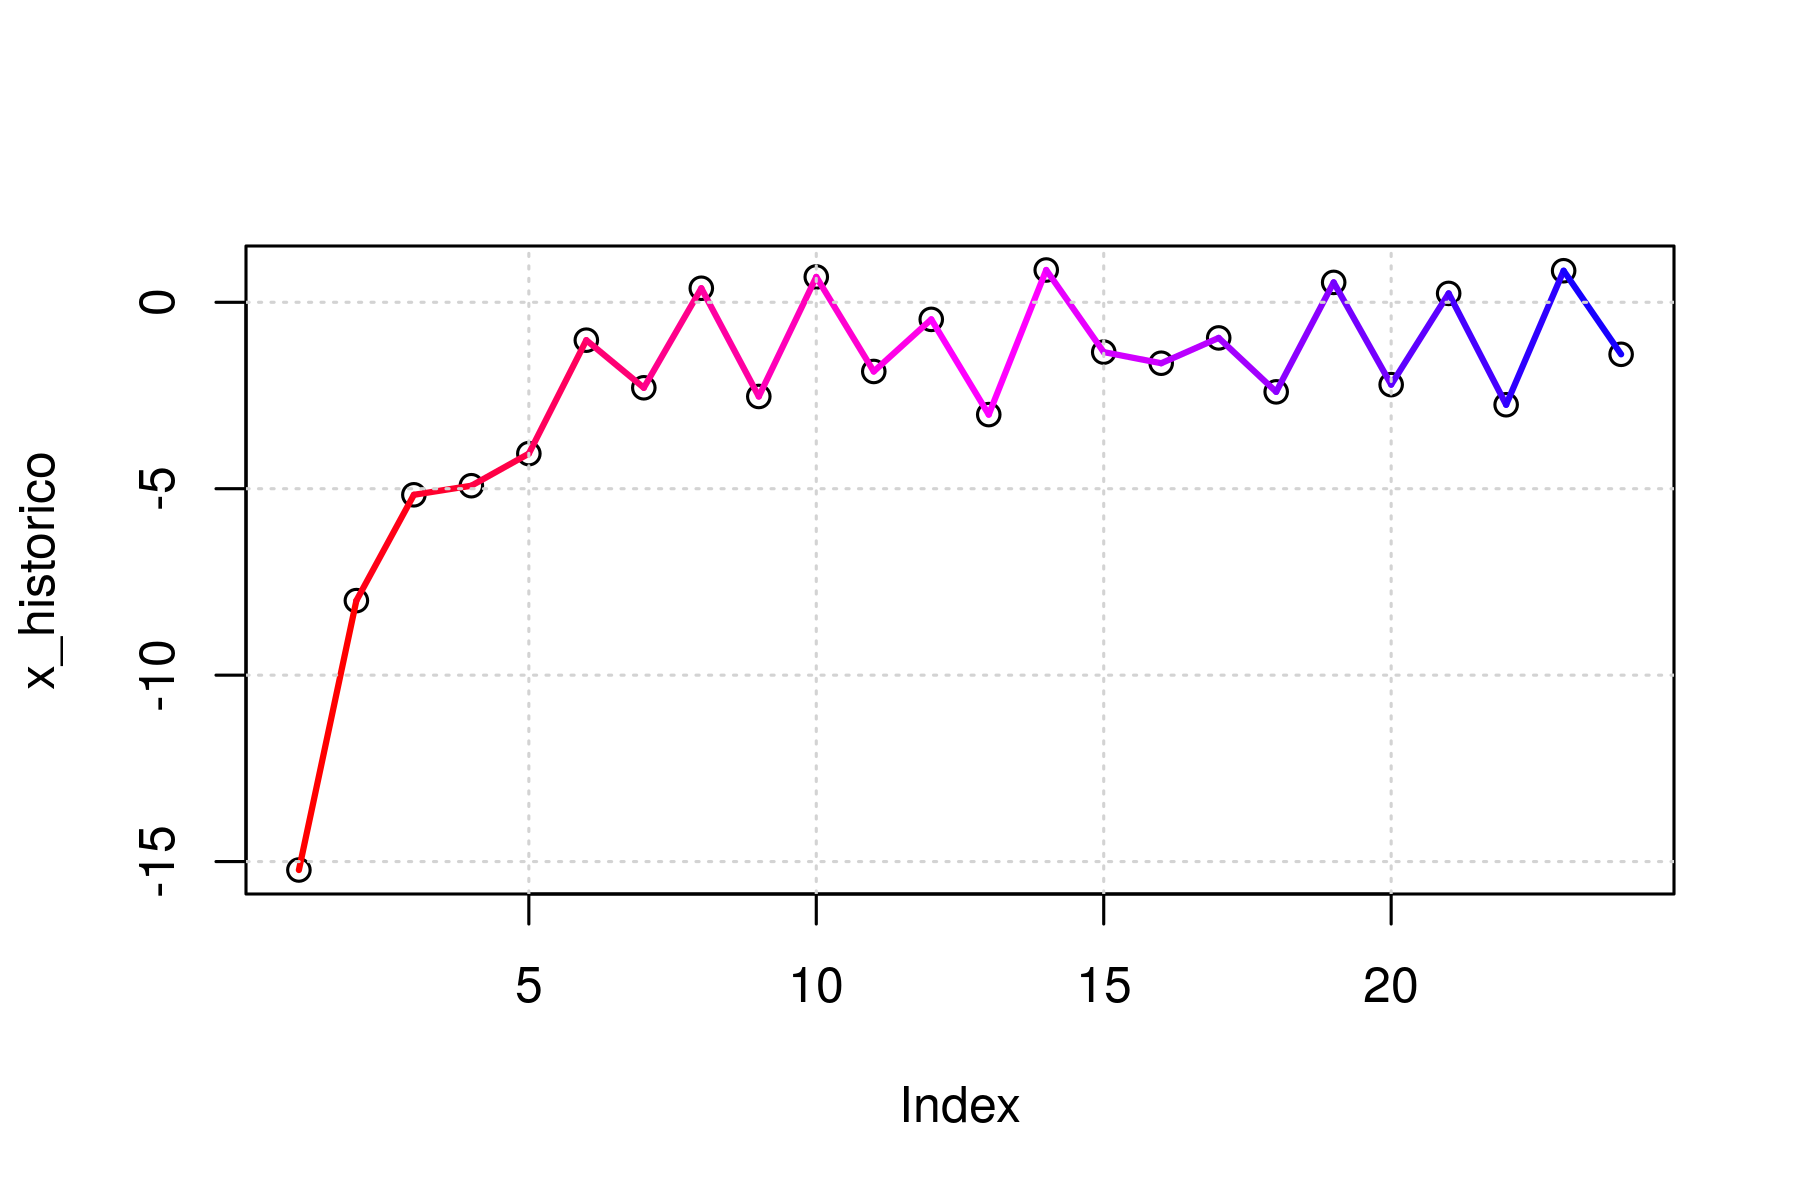

In [76]:
library(plotrix)
derivada_myfunc<-function(x,h,func){ (func(x+h)-func(x))/h }


x_0 <- -20
delta <- 1
delta <- 3 #Cambiar delta
h <- 0.001
criterio_convergencia<-0.5

x_historico<-c()
for (i in 1:50){
    x_new <- x_0 - derivada_myfunc(x_0,h,myfunc2)*delta    
    if (abs(myfunc(x_new)-myfunc(x_0))<criterio_convergencia){
        x_0<-ifelse(myfunc(x_new) < myfunc(x_0),myfunc(x_new),myfunc(x_0))
        break;
    }
    x_0 <- x_new
    x_historico<-c(x_historico,x_0)
}

plot(x,y,t="l")
points(x_historico,myfunc2(x_historico),col="red")
color.scale.lines(x_historico,myfunc2(x_historico),c(1,1,0),0,c(0,1,1),colvar=1:length(x_historico),lwd=2)

plot(x_historico,t="o")
color.scale.lines(1:length(x_historico),x_historico,c(1,1,0),0,c(0,1,1),colvar=1:length(x_historico),lwd=2)
grid()

### Espacio vectorial

La mayor parte de las funciones a optimizar no toman como entrada no un escalar sino un vector. En este caso el vector definirá un expacio en el cual habrá que encontrar el valor que produzca el mínimo valor.

Hasta ahora hemos visto la derivada de una función. Ahora vamos a introducir el concepto de derivada parcial:

Sea una función $f: \mathbb {R}^n \rightarrow  \mathbb {R}$ la derivada parcial $\frac{\partial }{\partial x_i}f \left(\vec{x} \right)$ mide como cambia $f \left(\vec{x} \right)$ en función de la variable $x_i$, esto es la columna *i-ésima* del vector $\vec{x}$.

Por ejemplo:
\\[
f(x_1,x_2)=x_1^2+3*x_2^2
\\]

La derivada parcial respecto a $x_1$ es: $\frac{\partial }{\partial x_1}f \left(\vec{x} \right) = 2x_1$

La derivada parcial respecto a $x_2$ es: $\frac{\partial }{\partial x_2}f \left(\vec{x} \right) = 6x_2$


El **gradiente** es la derivada respecto al vector $\vec{x}$, es una generalización multivariable de la derivada. Se denota con el símbolo $\nabla f$. El resultado es un vector, a diferencia de la derivada cuyo resultado es un escalar.
\\[
\nabla f(x_1,x_2)=2x_1·\vec{u}+6x_2·\vec{v}
\\]
Donde $\vec{u}$ y $\vec{v}$ son los vectores unitarios de las coordenadas dadas por $x_1$ y $x_2$ respectivamente.

El gradiente indica la dirección de máximo crecimiento de la función, y su valor negativo indica la dirección de máximo de decrecimiento.

Así pues el **método de descenso de gradientes** se basa en encontrar la dirección de máximo decrecimiento de la función y actualizar el valor de $\vec{x}$ en conformidad.
\\[
\vec{x}_{new} = \vec{x}-\epsilon \nabla f \left(\vec{x} \right)
\\]

Donde $\epsilon$ es una constante, un hiperparámetro, que hay que definir al principio de la iteración. Se le conoce como **tasa de aprendizaje** (learning rate). Un valor pequeño puede hacer que se necesiten muchas iteraciones para converger, una valor grande puede hacernos perder el máximo de la función.

El método de descenso de gradientes converge cuando todos los elemenos del gradiente son cero (o muy próximos a cero).

El método de descenso de gradientes se considera un algoritmo de **primer orden** porque utiliza información solo de la primera derivada. Nunca utiliza información de la segunda derivada.

In [79]:
myfuncVector<-function(x){ x[1]^2+3*x[2]^2 }

mygradient<-function(x,h,func){ 
    c((func(c(x[1]+h,x[2]))-func(x))/h,
      (func(c(x[1],x[2]+h))-func(x))/h) }


mygradient(c(4,3),0.001,myfuncVector)

[1]  8.001 18.003

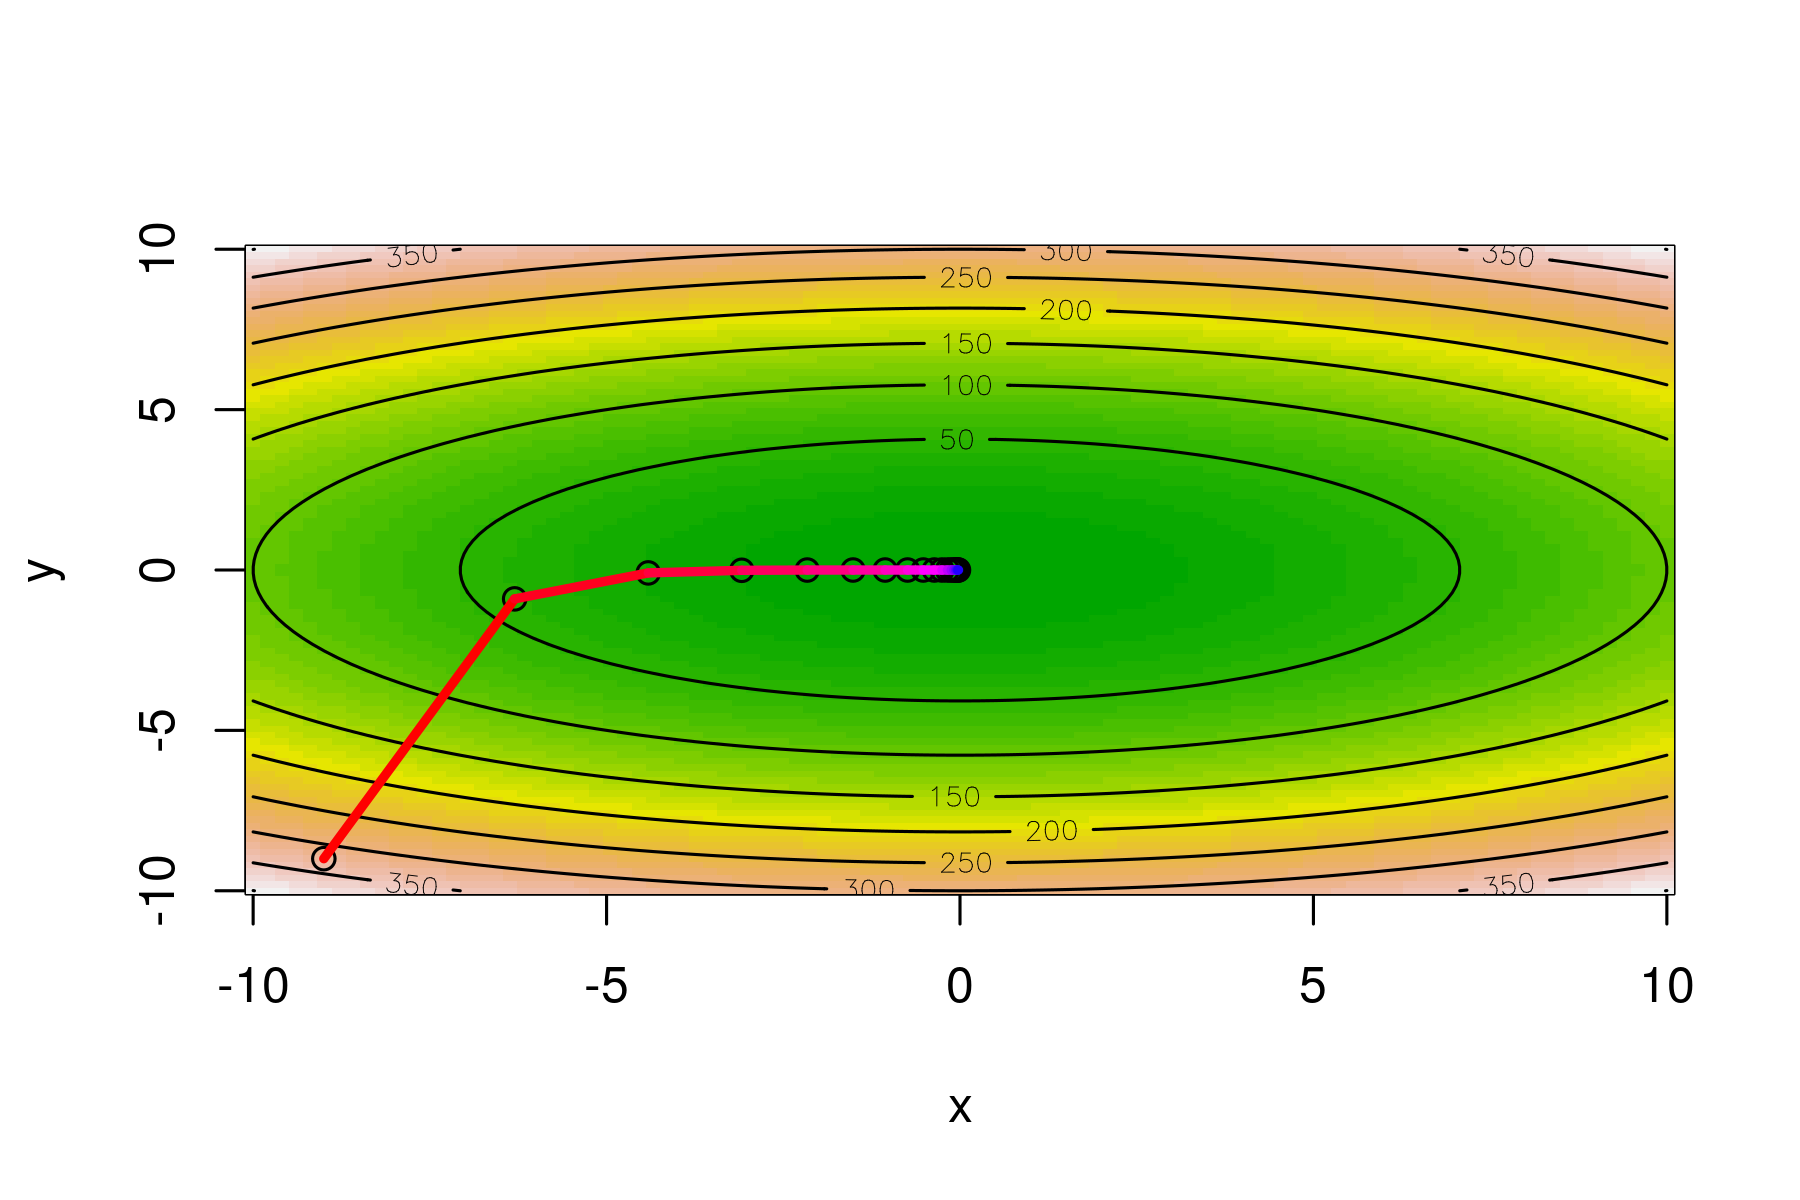

In [80]:
library(plotrix)


x_0 <- c(-9,-9)
delta <- 0.15
h <- 0.001
criterio_convergencia<-0.05

x_historico<-data.frame(x=x_0[1],y=x_0[2])
for (i in 1:100){
    g <- mygradient(x_0,h,myfuncVector)
    if(abs(sum(g))<criterio_convergencia){
        break;
    }
    x_new <- x_0 - g*delta     
    x_0 <- x_new
    x_historico<-rbind(x_historico,data.frame(x=x_0[1],y=x_0[2]))
}

myfunc3D<-function(x1,x2){x1^2+3*x2^2}
x <- seq(-10,10,length=100)
y <- seq(-10,10,length=100)
z <- outer(x,y,myfunc3D)
image(x,y,z,col = terrain.colors(39))
contour(x,y,z,add=T)
points(x_historico$x,x_historico$y,col="black")
color.scale.lines(x_historico$x,x_historico$y,c(1,1,0),0,c(0,1,1),colvar=1:nrow(x_historico),lwd=3)



[1] 23

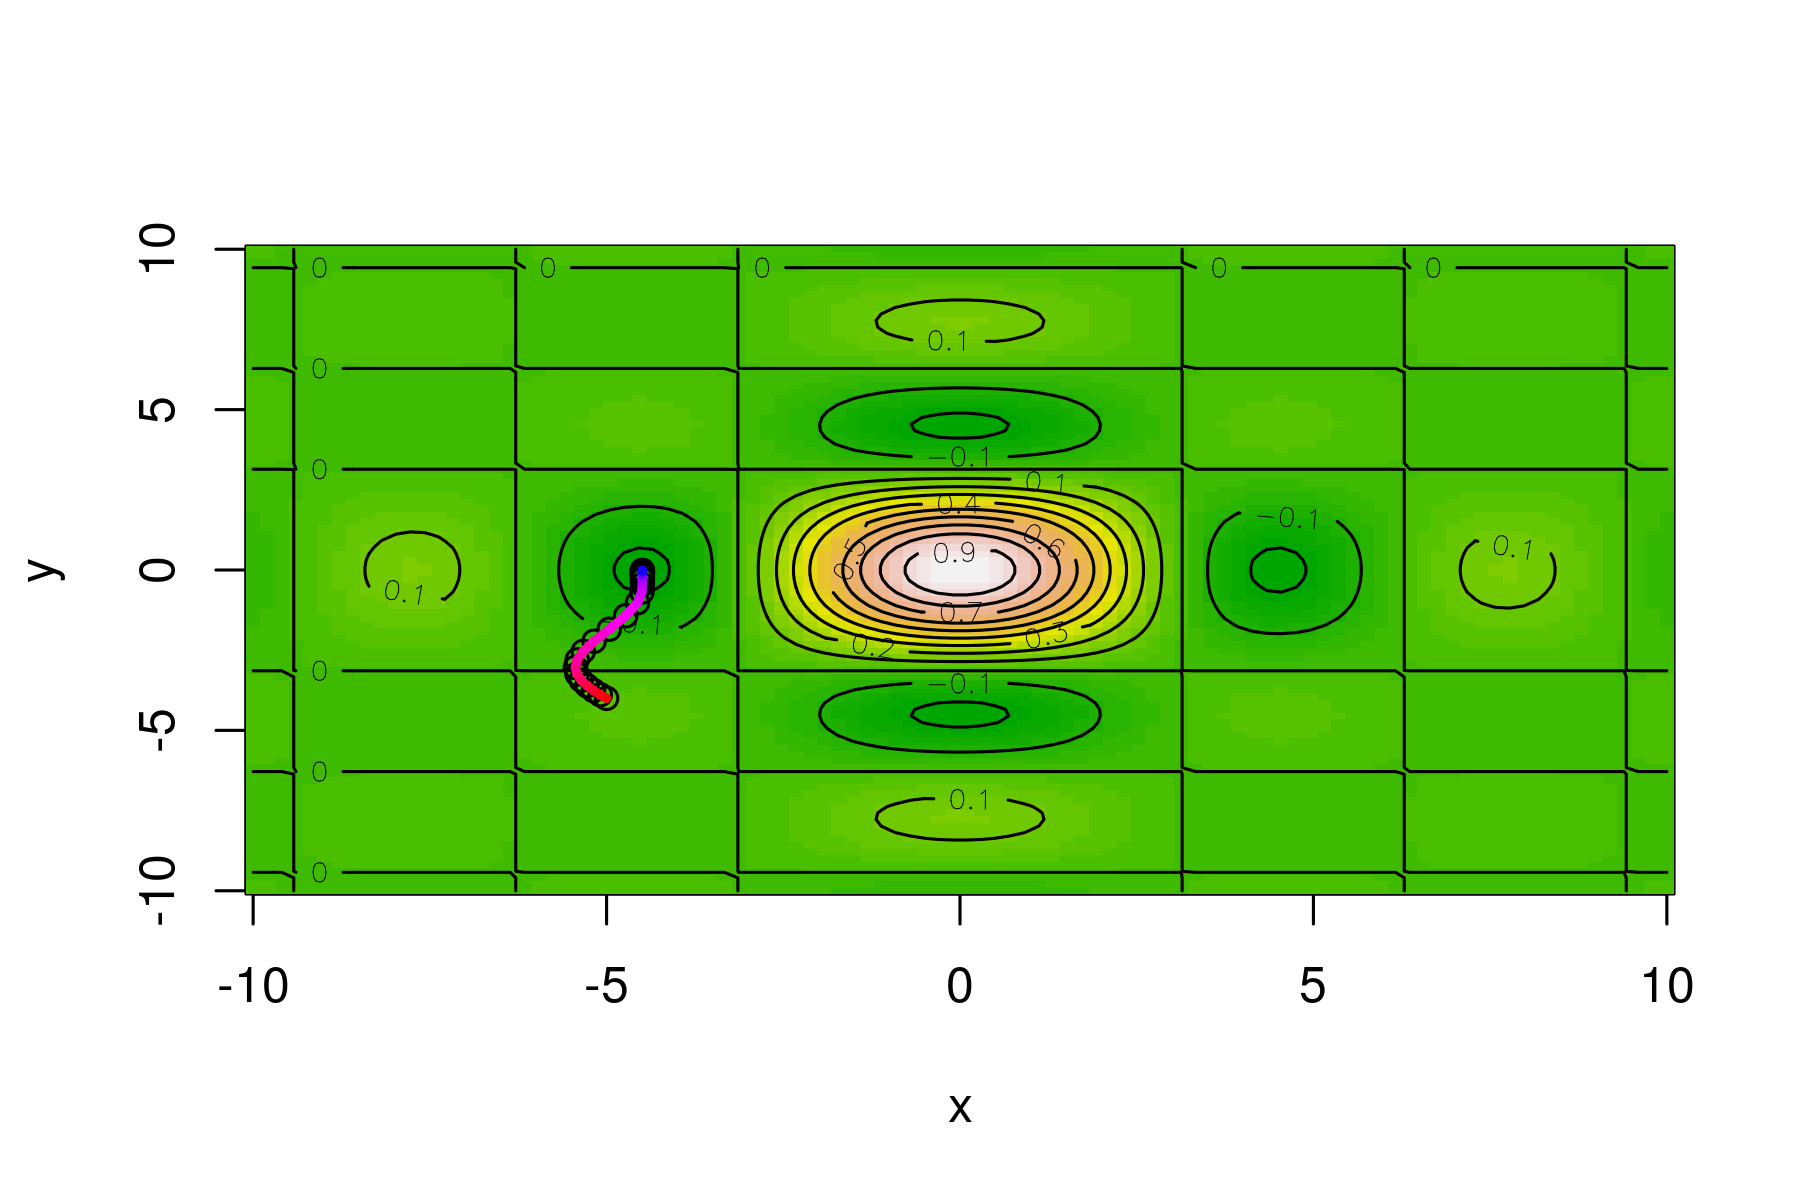

In [85]:
myfunc3D<-function(x1,x2){sin(x1)*sin(x2)/(x1*x2)}
x <- seq(-10,10,length=100)
y <- seq(-10,10,length=100)
z <- outer(x,y,myfunc3D)
image(x,y,z,col = terrain.colors(39))
contour(x,y,z,add=T)

myfuncVector<-function(x){ myfunc3D(x[1],x[2]) }

mygradient<-function(x,h,func){ 
    c((func(c(x[1]+h,x[2]))-func(x))/h,
      (func(c(x[1],x[2]+h))-func(x))/h) }

#x_0 <- c(-2,-7)
x_0 <- c(-5,-4)
#x_0 <- c(0.7,1)
delta <- 5
h <- 0.001
criterio_convergencia<-1e-3

x_historico<-data.frame(x=x_0[1],y=x_0[2])
for (i in 1:1000){
    g <- mygradient(x_0,h,myfuncVector)
    if(abs(sum(g))<criterio_convergencia){
        break;
    }
    x_new <- x_0 - g*delta     
    x_0 <- x_new
    x_historico<-rbind(x_historico,data.frame(x=x_0[1],y=x_0[2]))
}
nrow(x_historico)
points(x_historico$x,x_historico$y,col="black")
color.scale.lines(x_historico$x,x_historico$y,c(1,1,0),0,c(0,1,1),colvar=1:nrow(x_historico),lwd=3)

### Método de Newton

El método de Newton es un método utilizado para encontrar, de forma iterativa, la raíz de una función.


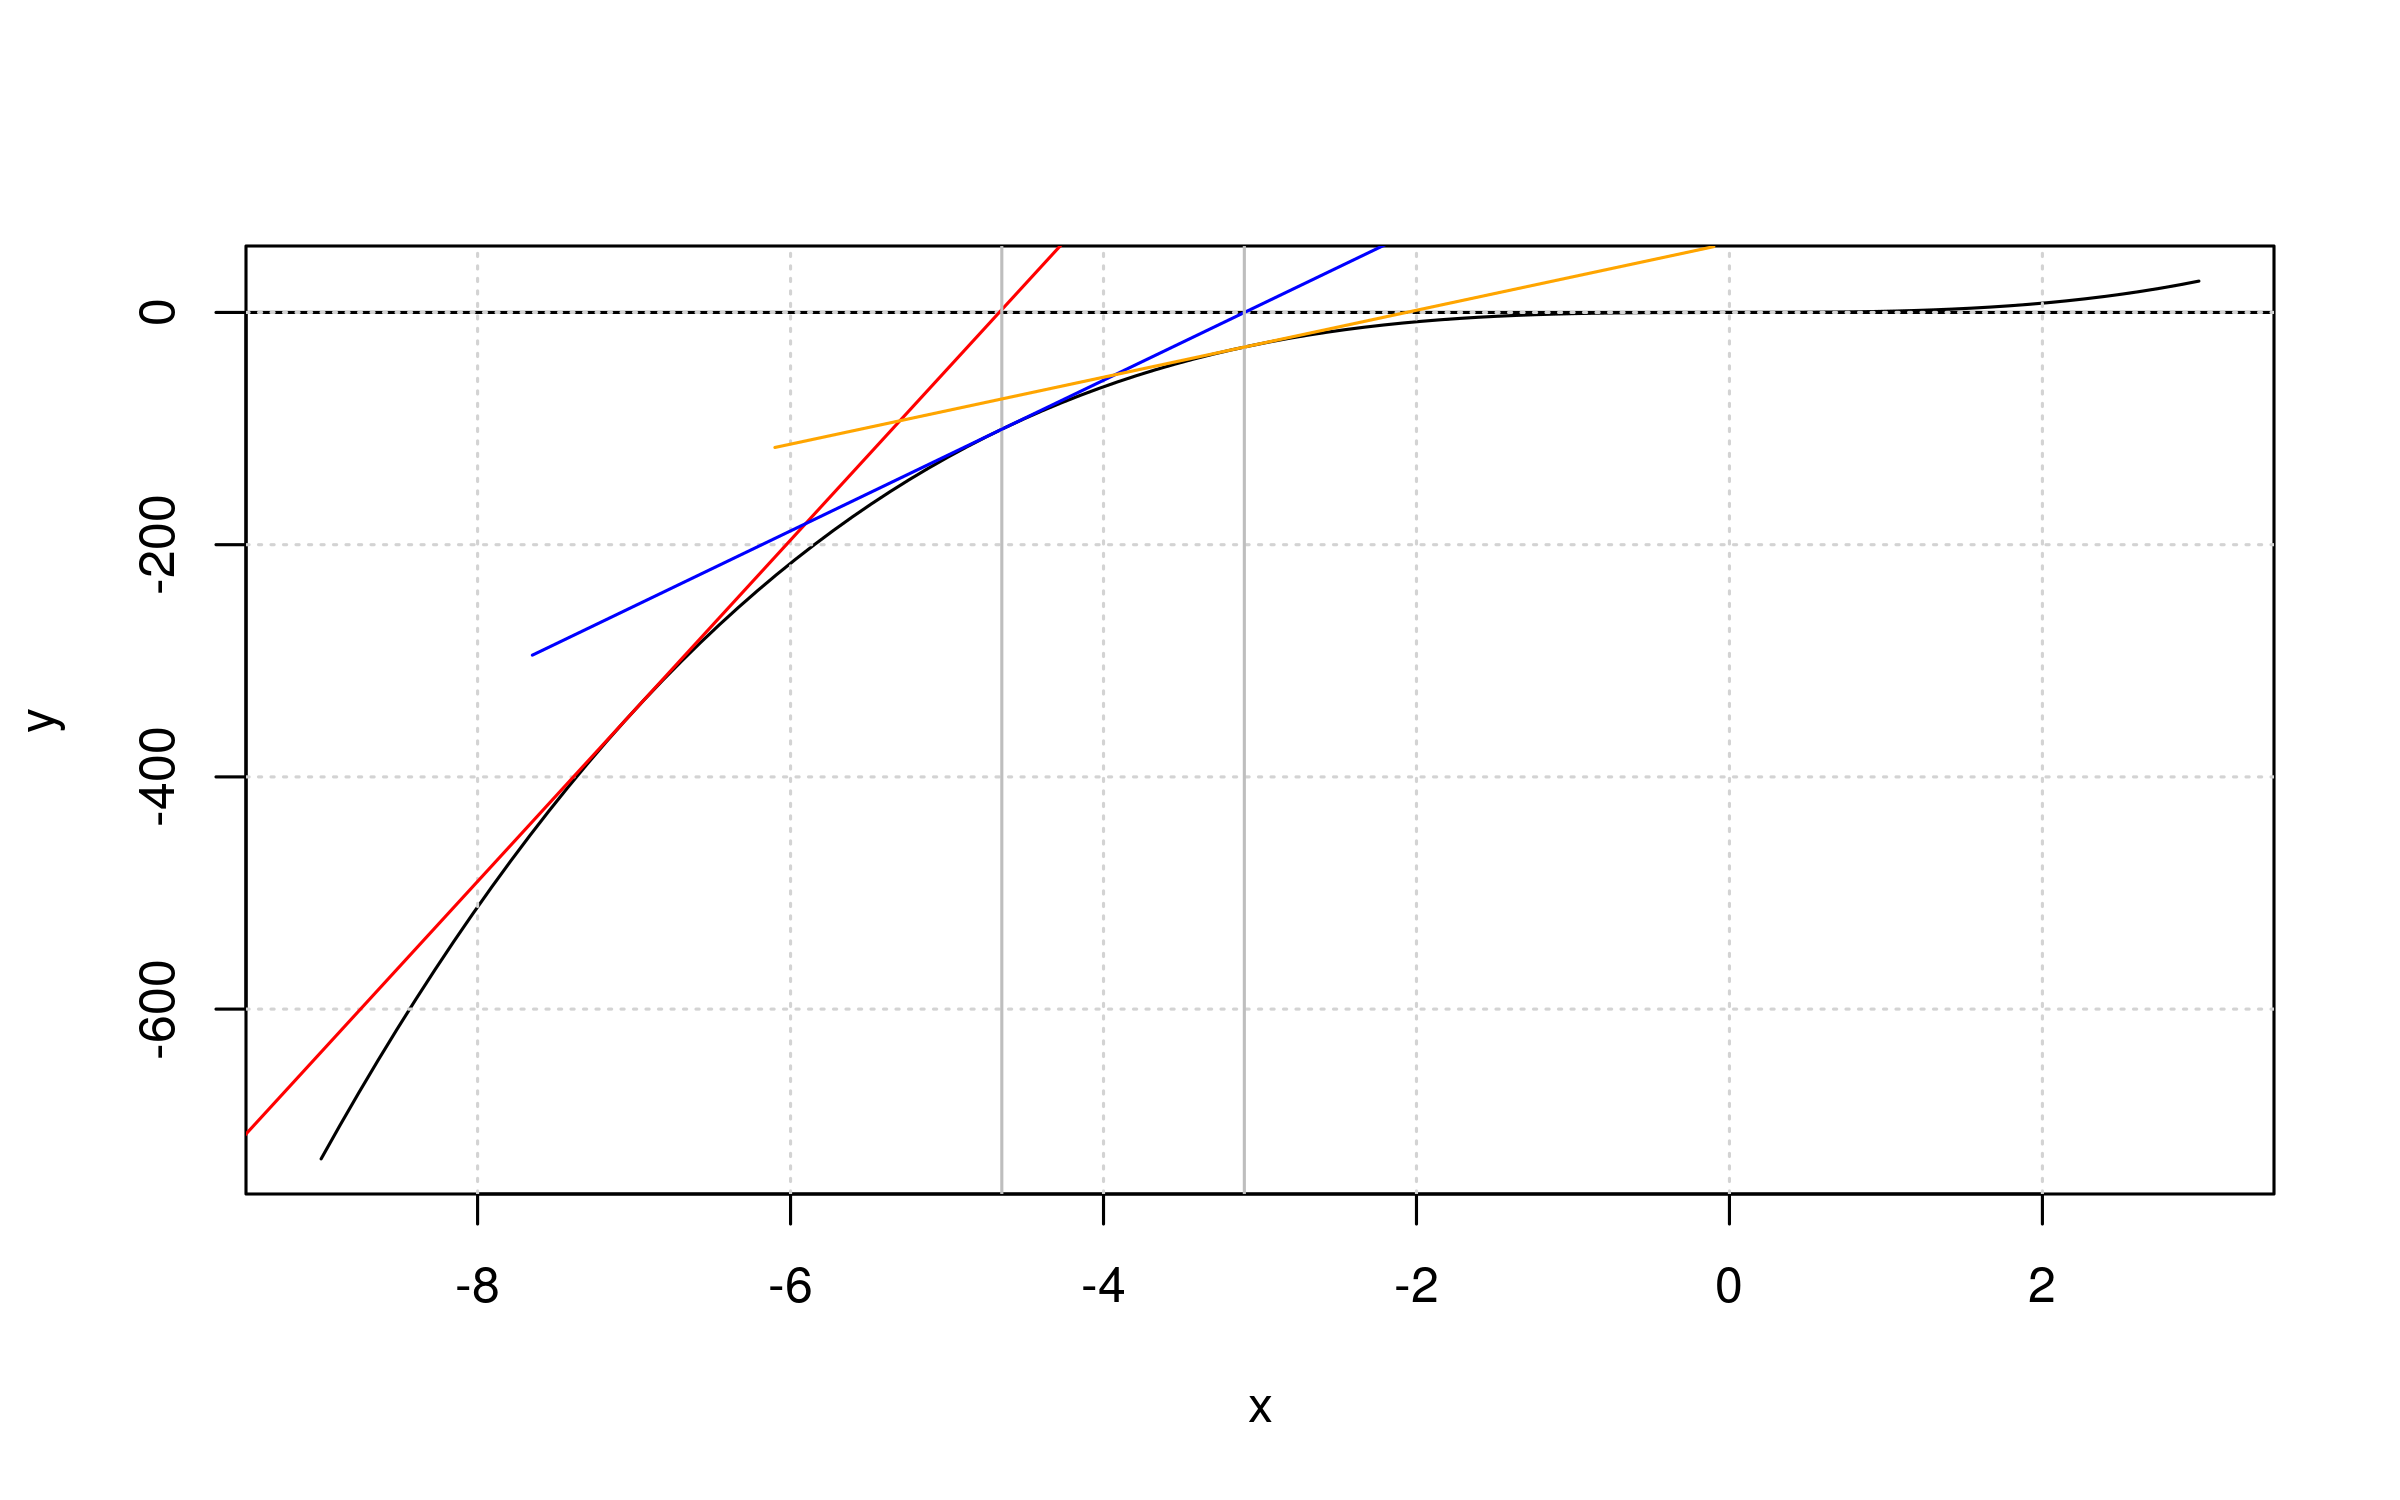

In [91]:
f_x<-function(x){x^3}

x<-seq(-9,3,length.out = 100)
y<-f_x(x)

options(repr.plot.height=4,repr.plot.width=6)
plot(x,y,t="l")
abline(h=0)
grid()
options(repr.plot.height=5,repr.plot.width=8)


plotDerivada<-function(x,color="red"){
    delta <- 3
    lines(c(x-delta,x+delta),
          c(f_x(x)-delta*3*x^2,f_x(x)+delta*3*x^2),
          col=color)
}
plotDerivada(-7)
abline(v=-4.65,col="gray")
plotDerivada(-4.65,color="blue")
abline(v=-3.1,col="gray")
plotDerivada(-3.1,color="orange")


Este método iterativo aproxima el valor de la función a 0 siguiendo los siguientes pasos:
1. Selecciona un punto inicial: $x_0$
1. Traza una línea tangente a la curva, es decir, con pendiente igual a la derivada.
1. Proyectar la línea anterior hasta que corte en $y=0$. El valor de $x$ donde corta será el nuevo $x_0$
1. Repetir desde el paso 2 hasta que $f(x_0)$ sea muy cercano a 0.

Estos pasos se pueden simplificar de la siguiente forma:

Podemos aproximar la functión $f(x)$ en un punto $x$ cercano a $x_0$ de la siguiente forma. Esto se considera una aproximación al desarrollo en serie de Taylor solo con la primera derivada:
\\[
f(x) \approx  f(x_0)+(x-x_0)·f'(x_0)
\\]

Si igualamos $f(x)=0$ y despejamos $x$:
\\[
\begin{split}
0 &= f(x_0)+(x-x_0)·f'(x_0) \\
0 &= f(x_0)+x·f'(x_0)-x_0·f'(x_0) \\
x_0·f'(x_0) - f(x_0) &= x·f'(x_0) \\
x_0 - \frac{f(x_0)}{f'(x_0)} &= x \\
\end{split}
\\]

Encontrar el mínimo de una función equivale a encontrar la raiz de su derivada. Es decir, el mínimo siempre se encuentra en $f'(x)=0$. Por lo tanto podemos usar el método de Newton para encontrar el mínimo de una función. Solo hay que reemplazar $f(x)$ por $f'(x)$:
\\[
x_{n+1} = x_n - \frac{f'(x_n)}{f''(x_n)}
\\]
Aplicamos de forma iterativa esa ecuación hasta que alcanzamos un mínimo. 

### Método de Newton en optimización

Para poder usar el método de Newton en optimización tenemos que generalizarlo a un espacio vectorial. 

#### Matriz Jacobiana

Es la generalización del concepto **derivada** aplicada a funciones de vectores. 


Supongamos que tenemos una función $f: \mathbb {R}^n \rightarrow  \mathbb {R}$.
En este caso el Jacobiano coincide con el gradiente: 
\\[
{\boldsymbol  \nabla }f({\vec {x}})={\begin{bmatrix}{\cfrac  {\partial y}{\partial x_{1}}}&\ldots &{\cfrac  {\partial y}{\partial x_{n}}}\end{bmatrix}}
\\]

Si tenemos una función $f: \mathbb {R}^n \rightarrow  \mathbb {R}^m$ el Jacobiano es la derivada parcial de todas las posibles combinaciones de coordenadas.
\\[
J_{\mathbf {f} }(x_{1},\ldots ,x_{n}) = {\begin{bmatrix}{\cfrac  {\partial y_{1}}{\partial x_{1}}}&\cdots &{\cfrac  {\partial y_{1}}{\partial x_{n}}}\\\vdots &\ddots &\vdots \\{\cfrac  {\partial y_{m}}{\partial x_{1}}}&\cdots &{\cfrac  {\partial y_{m}}{\partial x_{n}}}\end{bmatrix}}
\\]

#### Matriz Hessiana

Es la generalización del concepto **derivada segunda** aplicada a funciones de vectores. 

Dada una función $f: \mathbb {R}^n \rightarrow  \mathbb {R}$, la segunda derivada respecto a $x_i$ y $x_j$ es 
${\frac  {\partial ^{2}}{\partial x_{i}\,\partial x_{j}}}f \left(\vec{x}\right)$. Es decir:

\\[
H_{{f}}\left(\vec{x}\right)_{{i,j}}={\frac  {\partial ^{2}}{\partial x_{i}\,\partial x_{j}}}f \left(\vec{x}\right).
\\]

Esto se convierte en una matriz de la siguiente forma:
\\[
H(f)=\begin{bmatrix}{\frac  {\partial ^{2}f}{\partial x_{1}^{2}}}&{\frac  {\partial ^{2}f}{\partial x_{1}\partial x_{2}}}&\cdots &{\frac  {\partial ^{2}f}{\partial x_{1}\partial x_{n}}}\\{\frac  {\partial ^{2}f}{\partial x_{2}\partial x_{1}}}&{\frac  {\partial ^{2}f}{\partial x_{2}^{2}}}&\cdots &{\frac  {\partial ^{2}f}{\partial x_{2}\partial x_{n}}}\\\vdots &\vdots &\ddots &\vdots \\{\frac  {\partial ^{2}f}{\partial x_{n}\partial x_{1}}}&{\frac  {\partial ^{2}f}{\partial x_{n}\partial x_{2}}}&\cdots &{\frac  {\partial ^{2}f}{\partial x_{n}^{2}}}
\end{bmatrix}
\\]

La matriz **Hessiana** es el **Jacobiano** del gradiente.

**Ejemplo**:
\\[
f(x_1,x_2)=x_1^2+x_2^3
\\]
Sabemos que:
\\[
\begin{split}
\frac{\partial f(x_1,x_2)}{\partial x_1} &= 2·x_1 \\
\frac{\partial f(x_1,x_2)}{\partial x_2} &= 3·x_2^2
\end{split}
\\]

Su matriz Hessiana se calcula como:
\\[
\begin{split}
\frac{\partial f(x_1,x_2)}{\partial x_1 x_1} &= 2 \\
\frac{\partial f(x_1,x_2)}{\partial x_1 x_2} &= 0 \\
\frac{\partial f(x_1,x_2)}{\partial x_2 x_1} &= 0 \\
\frac{\partial f(x_1,x_2)}{\partial x_2 x_2} &= 6·x_2 
\end{split}
\\]

El resultado es:
\\[
H(f_\vec{x})=\begin{bmatrix} 
2 & 0 \\
0 & 6·x_2
\end{bmatrix}
\\]


### Método de Newton

La ecuación:
\\[
x = x_0 - \frac{f'(x_0)}{f''(x_0)}
\\]
la podemos generalizar reemplazando $f'(x)$ con el gradiente y $f''(x)$ con la matriz Hessiana.

\\[
\vec x = \vec x_0 - [\mathbf {H} f\left(\vec {x}_0 \right)]^{-1}·\nabla f(\mathbf {x}_0)
\\]

Podemos añadir una tasa de aprendizaje (learning rate) $\epsilon$, un hiperparámetro, que hay que definir al principio de la iteración. Se le conoce como **tasa de aprendizaje** (learning rate). Un valor pequeño puede hacer que se necesiten muchas iteraciones para converger, una valor grande puede hacernos perder el máximo de la función.


\\[
\vec x = \vec x_0 - \epsilon [\mathbf {H} f\left(\vec {x}_0 \right)]^{-1}·\nabla f(\mathbf {x}_0)
\\]


**Ejemplo en R**

En R podemos usar el paquete *pracma* que tiene las funciones *grad()* y *hessian()* para calcular el gradiente y la matriz Hessiana.

Por ejemplo, vamos a calcular en R el gradiente y la matriz Hessiana de $f(x_1,x_2)=x_1^2+x_2^3$, en el punto $[2,1]$ que sabemos que es:
\\[
\nabla (f_\vec{x})=\begin{bmatrix} 
2·x_1 & 3·x_2^2 \\
\end{bmatrix} =
\begin{bmatrix} 
4 & 3 \\
\end{bmatrix} 
\\]
\\[
H(f_\vec{x})=\begin{bmatrix} 
2 & 0 \\
0 & 6·x_2
\end{bmatrix}
=\begin{bmatrix} 
2 & 0 \\
0 & 6
\end{bmatrix}
\\]


In [92]:
library(pracma)
f_x1x2<-function(x){x[1]^2+x[2]^3}
xvec<-c(2,1)
print("El gradiente es:")
grad(f_x1x2,xvec)
print("La matriz Hessiana es:")
hessian(f_x1x2,xvec)

[1] "El gradiente es:"


[1] 4 3

[1] "La matriz Hessiana es:"


[,1] [,2]
[1,] 2    0   
[2,] 0    6

[1] 11

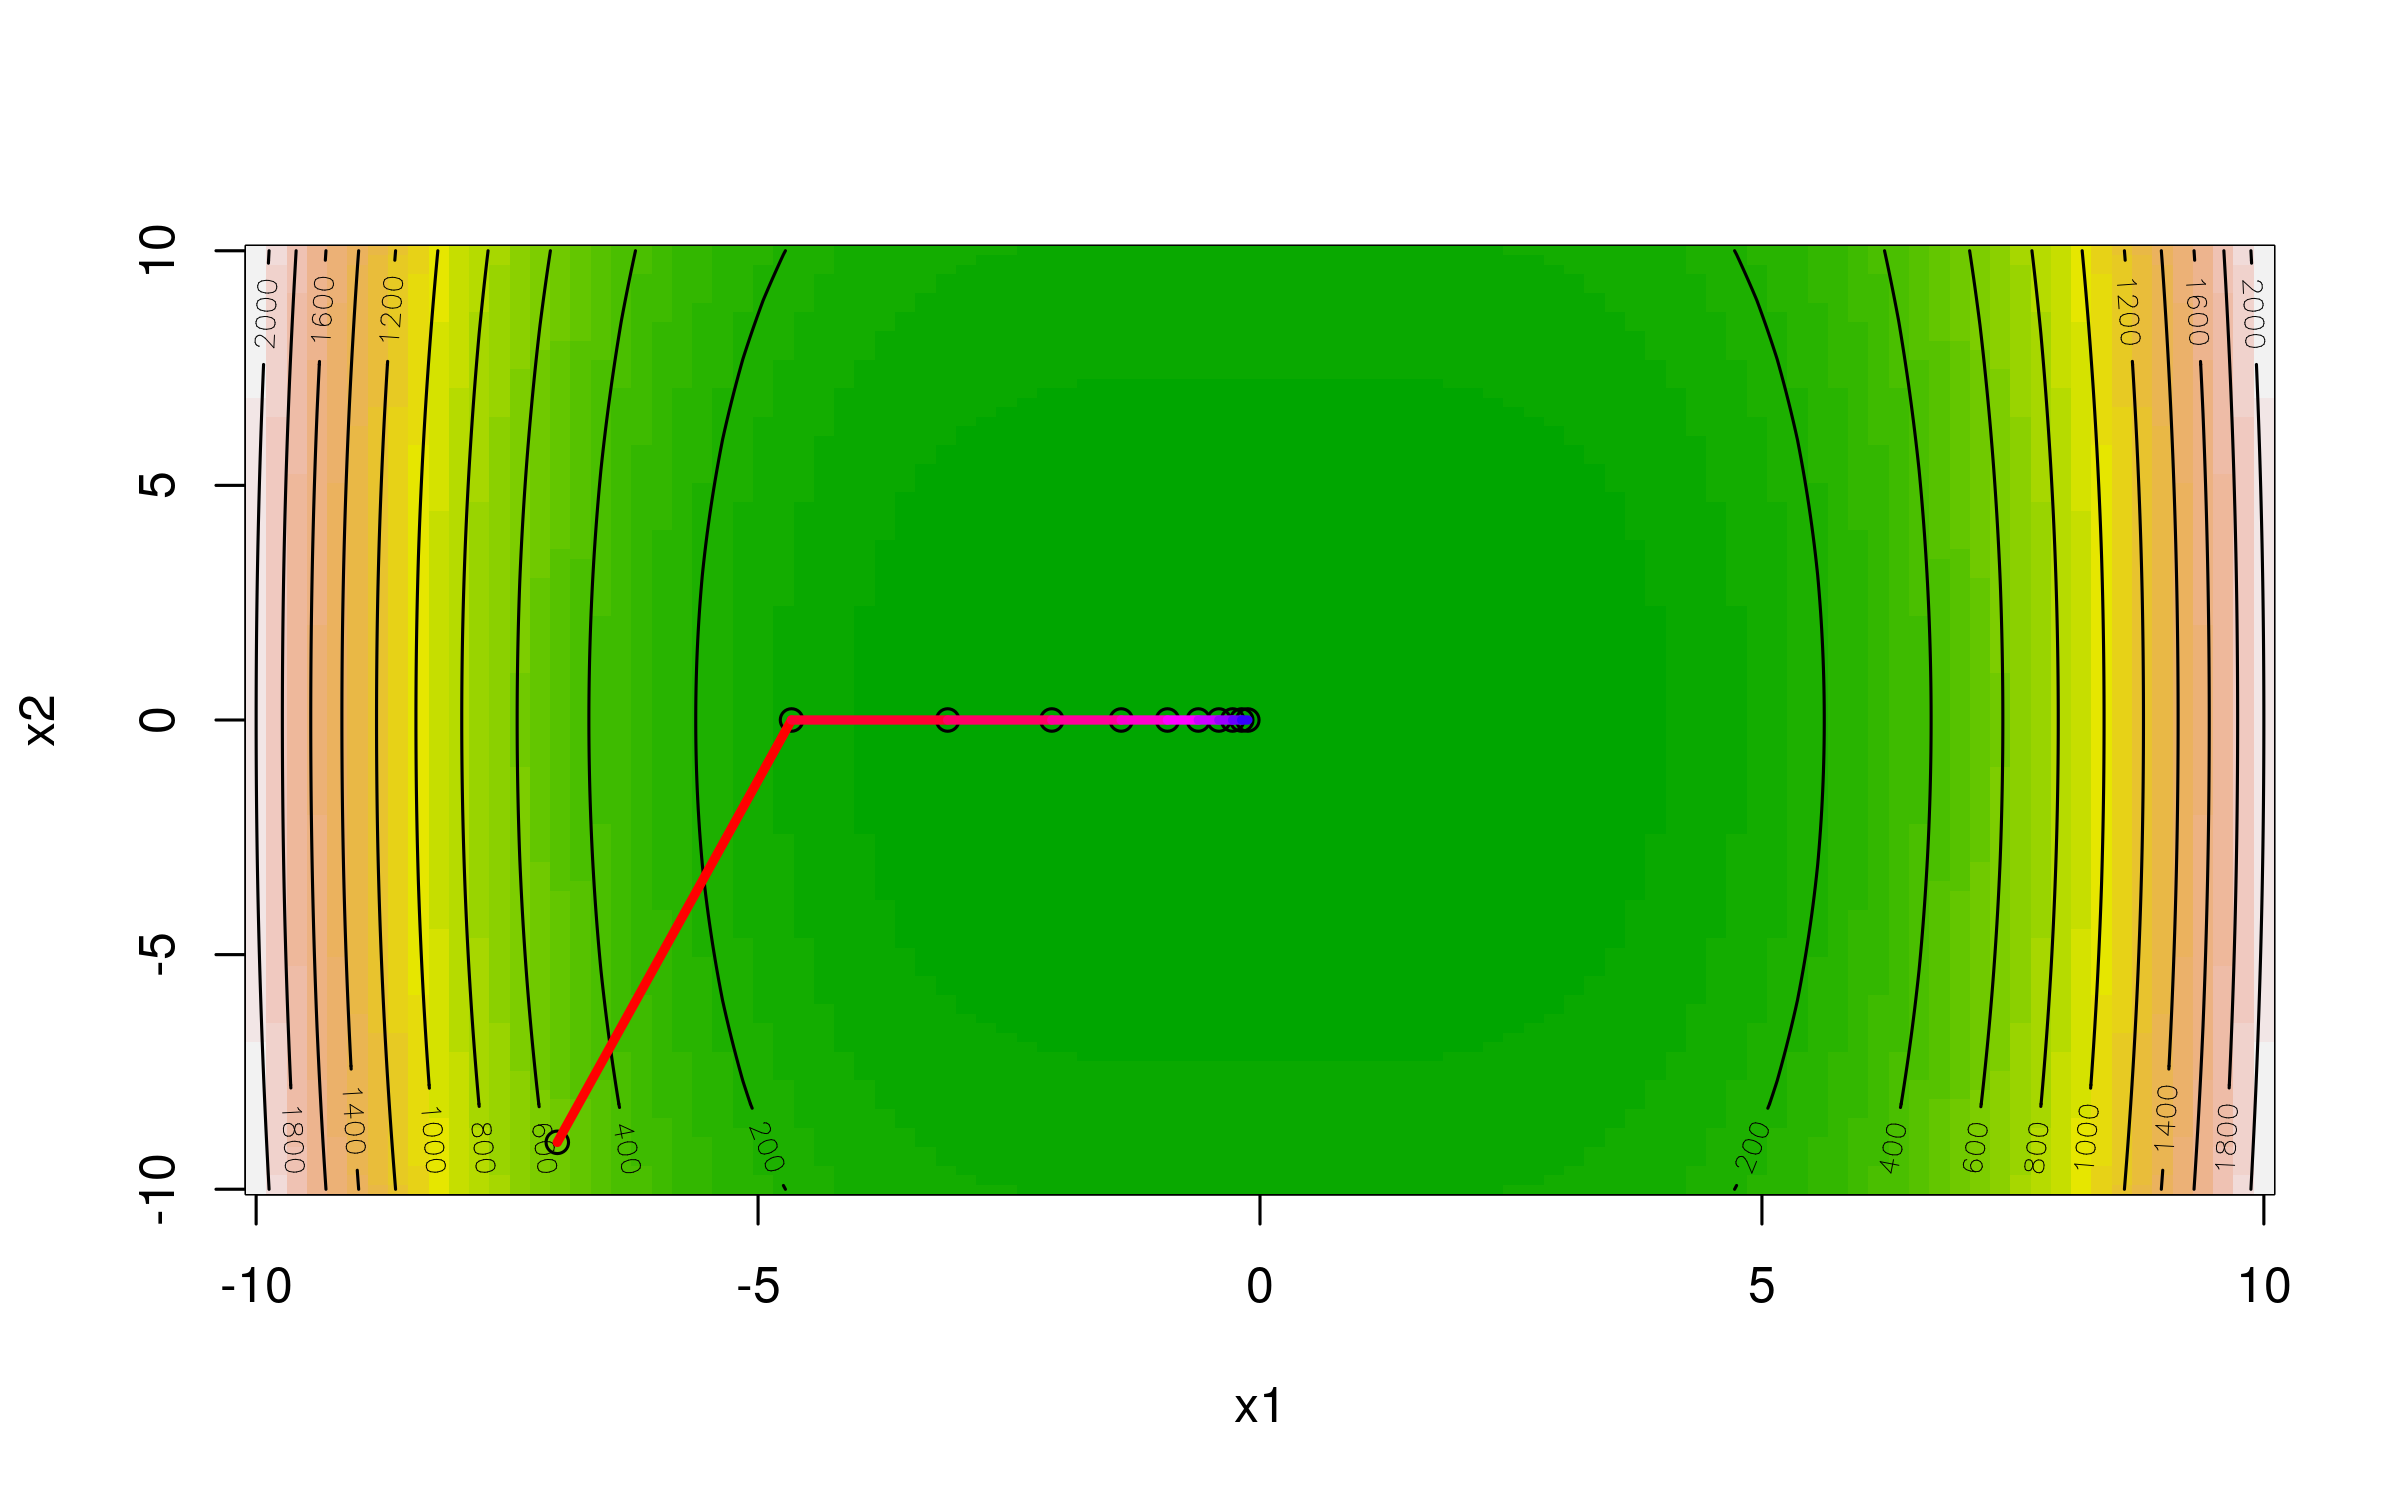

In [95]:
library(pracma)
library(plotrix)
myfunc3D<-function(x1,x2){0.2*x1^4+x2^2}
#myfunc3D<-function(x1,x2){x1^2+3*x2^2}

myfuncVector<-function(x){ myfunc3D(x[1],x[2])  }

mygradient<-function(x,h,func){ 
  c((func(c(x[1]+h,x[2]))-func(x))/h,
    (func(c(x[1],x[2]+h))-func(x))/h) }

x_0 <- c(-7,-9)
delta<- 0.025 
delta <- 1 

h <- 0.001
criterio_convergencia<-0.05


x_historico<-data.frame(x=x_0[1],y=x_0[2])
for (i in 1:100){
  #g <- mygradient(x_0,h,myfuncVector)
  g <- inv(hessian(myfuncVector,x_0)) %*% as.matrix(grad(myfuncVector,x_0),cols=1)
  x_new <- x_0 - g*delta
  if(abs(sum(g))<criterio_convergencia){
    break;
  }       
  x_0 <- x_new
  x_historico<-rbind(x_historico,data.frame(x=x_0[1],y=x_0[2]))
}
nrow(x_historico)

x1 <- seq(-10,10,length=100)
x2 <- seq(-10,10,length=100)
z <- outer(x1,x2,myfunc3D)
image(x1,x2,z,col = terrain.colors(39))
contour(x1,x2,z,add=T)
points(x_historico$x,x_historico$y,col="black")
color.scale.lines(x_historico$x,x_historico$y,c(1,1,0),0,c(0,1,1),colvar=1:nrow(x_historico),lwd=3)

#### Problemas del método de Newton

* El calcular la matriz Hessiana es costoso computacionalmente hablando.
* Cuando la función es convexa y cuadrática converge en un solo salto, si no es cuadrática hacen falta más iteraciones.
* Es útil solo cuando el punto crítico cercano es un mínimo.

[1] "Numero pasos 10"

[1] "Valor alcanzado 0.00440336968796299"

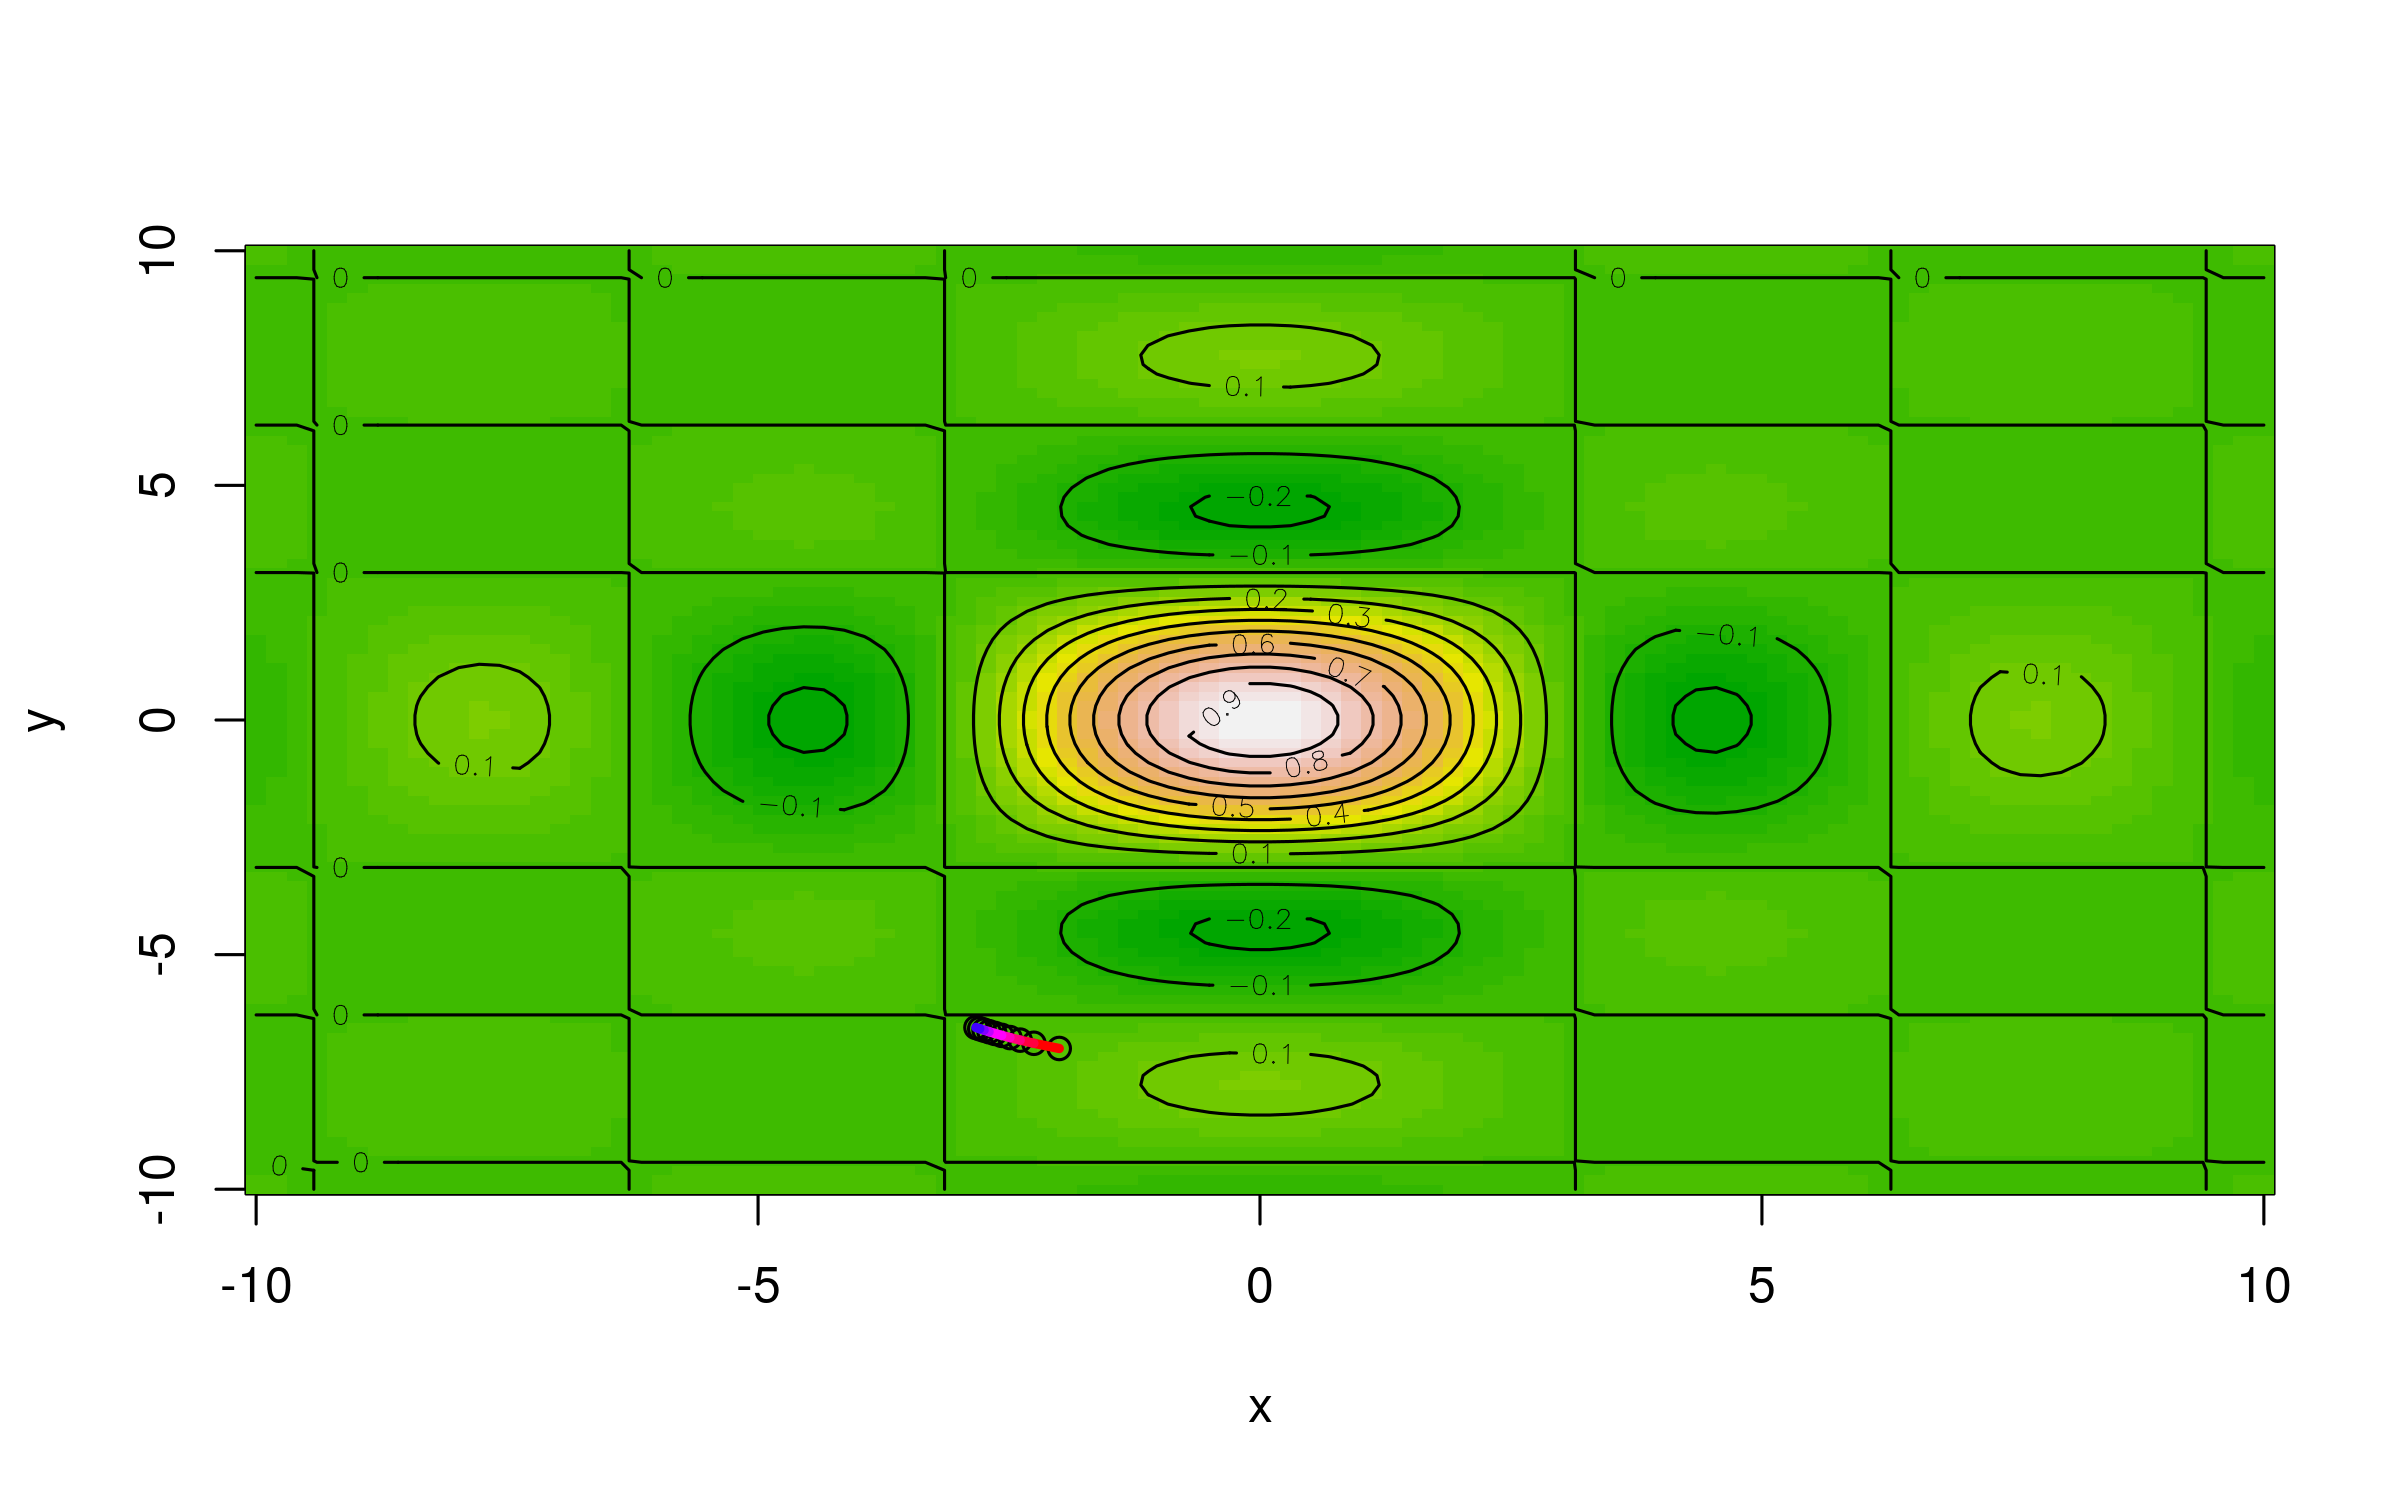

In [98]:
library(pracma)
library(plotrix)
myfunc3D<-function(x1,x2){sin(x1)*sin(x2)/(x1*x2)}
x <- seq(-10,10,length=100)
y <- seq(-10,10,length=100)
z <- outer(x,y,myfunc3D)
image(x,y,z,col = terrain.colors(39))
contour(x,y,z,add=T)

myfuncVector<-function(x){ myfunc3D(x[1],x[2]) }


x_0 <- c(-2,-7)
#x_0 <- c(-5,-1)
#x_0 <- c(-5,-4)
#x_0 <- c(0.7,2)
delta <- 0.1
criterio_convergencia<-1e-1

x_historico<-data.frame(x=x_0[1],y=x_0[2])
for (i in 1:1000){
    g <- grad(myfuncVector,x_0)
    g <- inv(hessian(myfuncVector,x_0)) %*% as.matrix(grad(myfuncVector,x_0),cols=1)
    if(abs(sum(g))<criterio_convergencia){
        break;
    }
    x_new <- x_0 - g*delta     
    x_0 <- x_new
    x_historico<-rbind(x_historico,data.frame(x=x_0[1],y=x_0[2]))
}
paste("Numero pasos",nrow(x_historico))
paste("Valor alcanzado",myfuncVector(x_0))
points(x_historico$x,x_historico$y,col="black")
color.scale.lines(x_historico$x,x_historico$y,c(1,1,0),0,c(0,1,1),colvar=1:nrow(x_historico),lwd=3)


## Funciones en R para optimización

Podemos utilizar diferentes funciones en R que, dada una función nos encuentran el mínimo iterando de forma similar a como hemos visto.

In [ ]:
?optim

In [99]:
myfunc2<-function(x){0.05*x^2+sin(x)}

In [100]:
o<-optimize(myfunc2,interval=c(-10,10))
o

$minimum
[1] -1.427554

$objective
[1] -0.8878628

In [102]:
myfunc2(-1.42755377906257)

[1] -0.8878628

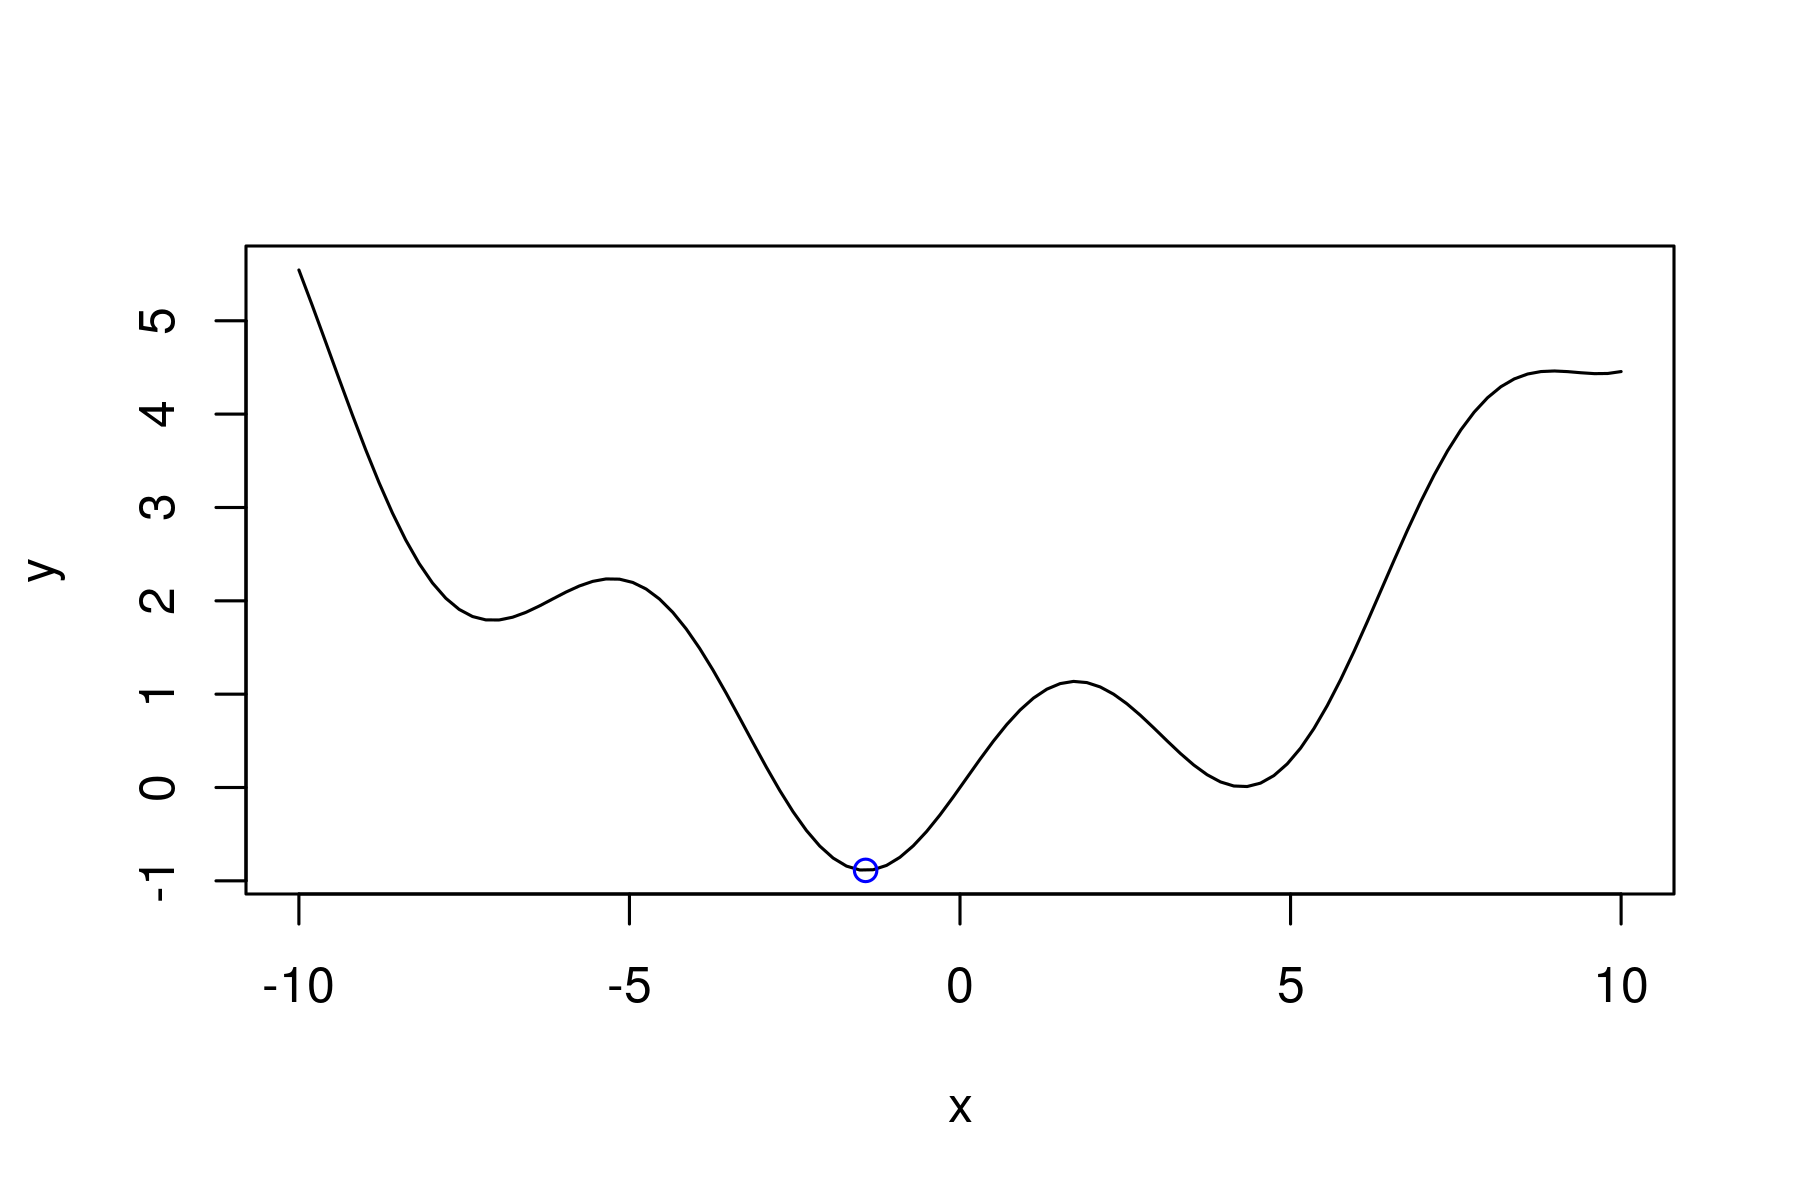

In [103]:
x<-seq(-10,10,length.out = 100)
y<-myfunc2(x)

options(repr.plot.height=4,repr.plot.width=6)
plot(x,y,t="l")
points(o$minimum, o$objective,col="blue")

In [104]:
#myfunc3D<-function(x1,x2){sin(x1+0.01)*sin(x2)/(x1*(x2-0.005))}
myfunc3D<-function(x1,x2){log(abs((sin(x1)*(x2*x1+3))^2*cos(x2)))}

plotMyFunc<-function(myfunc,margin){
    x <- seq(margin[1],margin[2],length=100)
    y <- seq(margin[1],margin[2],length=100)
    z <- outer(x,y,myfunc)
    image(x,y,z,col = terrain.colors(39))
    contour(x,y,z,add=T)
}
    
myfuncVector<-function(x){ myfunc3D(x[1],x[2]) }

In [105]:
o<-optim(c(5,1), myfuncVector,hessian=TRUE)
o

$par
[1] 6.283185 1.570796

$value
[1] -104.1132

$counts
function gradient 
     329       NA 

$convergence
[1] 0

$message
NULL

$hessian
             [,1]         [,2]
[1,] 2.924817e+07 3.622605e-02
[2,] 3.622605e-02 1.517569e+07

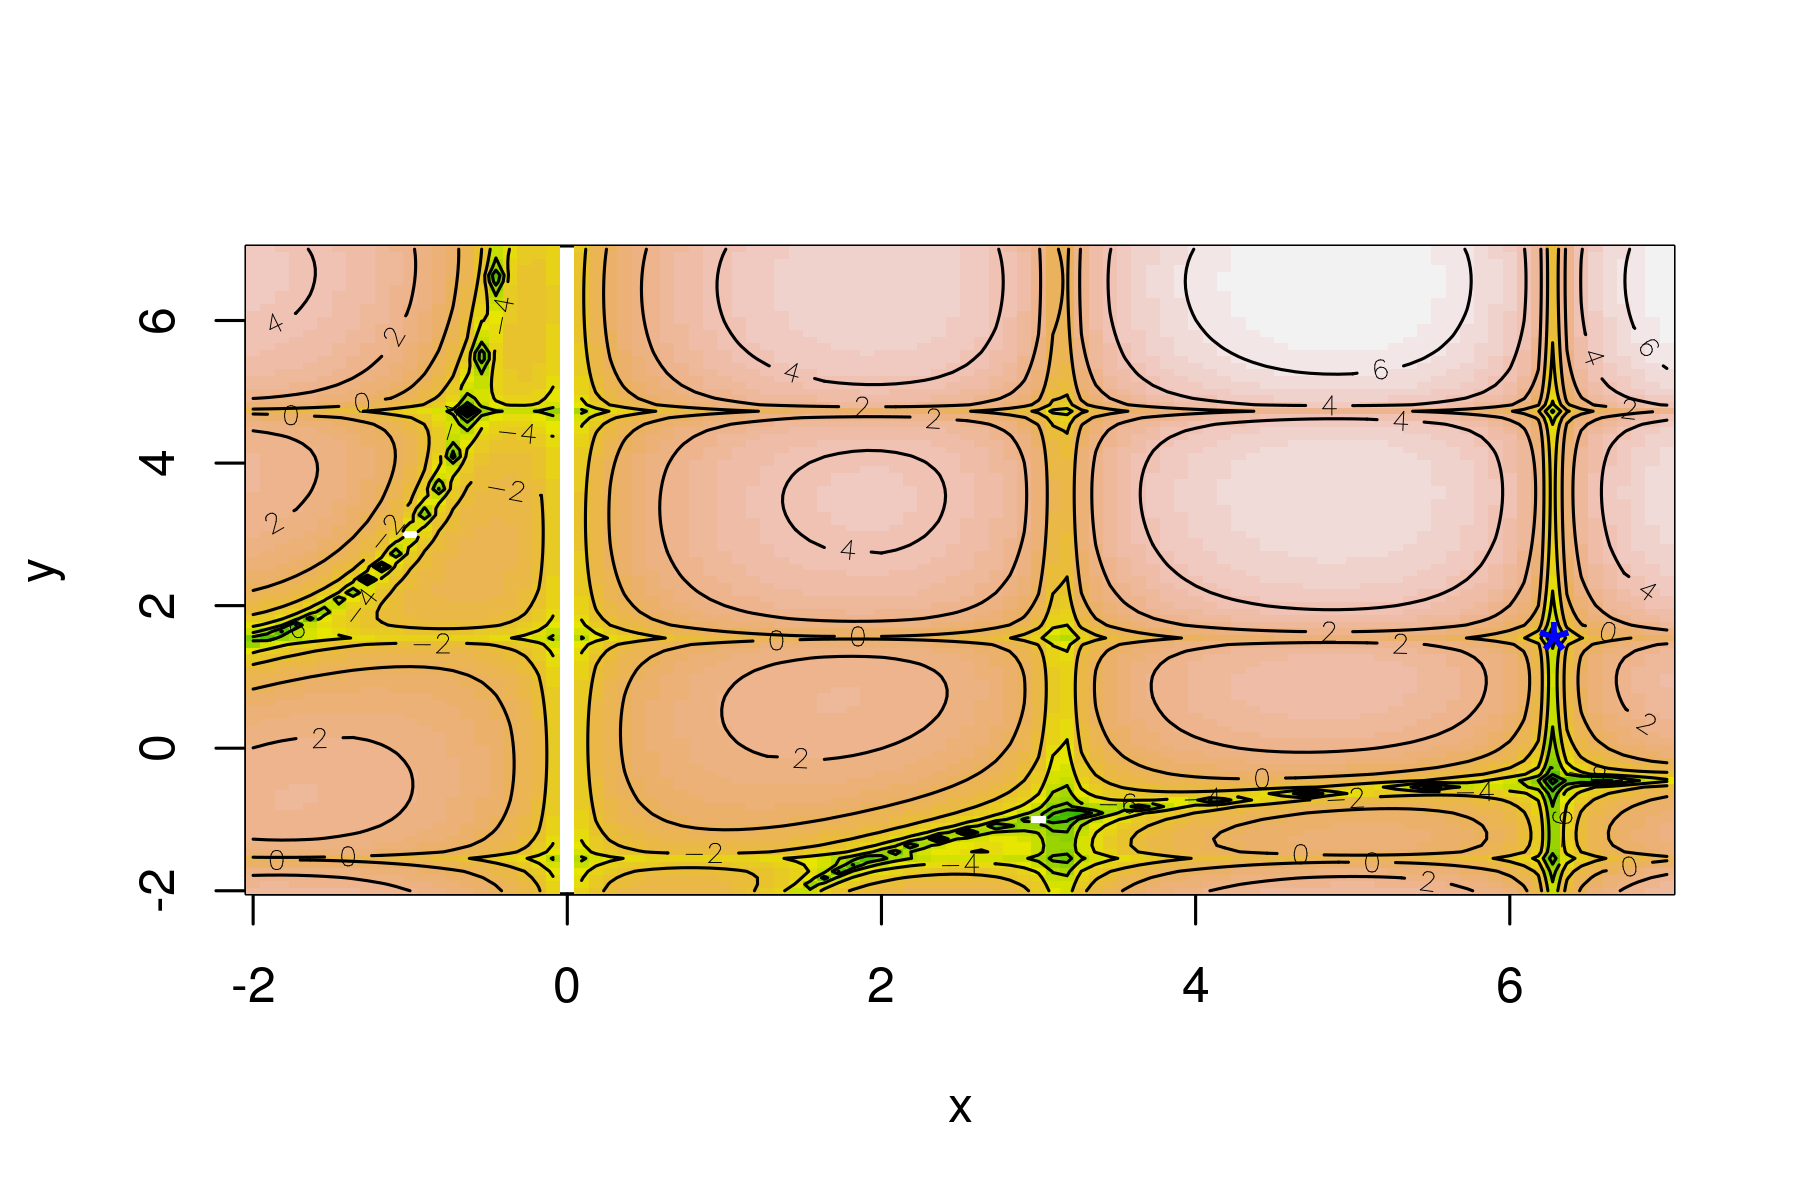

In [106]:
plotMyFunc(myfunc3D,c(-2,7))
points(o$par[1],o$par[2],col="blue",c=2,pch='*')

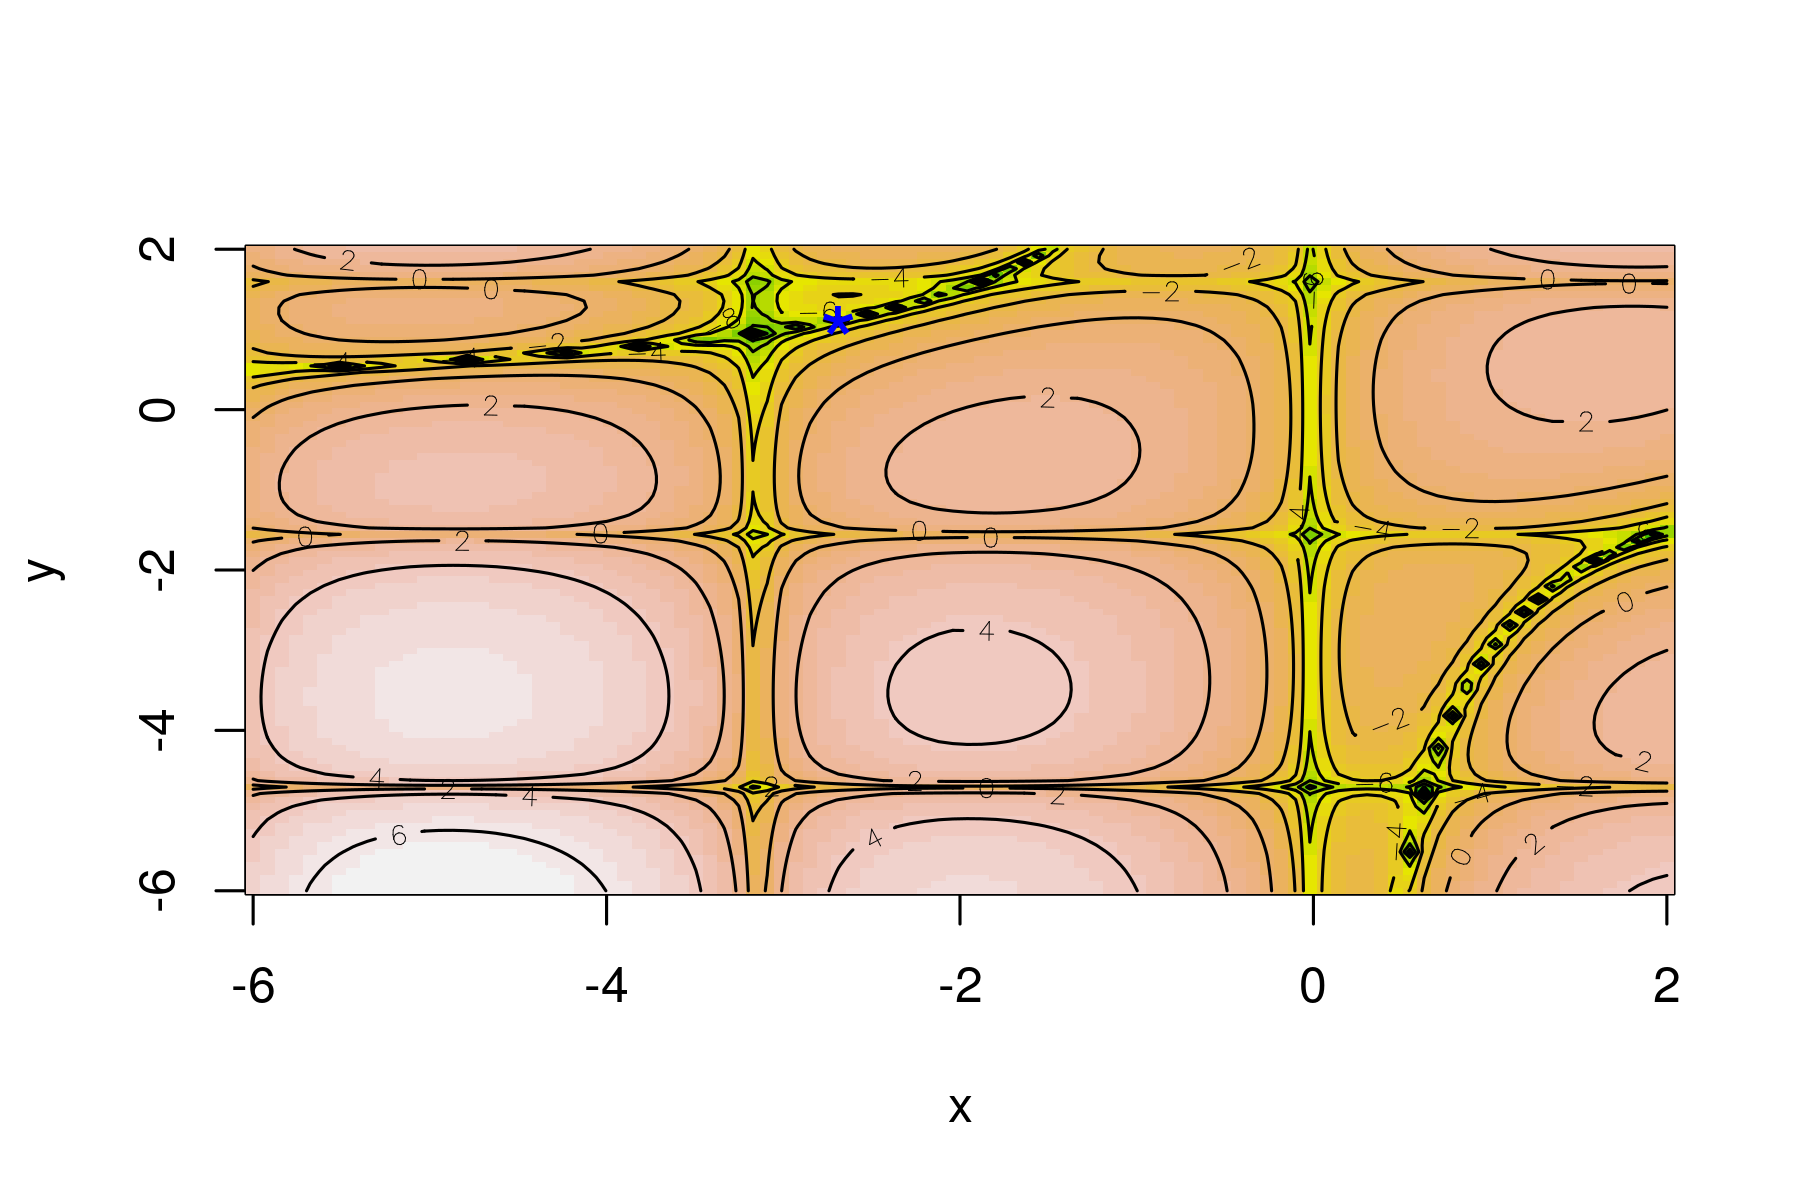

In [107]:
o<-optim(c(-5,1), myfuncVector,hessian=TRUE)
plotMyFunc(myfunc3D,c(-6,2))
points(o$par[1],o$par[2],col="blue",c=2,pch='*')

## Programación no lineal

En matemáticas, [programación no lineal](https://es.wikipedia.org/wiki/Programaci%C3%B3n_no_lineal) (PNL) es el proceso de resolución de un sistema de igualdades y desigualdades sujetas a un conjunto de restricciones sobre un conjunto de variables reales desconocidas, con una función objetivo a maximizar (o minimizar), cuando alguna de las restricciones o la función objetivo no son lineales.

La técnica del multiplicador de Lagrange te permite encontrar el máximo o mínimo de una función multivariable $f (x, y, \dots)$ cuando hay alguna restricción en los valores de entrada que puede usar.

Esta técnica solo se aplica a las restricciones del tipo: $g (x, y, \dots) = c$

Más información:

https://www.khanacademy.org/math/multivariable-calculus/applications-of-multivariable-derivatives/constrained-optimization/a/lagrange-multipliers-single-constraint

**Ejemplo**

Calcular el mínimo de:
\\[
  f(x,y)=x^2+y+3
\\]

Condicionado a:
\\[
  g(x,y)=x+y=5
\\]

In [108]:
f<-function(x,y){
    x^2+y+3
}
g<-function(x,y){
    x+y
}
const <- 5

Nuestra condición:
\\[
  g(x,y)=x+y=5
\\]
se puede reescribir como:
\\[
  y=5-x
\\]


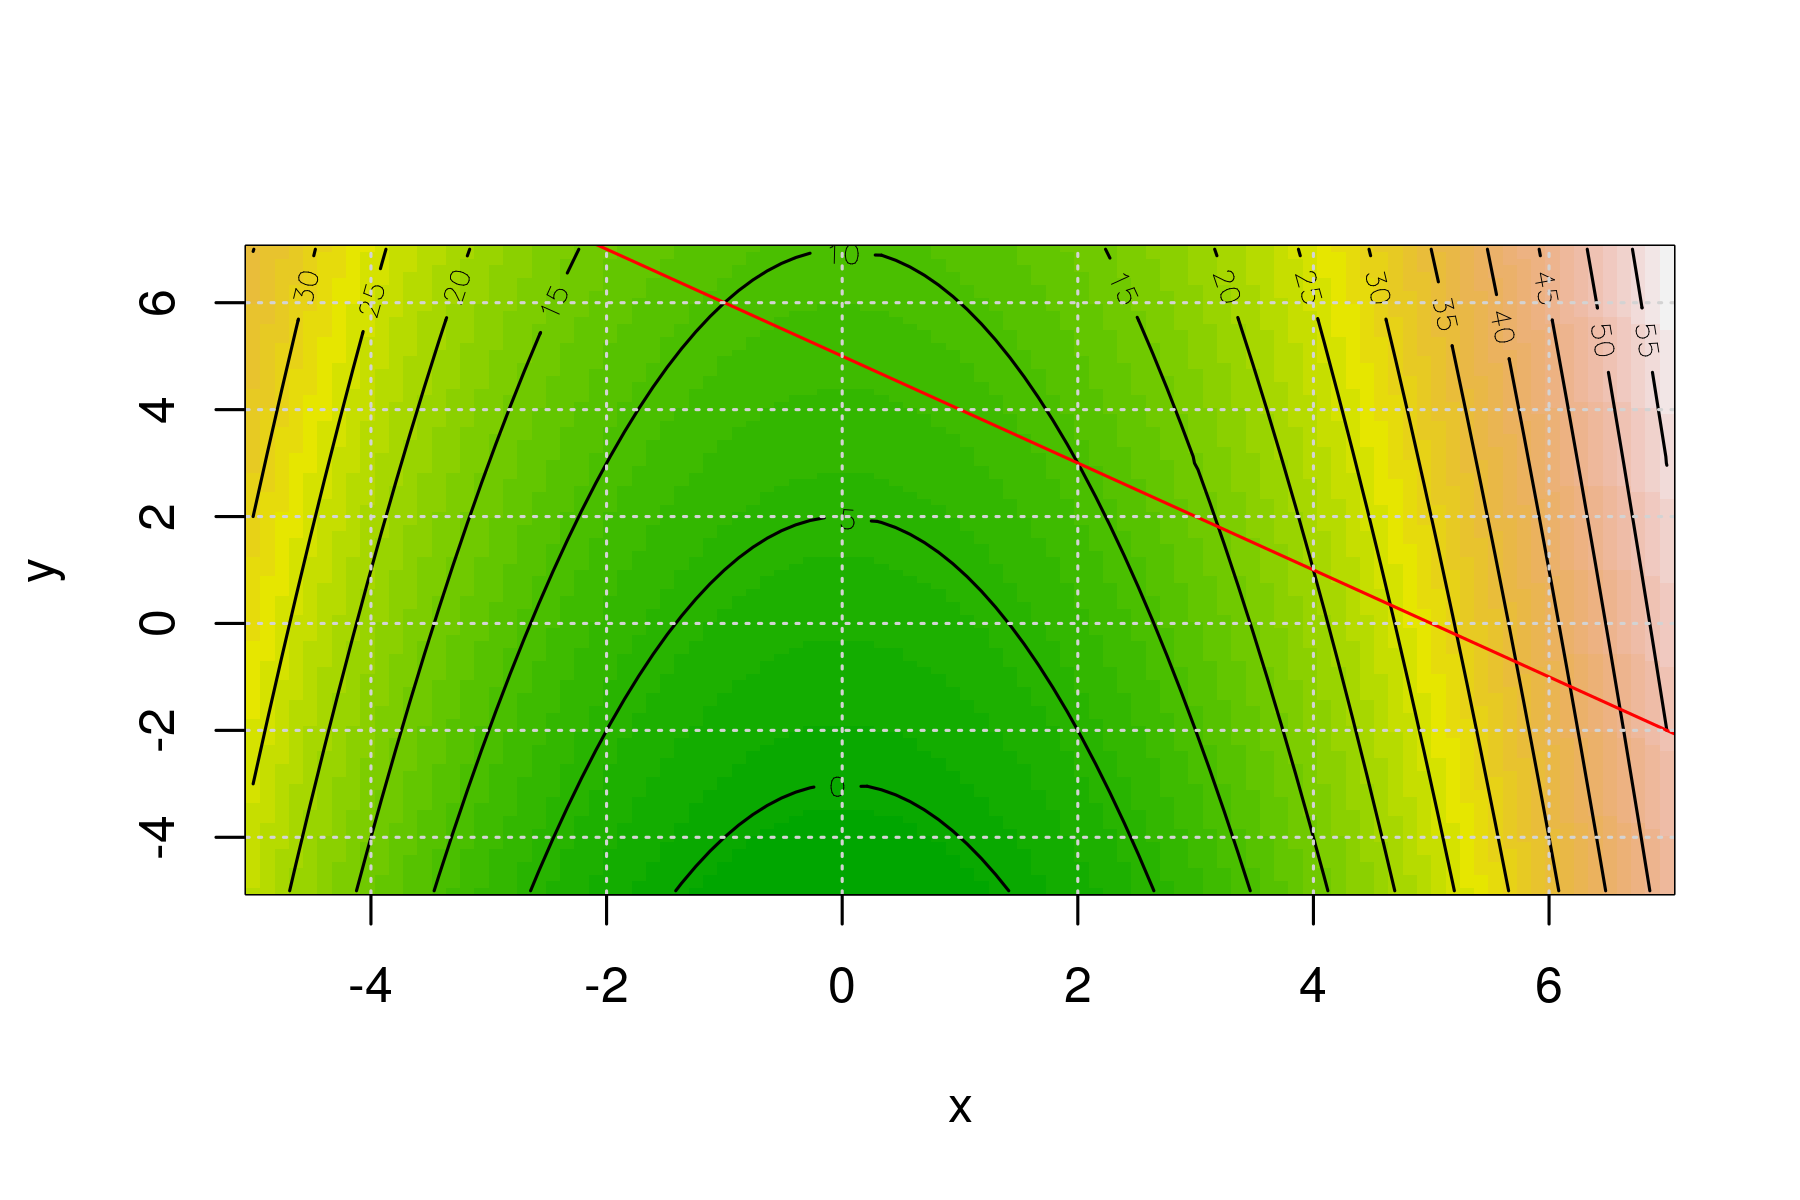

In [114]:
plotMyFunc(f,c(-5,7))
abline(c(const,-1),col="red")
grid()

In [115]:
f_inv<-function(f,x){
    y<- f-x^2-3
    return(y)
}
g_inv<-function(g,x){
    g-x
}

In [116]:
x<-seq(-2,5,length.out=100)
y<-g_inv(const,x)

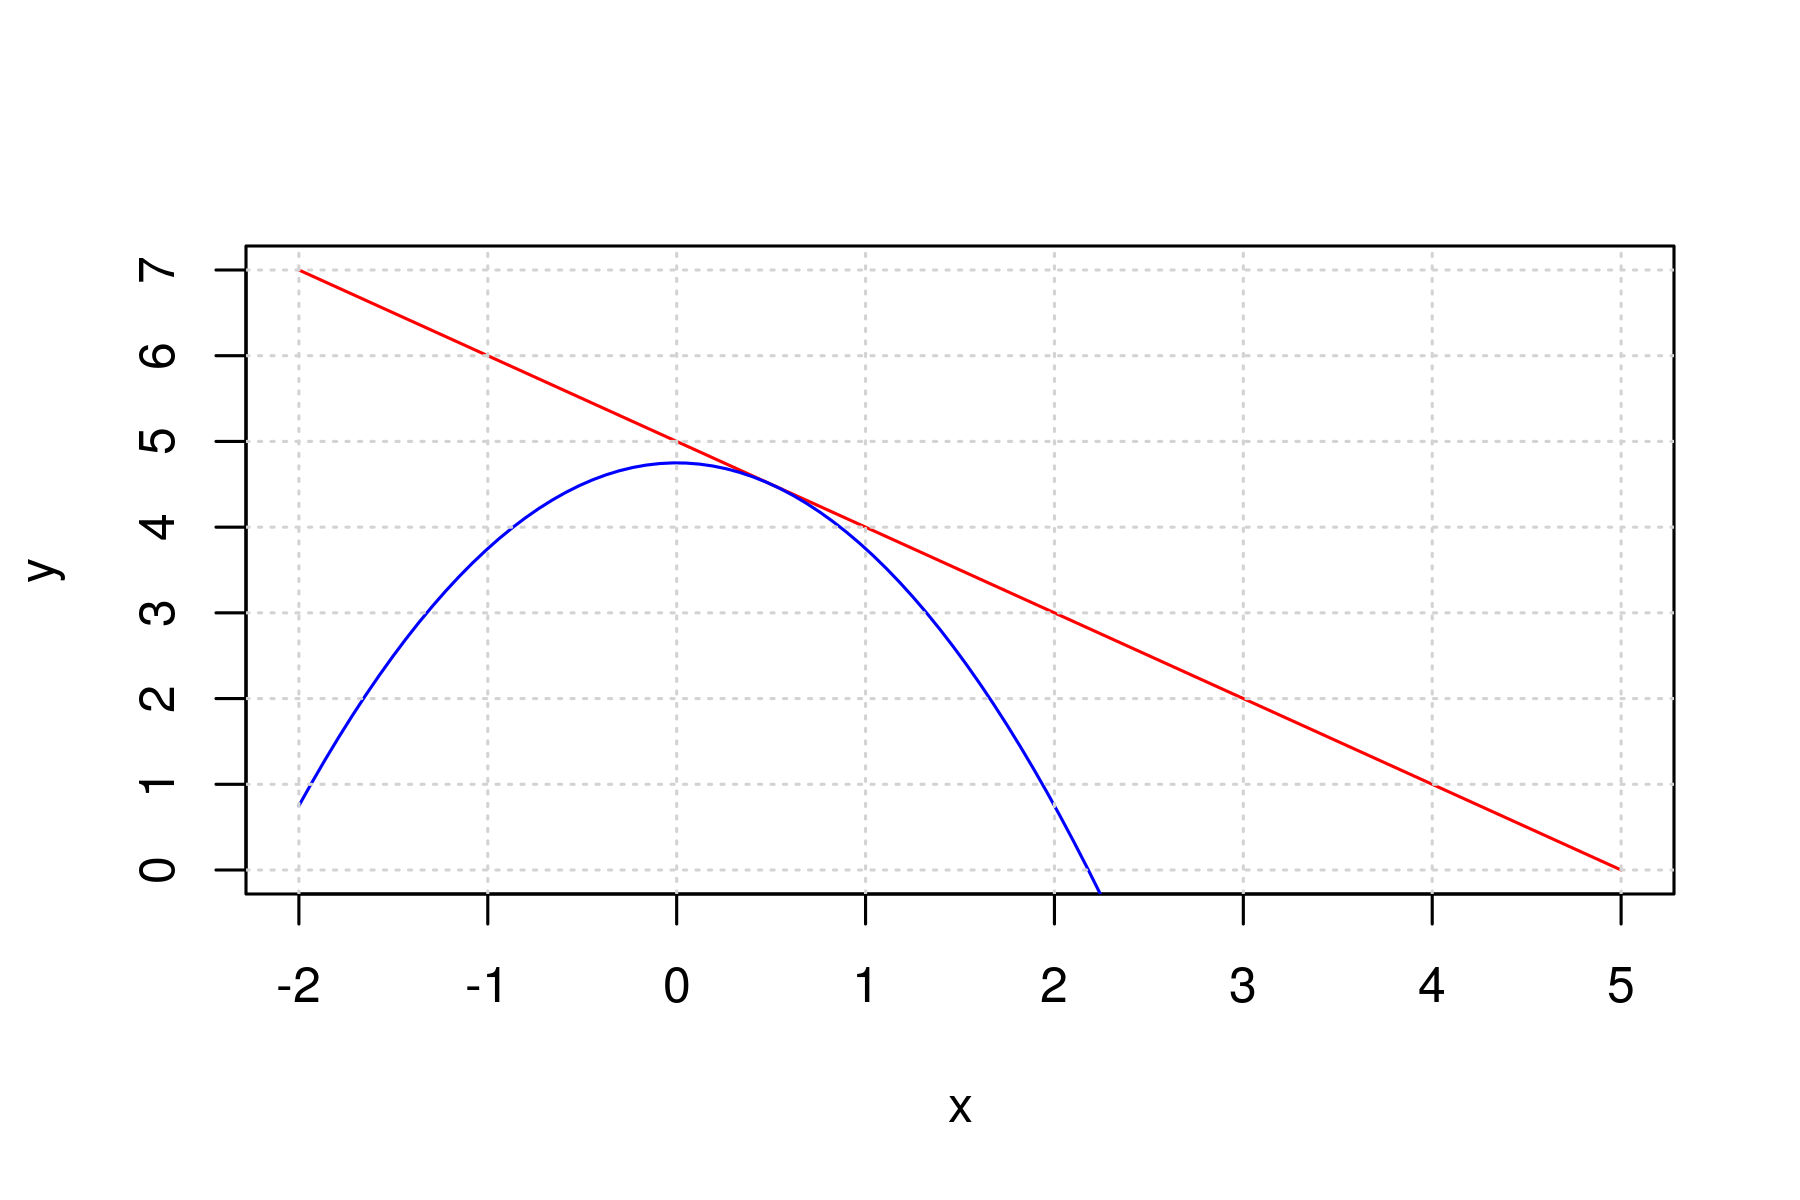

In [123]:
yf<-f_inv(7.75,x)

plot(x,y,t='l',col='red')
lines(x,yf,t='l',col='blue')
grid()

In [124]:
f(0.5,4.5)

[1] 7.75

In [128]:
fn<-function(coefs){ f(coefs[1],coefs[2])}
gn<-function(coefs){ g(coefs[1],coefs[2])}

Rsolnp::solnp(c(30,2), 
              fun = fn, 
              eqfun = gn, 
              eqB = const)


Iter: 1 fn: 7.7500	 Pars:  0.50000 4.50000
Iter: 2 fn: 7.7500	 Pars:  0.50000 4.50000
solnp--> Completed in 2 iterations


$pars
[1] 0.5 4.5

$convergence
[1] 0

$values
[1] 905.00   7.75   7.75

$lagrange
     [,1]
[1,]    1

$hessian
     [,1] [,2]
[1,]  2.5  0.5
[2,]  0.5  0.5

$ineqx0
NULL

$nfuneval
[1] 54

$outer.iter
[1] 2

$elapsed
Time difference of 0.01499248 secs

$vscale
[1] 7.750000e+00 2.575641e-08 4.999998e-01 4.500000e+00


### Ejemplo: Cartera de fondos de inversión minimizando la varianza

Partimos de varios fondos de inversión y queremos una cartera que nos maximice el retorno medio a un año mientras minimiza la varianza.

Queremos calcular unos coeficientes que nos digan que porcentaje de nuestra cartera corresponde a cada fondo.

\\[
portfolio=\sum_i c_i · fondo_i
\\]

Cargamos la cartera de fondos de inversión con la rentabilidad a un año vista.

In [132]:
funds<-read.csv('data/fondos_inversion.csv')
funds$date<-as.Date(funds$date)

In [134]:
tail(funds)

date       fondo.1   fondo.2  fondo.3   fondo.4   fondo.5  fondo.6 
2053 2020-11-28 0.9755081 1.081874 0.9742949 0.9743660 1.053879 1.053908
2054 2020-11-29 0.9755081 1.081874 0.9742949 0.9743660 1.053879 1.053908
2055 2020-11-30 0.9664425 1.075796 0.9555128 0.9555312 1.033211 1.033203
2056 2020-12-01 0.9872266 1.095488 0.9562436 0.9562255 1.023555 1.023549
2057 2020-12-02 0.9944403 1.101771 0.9675287 0.9675139 1.021610 1.021647
2058 2020-12-03 0.9809671 1.087245 0.9833968 0.9833853 1.029519 1.029512
     fondo.7   fondo.8   fondo.9   ⋯ fondo.22 fondo.23  fondo.24 fondo.25
2053 0.9901603 0.9755334 0.9935030 ⋯ 1.097721 0.9720508 1.286830 1.109100
2054 0.9901603 0.9755334 0.9935030 ⋯ 1.097721 0.9720508 1.286830 1.109100
2055 0.9889456 0.9664689 0.9841836 ⋯ 1.091612 0.9572799 1.249663 1.084547
2056 0.9859276 0.9872001 1.0100901 ⋯ 1.110704 0.9557906 1.258498 1.095988
2057 0.9749376 0.9944338 1.0135680 ⋯ 1.116703 0.9637894 1.248264 1.099685
2058 0.9740537 0.9809644 1.0006462 ⋯ 1.103789 0.9750540 1.260934 1.107238
     fondo.26 fondo.27 fondo.28 fondo.29 fondo.30 fondo.31
2053 1.109245 1.078055 1.078029 1.052563 1.063580 1.063598
2054 1.109245 1.078055 1.078029 1.052563 1.063580 1.063598
2055 1.084545 1.072614 1.072599 1.032122 1.055116 1.055101
2056 1.096116 1.092420 1.092315 1.022567 1.070552 1.070606
2057 1.099723 1.098862 1.098746 1.020878 1.077061 1.077076
2058 1.107329 1.083152 1.083070 1.028132 1.066391 1.066403

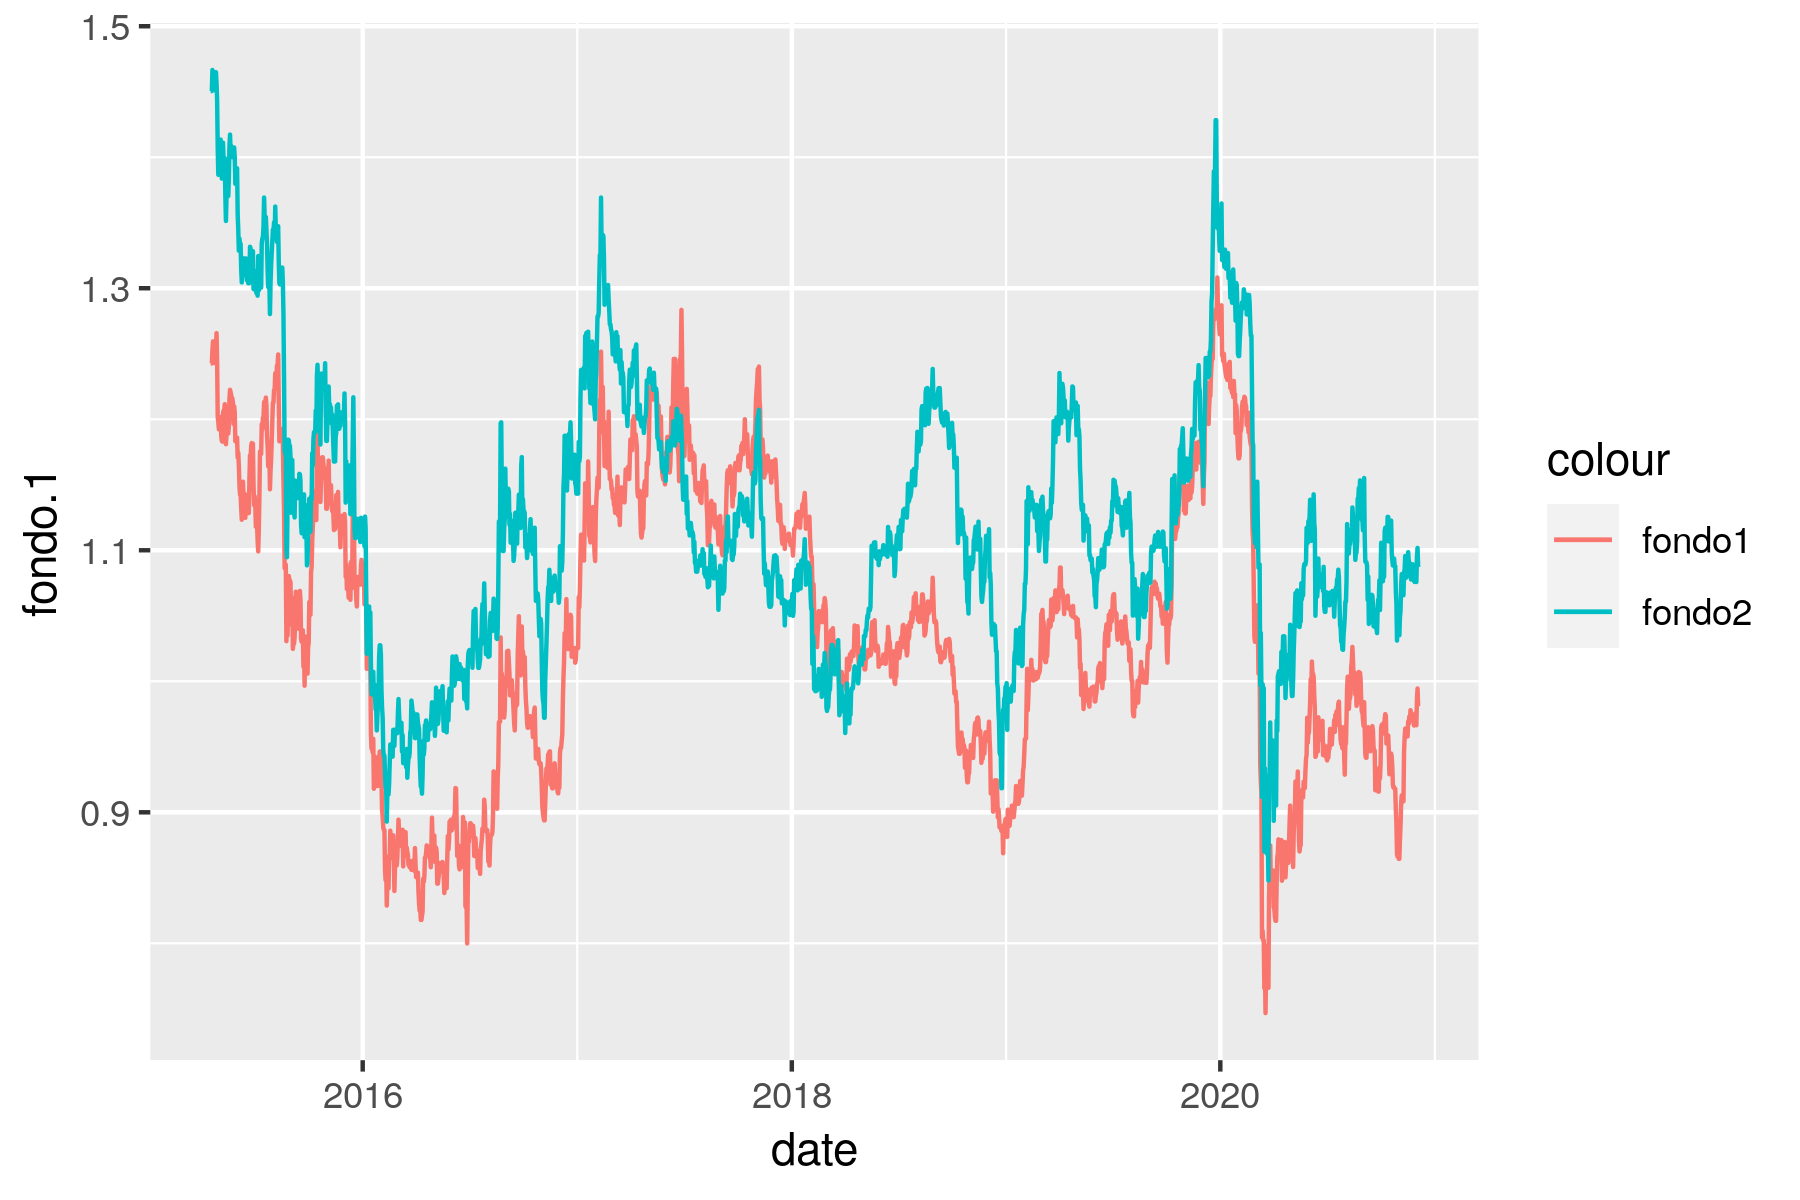

In [135]:
library(ggplot2)
ggplot(funds,aes(x=date))+geom_line(aes(y=fondo.1,color="fondo1"))+geom_line(aes(y=fondo.2,color="fondo2"))

In [136]:
df_subset<-funds
df_subset$date<-NULL

Queremos optimizar un retorno máximo y una varianza mínima de nuestro portfolio:
\\[
   portfolio=\sum_i c_i · fondo_i
\\]

Dadas las variables:
\\[
    mn=\frac{1}{num days} \sum_{date} portfolio \\
    vr= VAR \left( portfolio \right) \\
\\]

Queremos encontrar los coeficientes $c_i$ tal que la siguiente función sea mínima:
\\[
    f(c)=\frac{-mn}{exp(1+vr*100)}
\\]

Cumpliendo las siguientes limitaciones:
\\[
\sum c_i = 1 \\
0 \leq c_i \leq 1
\\]



In [137]:
library(pracma)
variance_importance <- 100

roi_optim<-function(coefs){
    mn<-mean(rowSums(repmat(coefs,nrow(df_subset),1) * df_subset))    
    vr<-var(rowSums(repmat(coefs,nrow(df_subset),1) * df_subset))
    return (-mn/exp(1+variance_importance*vr))
    #return(mn)
}
constrain_func<-function(coefs){
    sum(coefs)
}

In [138]:

x0<-rep(1/ncol(df_subset),ncol(df_subset)) #Valor inicial de los coeficientes
lx <- rep(0,length(x0)) # Valor mínimo de los coeficientes
ux <- rep(1,length(x0)) # Valor máximo de los coeficientes
sol1 <- Rsolnp::solnp(x0, fun = roi_optim, eqfun = constrain_func, eqB = 1, LB=lx, UB=ux)


Iter: 1 fn: -0.2504	 Pars:  8.527e-08 2.378e-08 2.846e-08 2.851e-08 9.832e-09 9.824e-09 7.568e-08 8.565e-08 3.836e-05 1.152e-01 2.379e-08 3.375e-08 2.996e-08 3.011e-08 3.290e-01 3.450e-08 3.455e-08 3.611e-08 3.580e-01 1.978e-01 7.161e-08 2.667e-08 1.770e-08 3.612e-11 1.559e-06 1.103e-06 2.459e-08 2.425e-08 9.043e-09 3.551e-08 3.537e-08
Iter: 2 fn: -0.2504	 Pars:  8.516e-08 2.374e-08 2.842e-08 2.846e-08 9.805e-09 9.796e-09 7.559e-08 8.554e-08 3.818e-05 1.152e-01 2.375e-08 3.370e-08 2.991e-08 3.006e-08 3.290e-01 3.445e-08 3.450e-08 3.605e-08 3.580e-01 1.978e-01 7.152e-08 2.662e-08 1.767e-08 1.961e-11 1.558e-06 1.102e-06 2.454e-08 2.421e-08 9.017e-09 3.546e-08 3.532e-08
solnp--> Completed in 2 iterations


In [141]:
sol1$pars    

[1] 8.516005e-08 2.373962e-08 2.841530e-08 2.845884e-08 9.804986e-09
 [6] 9.796242e-09 7.558725e-08 8.554047e-08 3.818448e-05 1.151536e-01
[11] 2.374902e-08 3.369532e-08 2.991344e-08 3.006360e-08 3.290140e-01
[16] 3.444660e-08 3.449917e-08 3.605477e-08 3.579861e-01 1.978047e-01
[21] 7.152159e-08 2.662377e-08 1.766514e-08 1.961351e-11 1.557641e-06
[26] 1.102241e-06 2.454178e-08 2.421119e-08 9.016759e-09 3.545673e-08
[31] 3.531591e-08

In [142]:
coefs<-sol1$pars    
names(coefs)<-colnames(df_subset)
coefs<-round(coefs[coefs>1e-2],4)
coefs<-coefs/sum(coefs)

In [143]:
coefs

fondo.10 fondo.15 fondo.19 fondo.20 
  0.1152   0.3290   0.3580   0.1978

Para calcular el fondo agregado resultante sería:

\\[
\begin{bmatrix}
 x_{11} & x_{12} & x_{13} & x_{14} \\ 
 x_{21} & x_{22} & x_{23} & x_{24} \\ 
 \vdots & & & \ddots & \vdots \\ 
 x_{n1} & x_{n2} & x_{n3} & x_{n4}
\end{bmatrix}
\begin{bmatrix}
coef_1 \\ 
coef_2 \\
coef_3 \\
coef_4 
\end{bmatrix}
=
\begin{bmatrix}
 y_1 \\ 
 y_2 \\ 
 \vdots \\ 
 y_n 
\end{bmatrix}
\\]

In [144]:
funds["portfolio"]<-as.matrix(funds[names(coefs)])%*%coefs

In [145]:
head(funds)

date       fondo.1  fondo.2  fondo.3  fondo.4  fondo.5  fondo.6  fondo.7 
1 2015-04-17 1.242626 1.450498 1.283821 1.283720 1.521607 1.521640 1.351085
2 2015-04-18 1.242626 1.450498 1.283821 1.283720 1.521607 1.521640 1.351085
3 2015-04-19 1.242626 1.450498 1.283821 1.283720 1.521607 1.521640 1.351085
4 2015-04-20 1.253186 1.466606 1.268939 1.268815 1.516662 1.516696 1.351525
5 2015-04-21 1.259490 1.457408 1.278023 1.278035 1.536047 1.536077 1.347879
6 2015-04-22 1.242891 1.460447 1.269861 1.269787 1.557659 1.557684 1.344193
  fondo.8  fondo.9  ⋯ fondo.23 fondo.24 fondo.25 fondo.26 fondo.27 fondo.28
1 1.242052 1.213878 ⋯ 1.342162 1.828762 1.348290 1.348858 1.447700 1.448400
2 1.242052 1.213878 ⋯ 1.342162 1.828762 1.348290 1.348858 1.447700 1.448400
3 1.242052 1.213878 ⋯ 1.342162 1.828762 1.348290 1.348858 1.447700 1.448400
4 1.252615 1.226382 ⋯ 1.326655 1.782250 1.339593 1.340207 1.463800 1.464400
5 1.258899 1.231648 ⋯ 1.339061 1.829459 1.348979 1.352681 1.460042 1.464000
6 1.242287 1.212525 ⋯ 1.335252 1.861152 1.357178 1.357565 1.457604 1.458152
  fondo.29 fondo.30 fondo.31 portfolio
1 1.523635 1.382277 1.381712 1.346056 
2 1.523635 1.382277 1.381712 1.346056 
3 1.523635 1.382277 1.381712 1.346056 
4 1.518710 1.393210 1.392552 1.350231 
5 1.543815 1.393742 1.396467 1.348029 
6 1.560099 1.389253 1.388574 1.343145

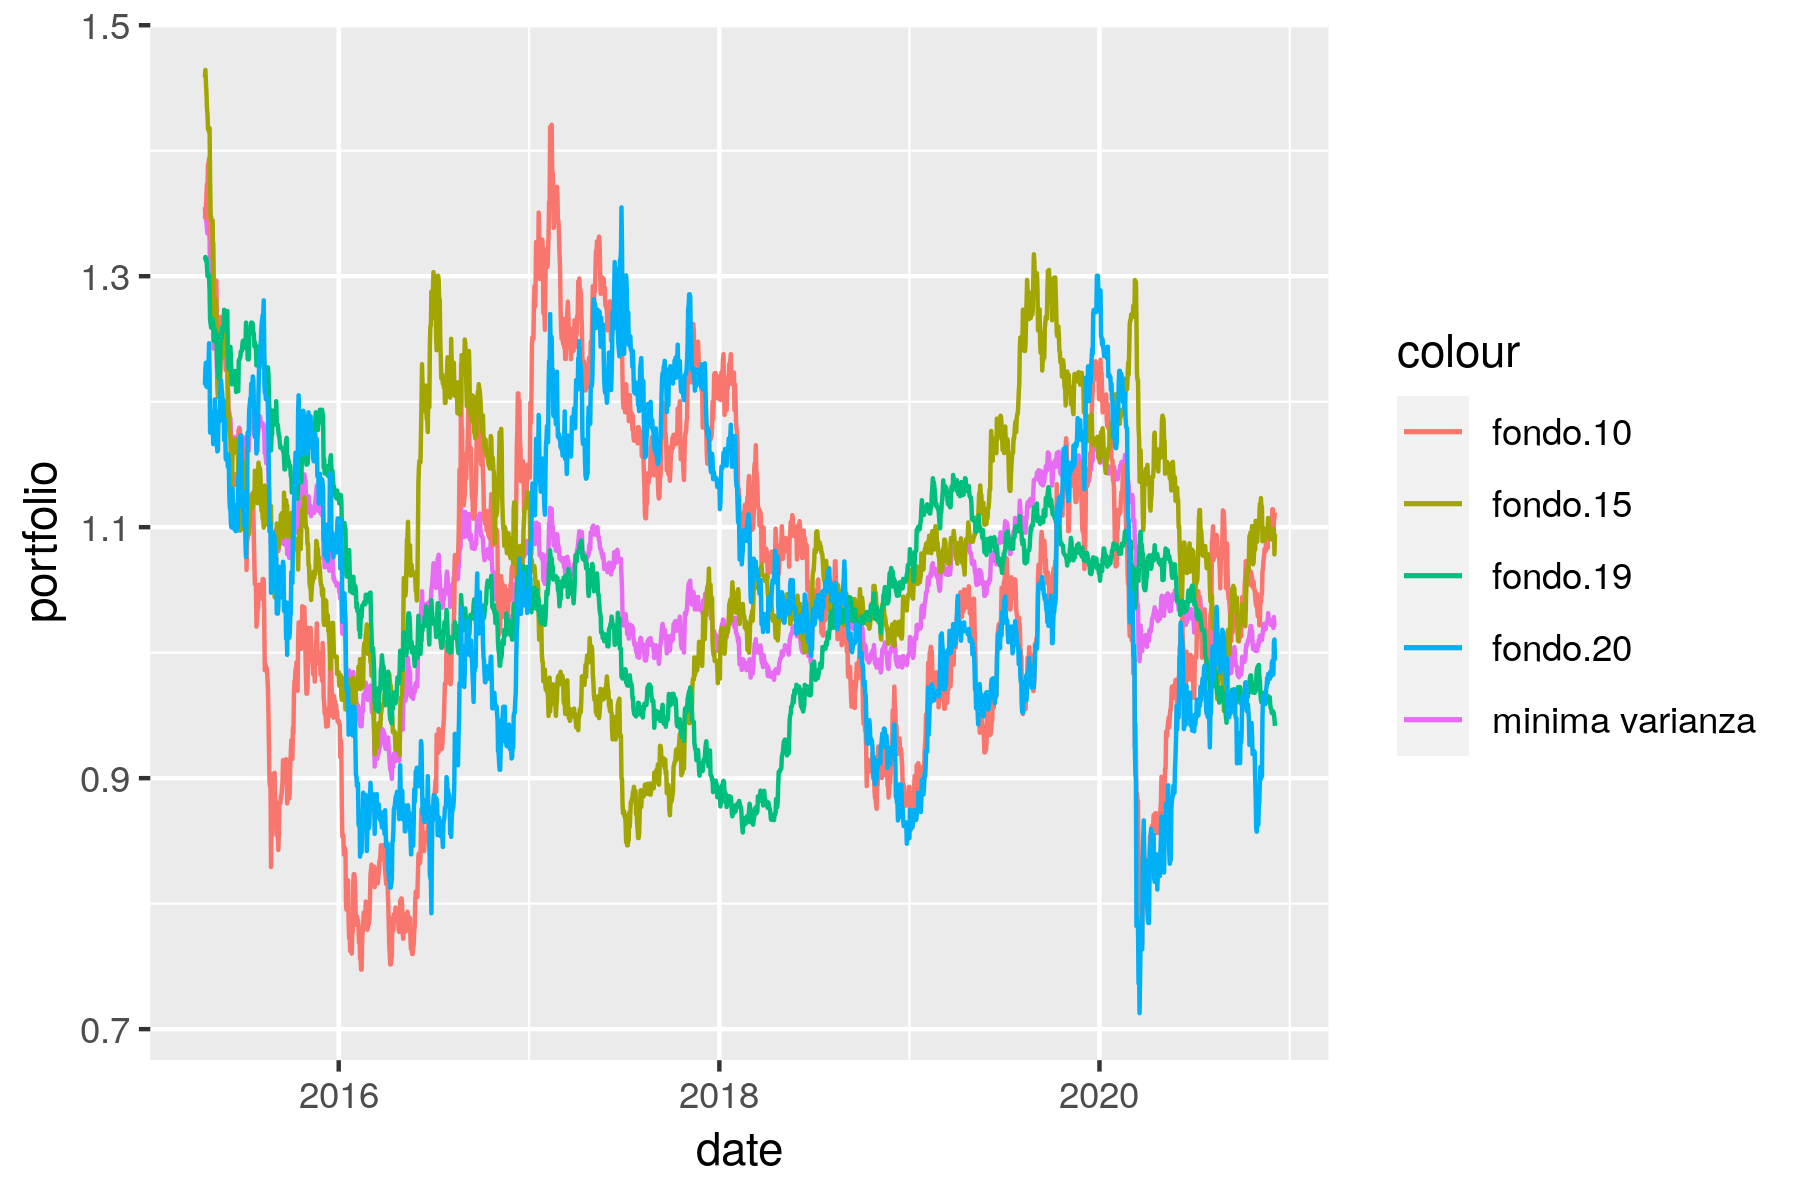

In [146]:
ggplot(funds,aes(x=date))+geom_line(aes(y=portfolio,color="minima varianza"))+
 geom_line(aes(y=fondo.10,color="fondo.10"))+
geom_line(aes(y=fondo.15,color="fondo.15"))+
geom_line(aes(y=fondo.19,color="fondo.19"))+
geom_line(aes(y=fondo.20,color="fondo.20"))

In [147]:
10^(colMeans(log10(funds[c("portfolio",names(coefs))]) ))

portfolio  fondo.10  fondo.15  fondo.19  fondo.20 
 1.054772  1.044353  1.073088  1.040875  1.037984

In [148]:
apply(funds[c("portfolio",names(coefs))],2,var )

portfolio    fondo.10    fondo.15    fondo.19    fondo.20 
0.004398853 0.019277052 0.010682870 0.007678708 0.015899536